# Imports

In [1]:
# !pip install openml

# Libraries

In [70]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats

# Working with files
import os
import glob
import io


# Working with OpenML dataset
import openml
from openml.datasets import edit_dataset, fork_dataset, get_dataset

# Scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Performance Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


# Functions

# Data

In [5]:
# Download dataset based on OpenML dataset ID

# Name = College US News
# ID = 930
# URL = https://www.openml.org/search?type=data&status=active&qualities.NumberOfInstances=between_1000_10000&qualities.NumberOfFeatures=between_10_100&qualities.NumberOfClasses=%3D_2&id=930&sort=runs

dataset = openml.datasets.get_dataset(930)

# Print a summary
print(
        f"This is dataset '{dataset.name}', the target feature is "
        f"'{dataset.default_target_attribute}'"
     )

print(f"URL: {dataset.url}")
print(dataset.description[:500])

C:\Users\bianc\anaconda3\lib\site-packages\openml\datasets\functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


This is dataset 'colleges_usnews', the target feature is 'binaryClass'
URL: https://api.openml.org/data/v1/download/53464/colleges_usnews.arff
**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). It converts the numeric target feature to a two-class nominal target feature by computing the mean and classifying all instances with a lower target value as positive ('P') and all others as negative ('N').


In [33]:
# Get the actual data (pandas dataframe and uninteresting metadata)

big_df, *_ = dataset.get_data()
print(f"The lenght of the '{dataset.name}' is = {len(big_df)}")
print(f"The number of features for the '{dataset.name}' is = {len(big_df.columns)}")
# big_df.head()

The lenght of the 'colleges_usnews' is = 1302
The number of features for the 'colleges_usnews' is = 34


# Preprocessing

In [34]:
big_df.head()

FICE State  Public/private_indicator  Average_Math_SAT_score  \
0   1061.0    AK                         2                   490.0   
1   1063.0    AK                         1                   499.0   
2   1065.0    AK                         1                     NaN   
3  11462.0    AK                         1                   459.0   
4   1002.0    AL                         1                     NaN   

   Average_Verbal_SAT_score  Average_Combined_SAT_score  Average_ACT_score  \
0                     482.0                       972.0               20.0   
1                     462.0                       961.0               22.0   
2                       NaN                         NaN                NaN   
3                     422.0                       881.0               20.0   
4                       NaN                         NaN               17.0   

   First_quartile-Math_SAT  Third_quartile-Math_SAT  \
0                    440.0                    530.0   
1                      NaN                      NaN   
2                      NaN                      NaN   
3                      NaN                      NaN   
4                      NaN                      NaN   

   First_quartile-Verbal_SAT  ...  Board_costs  Additional_fees  \
0                      430.0  ...       2500.0            130.0   
1                        NaN  ...       1790.0            155.0   
2                        NaN  ...       2250.0             34.0   
3                        NaN  ...       2520.0            114.0   
4                        NaN  ...       1442.0            155.0   

   Estimated_book_costs  Estimated_personal_spending  \
0                 800.0                       1500.0   
1                 650.0                       2304.0   
2                 500.0                       1162.0   
3                 580.0                       1260.0   
4                 500.0                        850.0   

   Pct._of_faculty_with_Ph.D.s  Pct._of_faculty_with_terminal_degree  \
0                         76.0                                  72.0   
1                         67.0                                   NaN   
2                         39.0                                  51.0   
3                         48.0                                   NaN   
4                         53.0                                  53.0   

   Student/faculty_ratio  Pct.alumni_who_donate  \
0                  119.0                    2.0   
1                  100.0                    8.0   
2                   95.0                    NaN   
3                  137.0                    6.0   
4                  143.0                    NaN   

   Instructional_expenditure_per_student  binaryClass  
0                                10922.0            P  
1                                11935.0            N  
2                                 9584.0            P  
3                                 8046.0            N  
4                                 7043.0            P  

[5 rows x 34 columns]

* FICE = Federal Interagency Committee on Education - codes

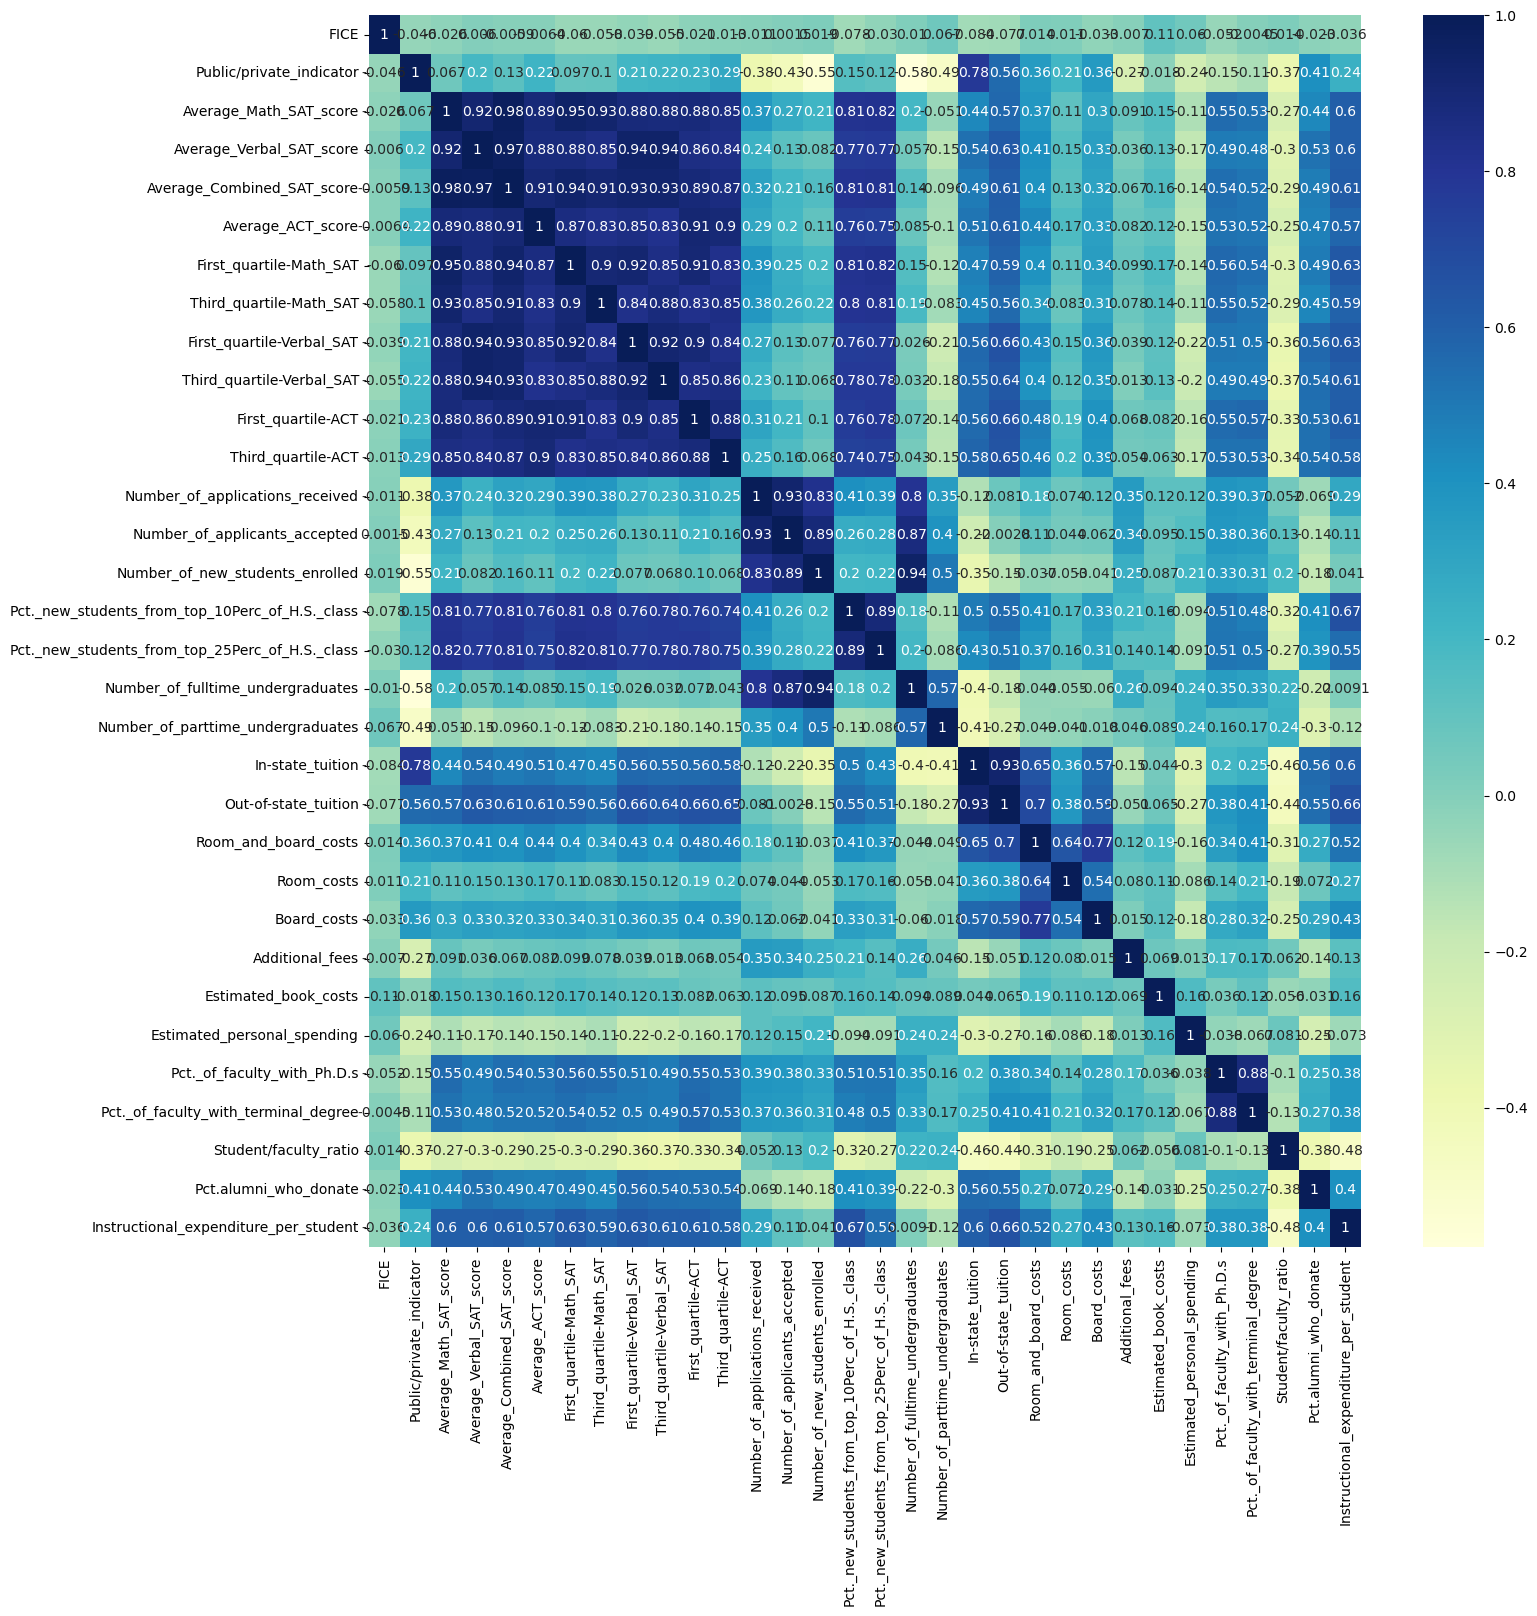

In [35]:
# Correlation Heatmap
plt.figure(figsize = (16, 16))
dataplot = sns.heatmap(big_df.corr(numeric_only = True), cmap = "YlGnBu", annot = True)
plt.show()

In [36]:
# Checking for each column the type and the number of distinct and similar values (also see if there are missing values)

missing_col = []

for col in big_df.columns:
    print(col)
    print(big_df[col].value_counts())
    print(f"Number of missing values = {big_df[col].isna().sum()}")
    print(f"Type of dataframe column = {big_df[col].dtypes}")
    print('\n')
    
    if big_df[col].isna().sum() > 0:
        missing_col.append(col)

FICE
1061.0    1
4759.0    1
3024.0    1
3023.0    1
3018.0    1
         ..
2115.0    1
2114.0    1
9636.0    1
2032.0    1
3932.0    1
Name: FICE, Length: 1302, dtype: int64
Number of missing values = 0
Type of dataframe column = float64


State
NY    101
PA     83
CA     70
TX     60
MA     56
OH     52
IL     49
NC     46
IN     42
VA     40
MI     36
GA     36
MO     35
TN     34
FL     30
IA     29
WI     29
NJ     27
SC     26
MN     25
AL     25
KY     24
MD     23
OK     20
KS     20
LA     20
CT     19
OR     18
AR     17
WV     17
WA     16
NE     16
CO     16
MS     15
ME     14
VT     14
NH     13
SD     11
NM      9
DC      9
MT      9
ND      8
RI      8
ID      6
UT      6
HI      5
DE      5
AZ      5
AK      4
NV      3
WY      1
Name: State, dtype: int64
Number of missing values = 0
Type of dataframe column = category


Public/private_indicator
2    832
1    470
Name: Public/private_indicator, dtype: int64
Number of missing values = 0
Type of dataframe column = uint8

In [37]:
# missing_col

# Data Exploration and Feature Engineering

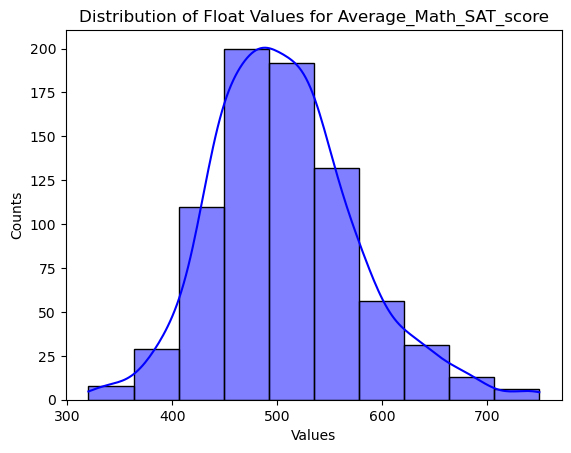

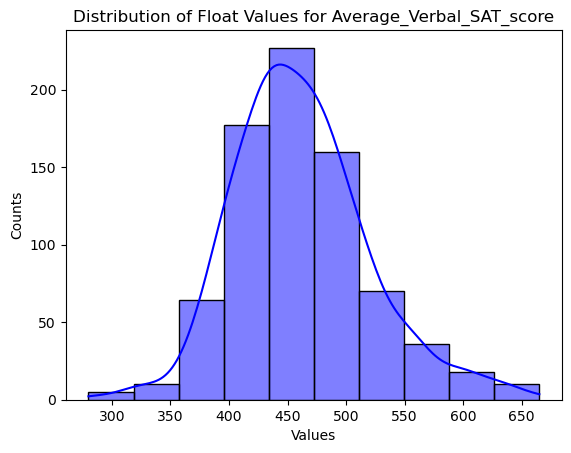

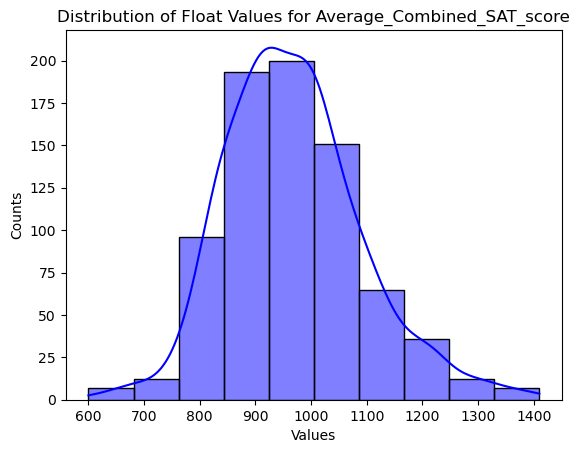

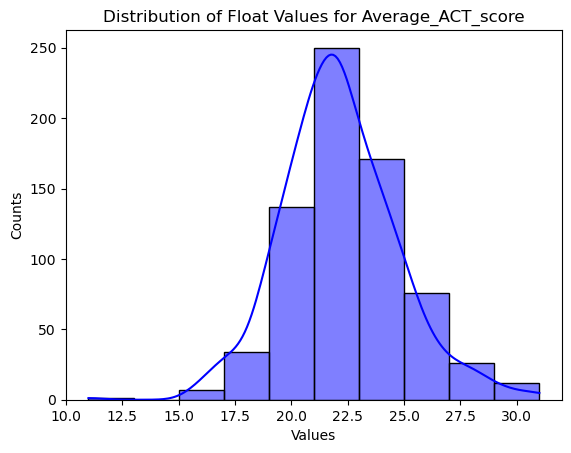

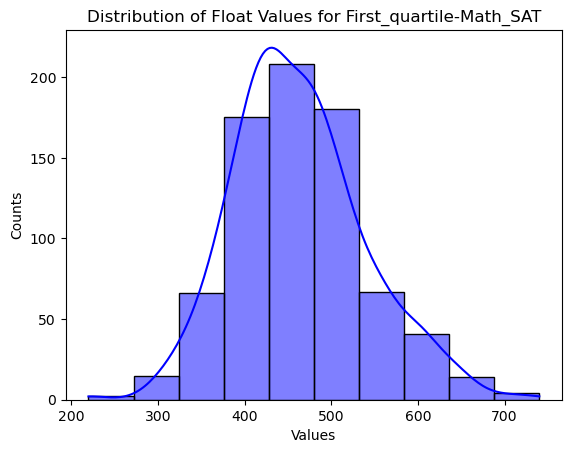

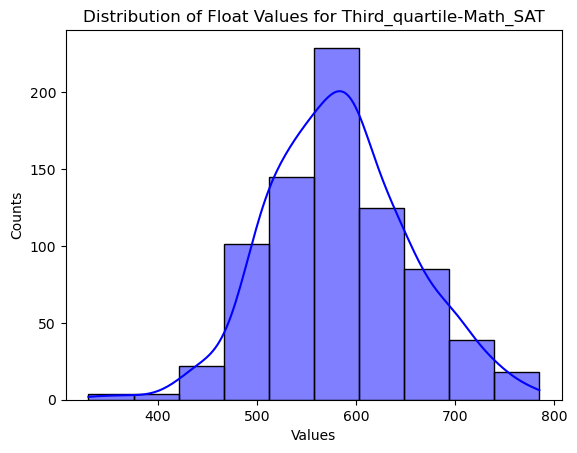

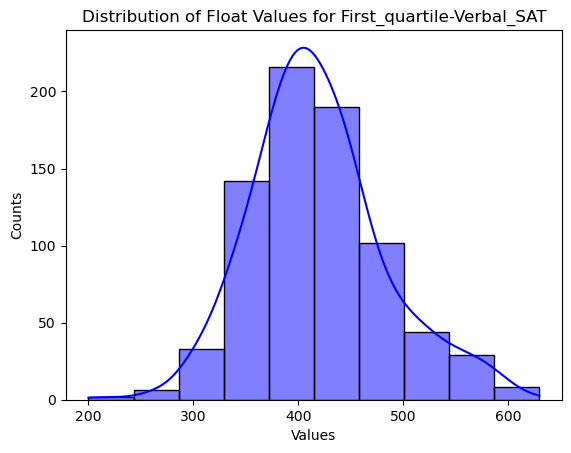

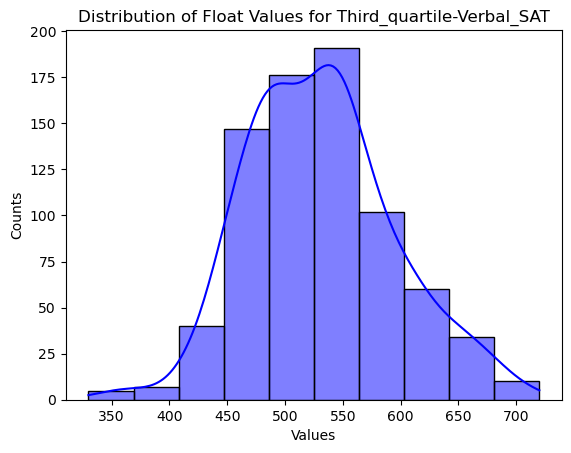

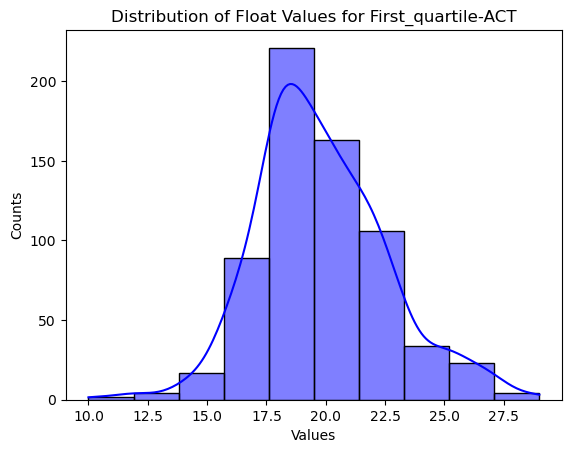

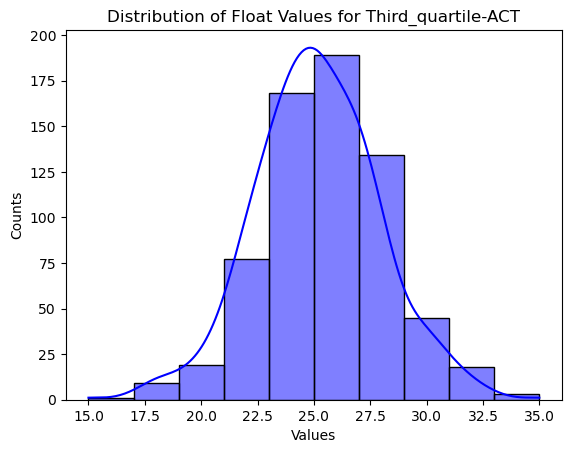

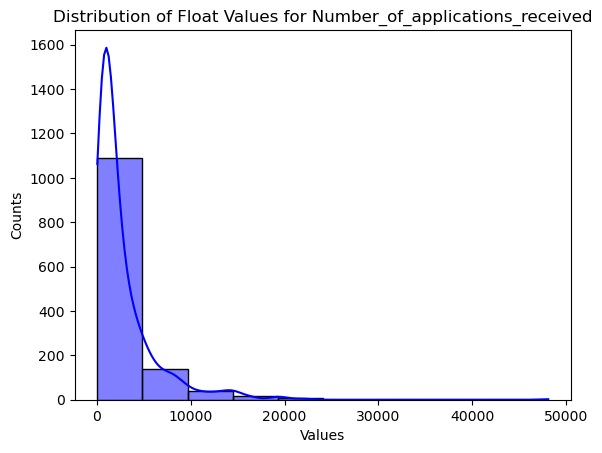

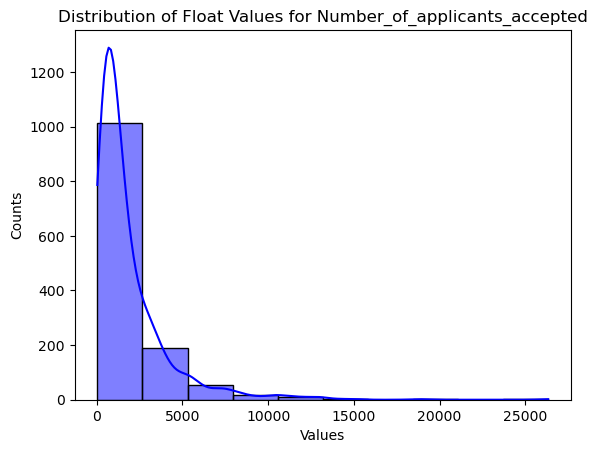

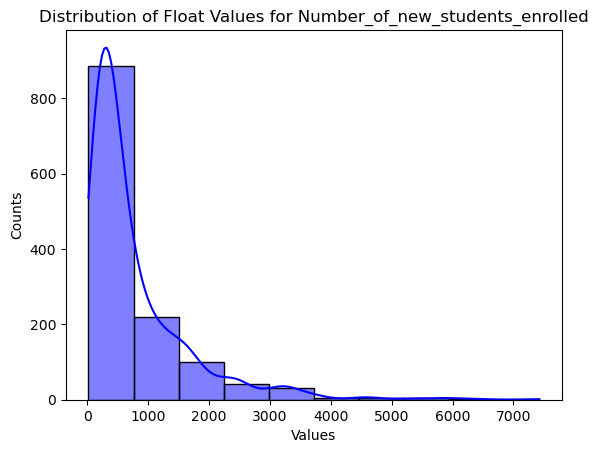

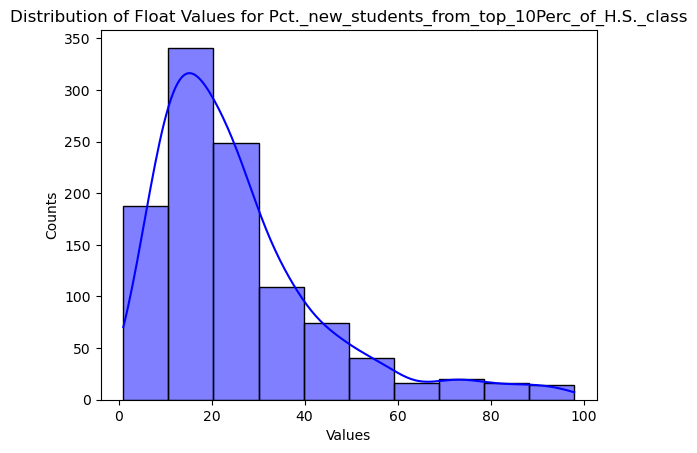

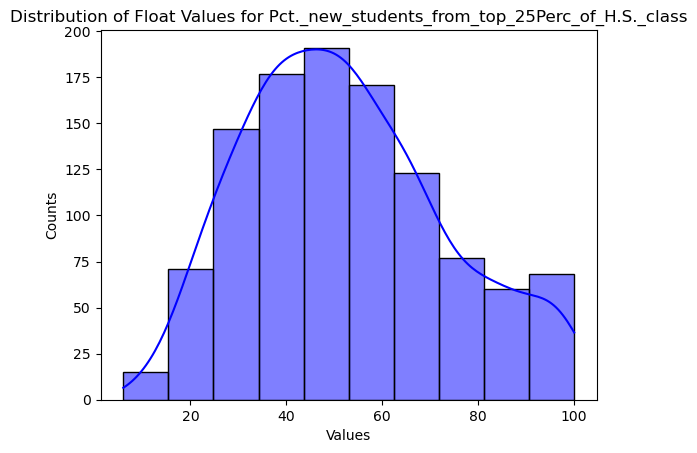

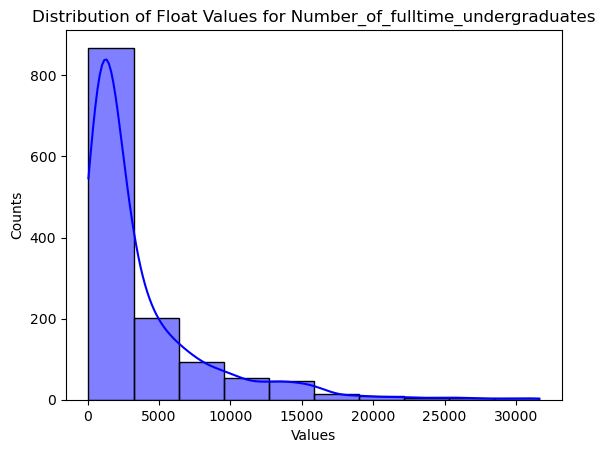

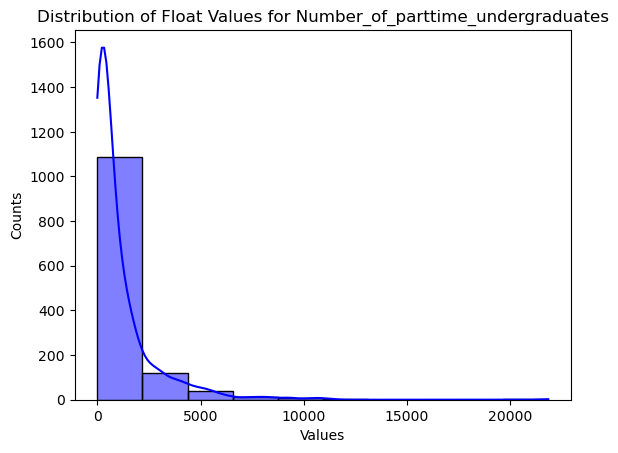

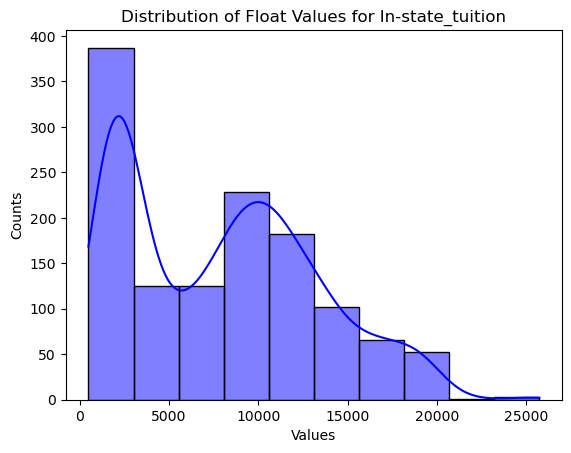

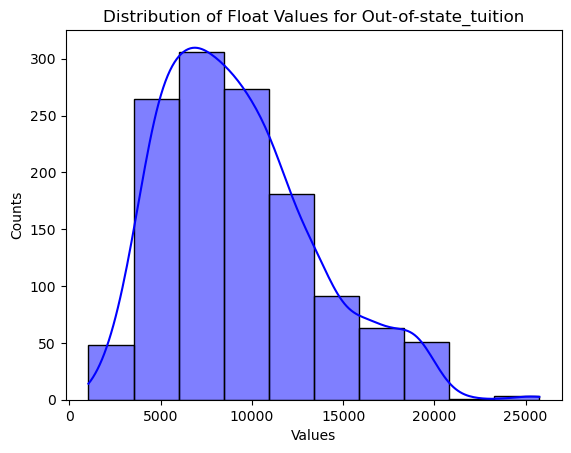

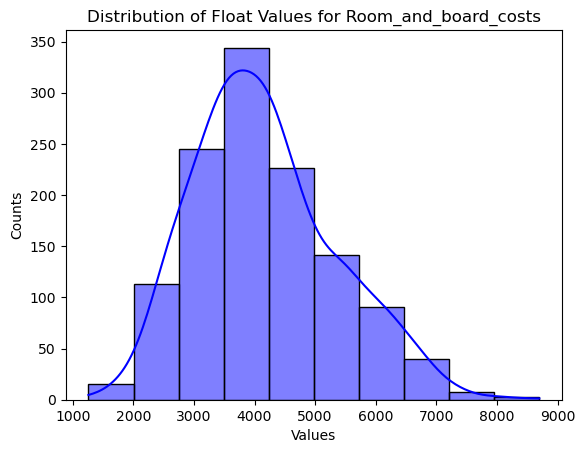

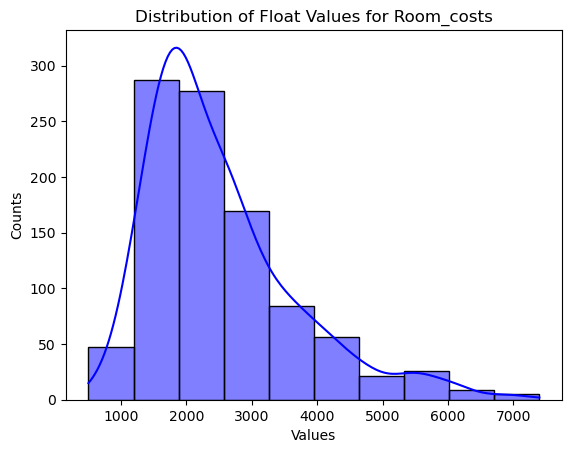

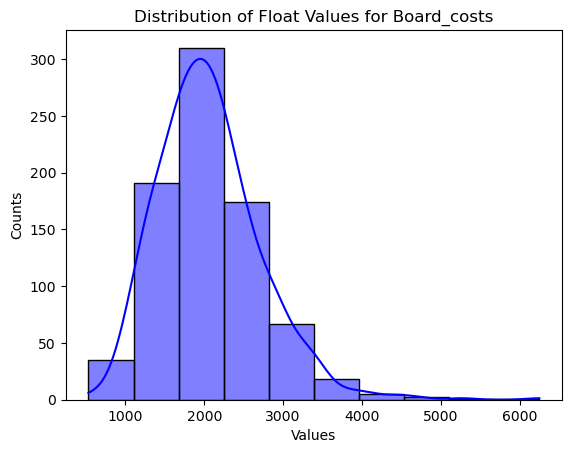

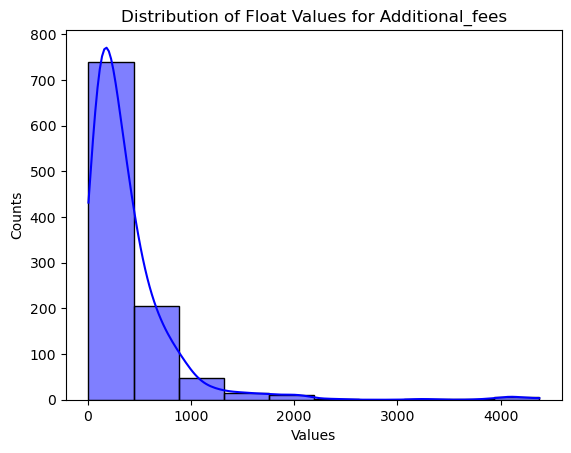

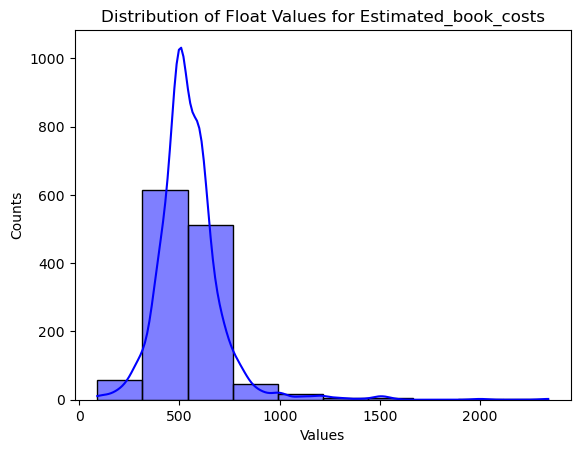

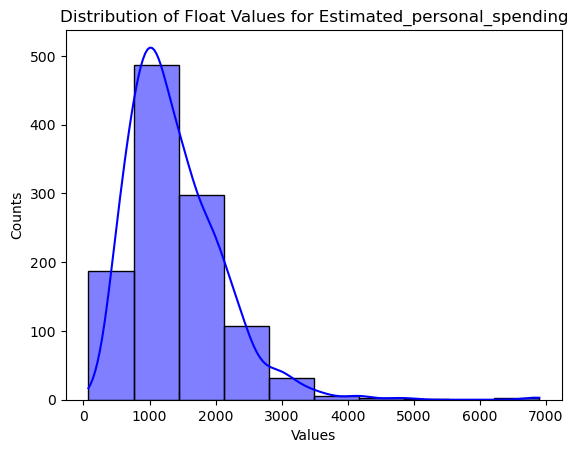

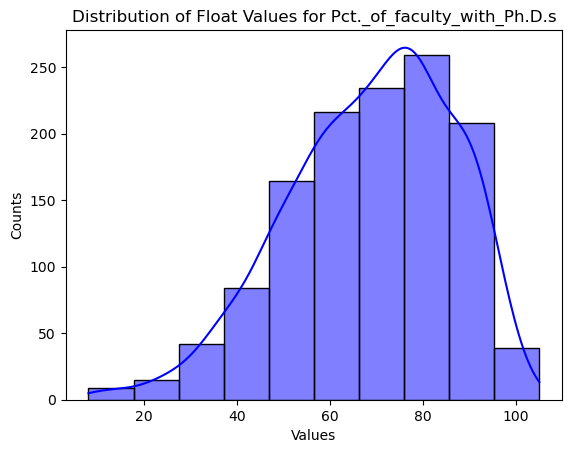

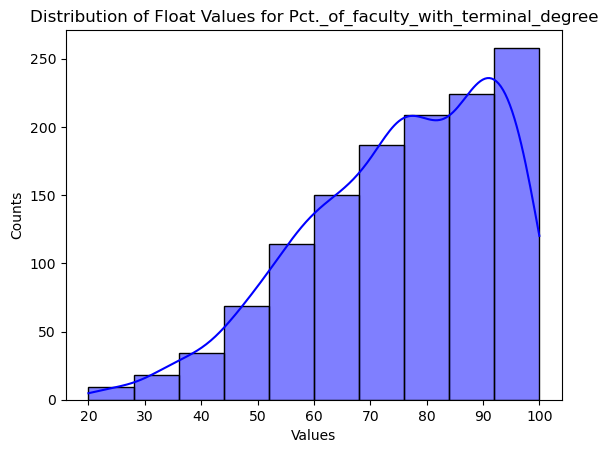

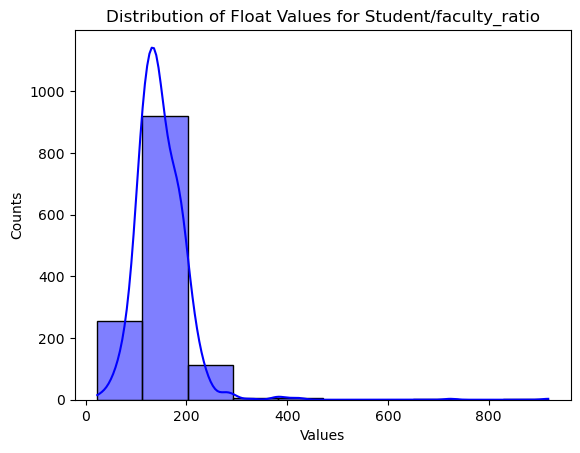

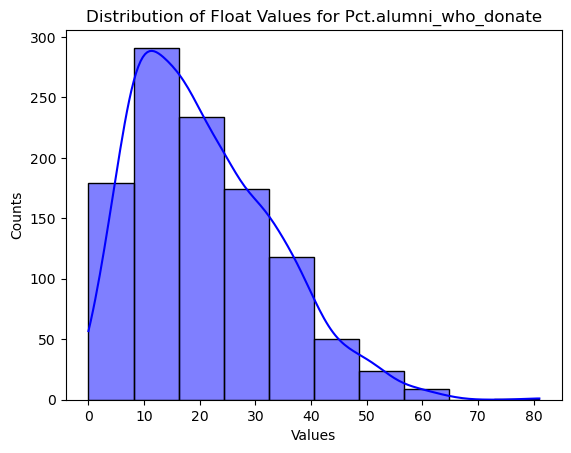

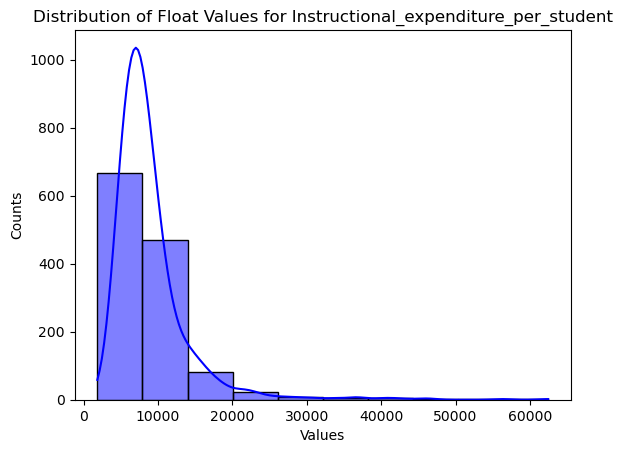

In [38]:
for col in missing_col:

    sns.histplot(big_df[col], kde = True, color = 'blue', bins = 10) 
    plt.title(f'Distribution of Float Values for {col}')
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.show()

## Missing Values

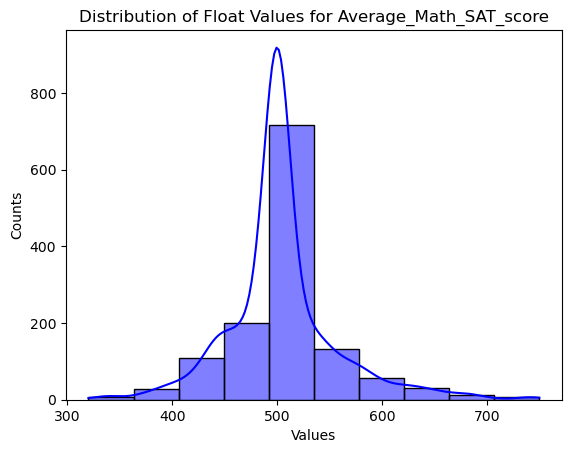

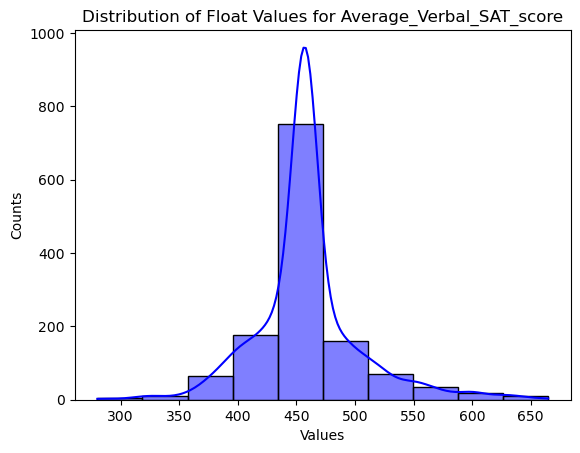

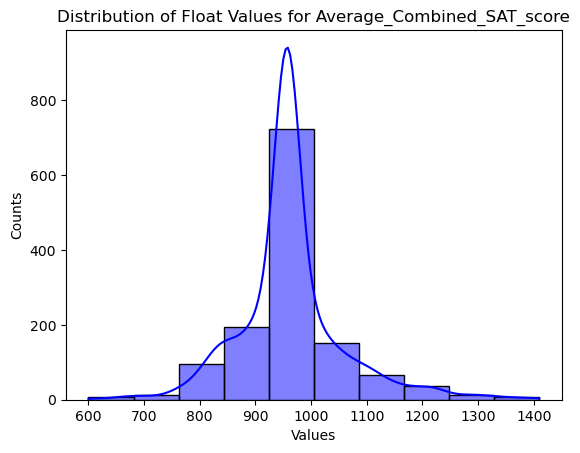

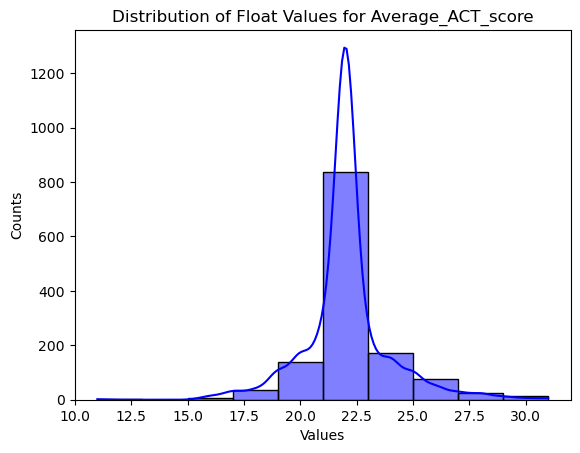

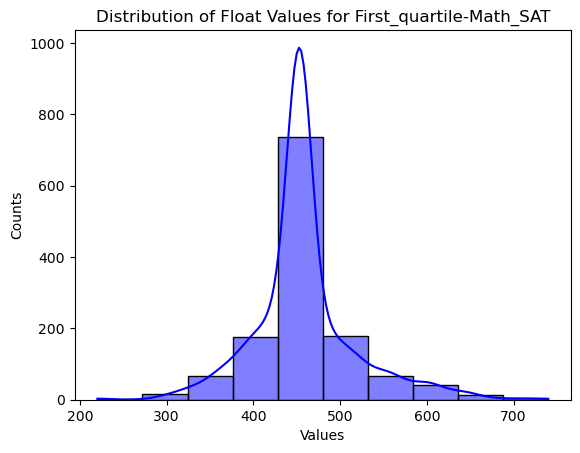

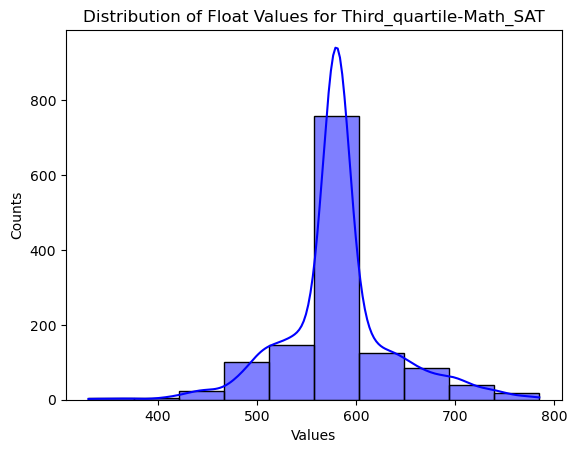

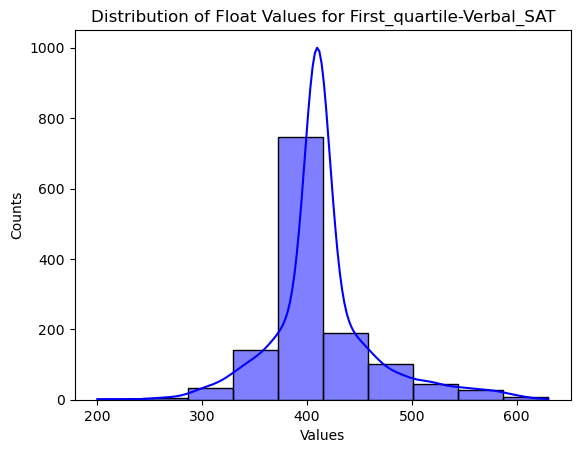

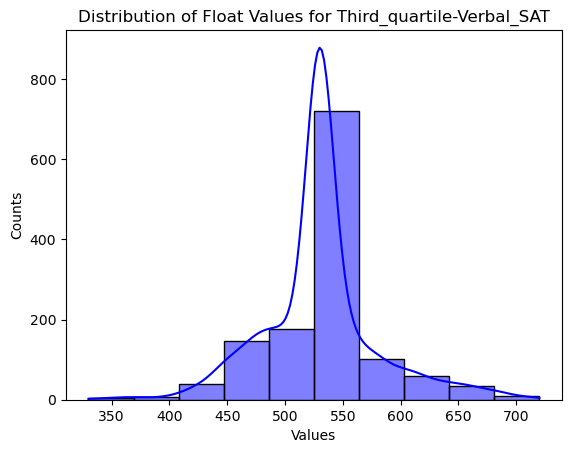

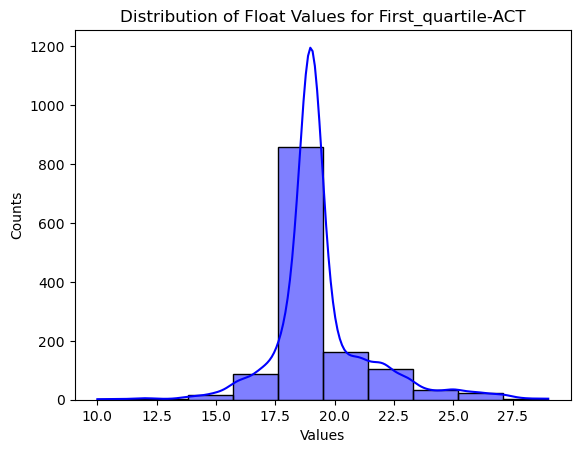

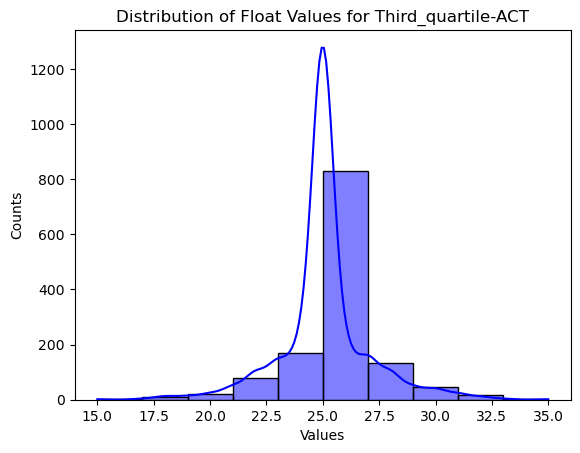

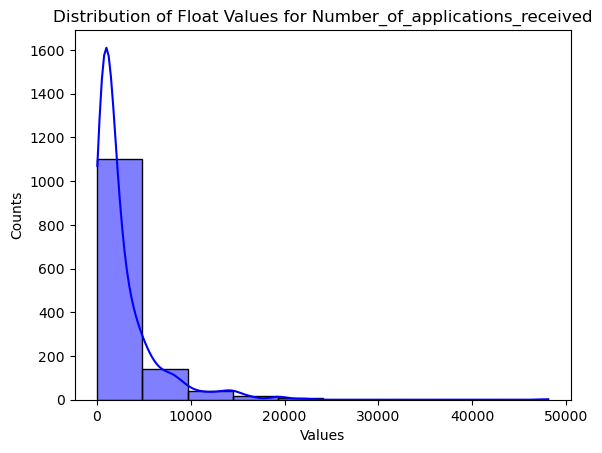

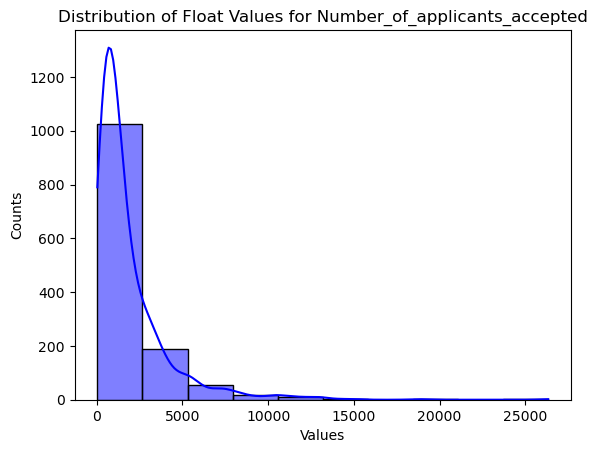

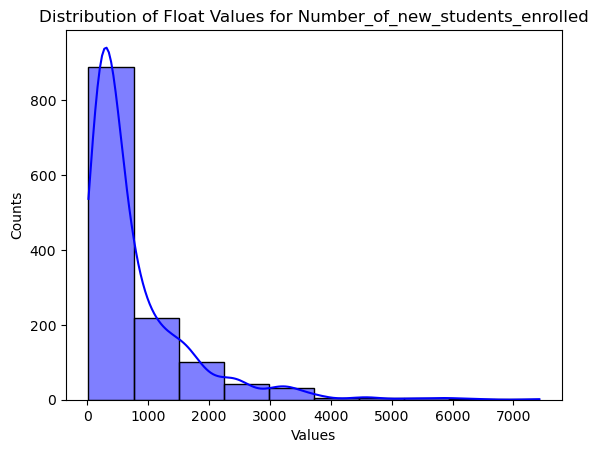

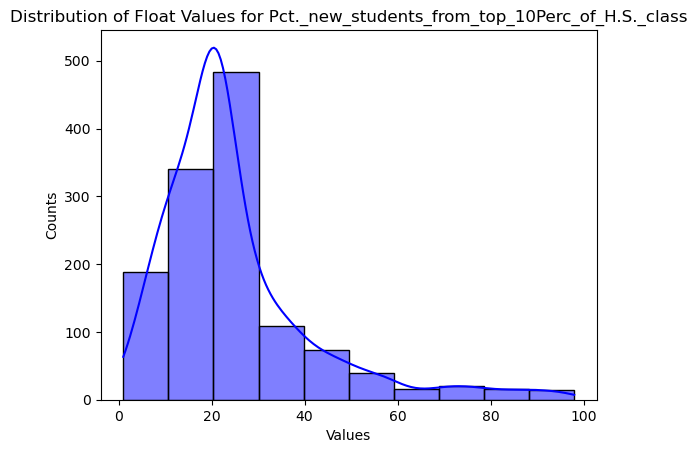

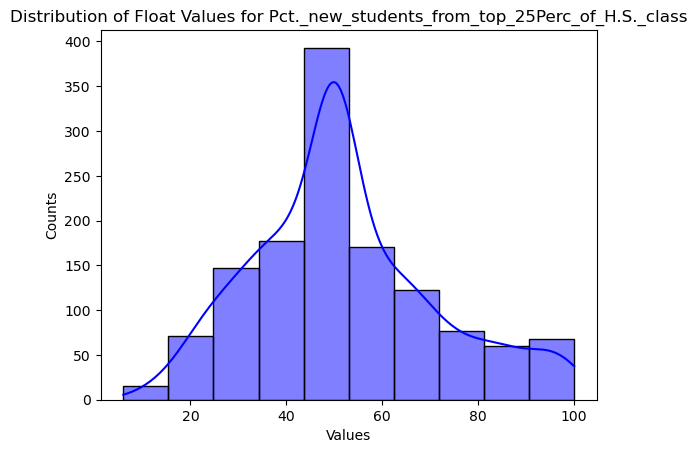

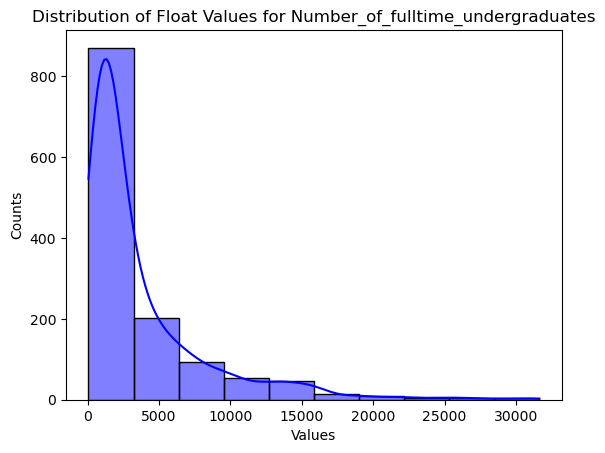

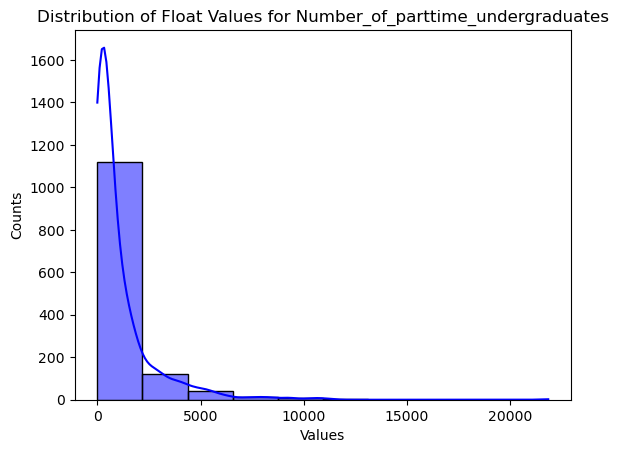

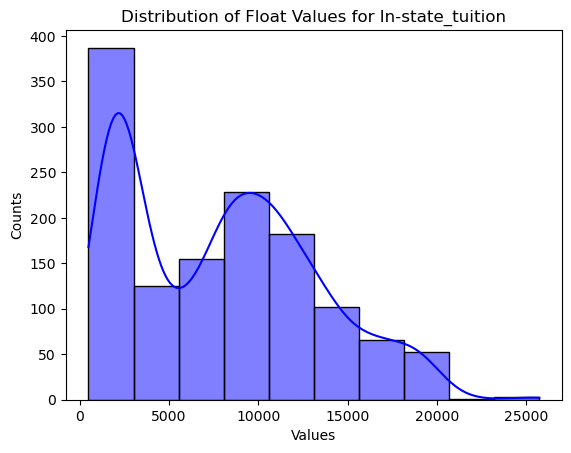

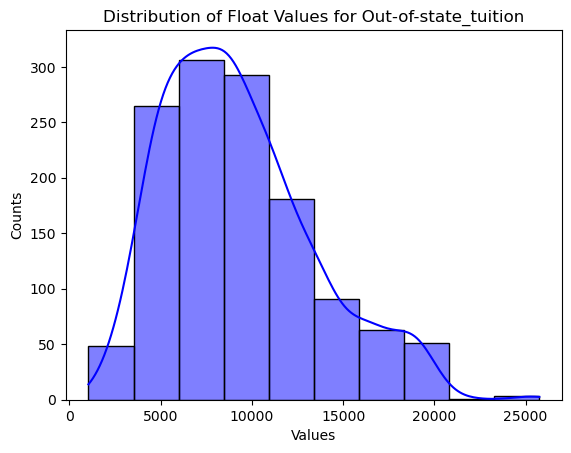

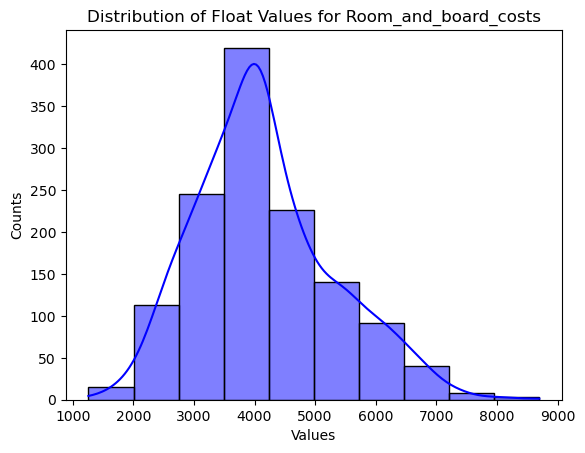

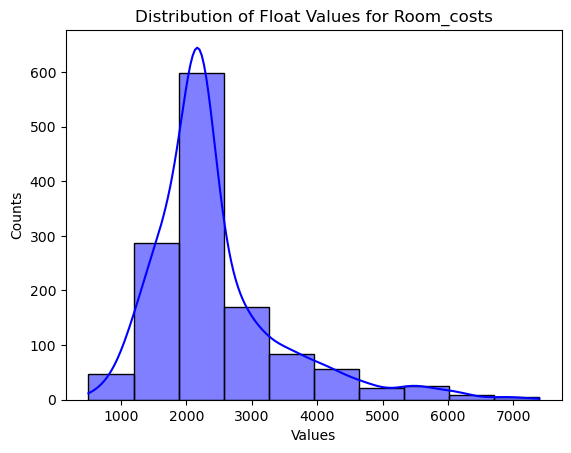

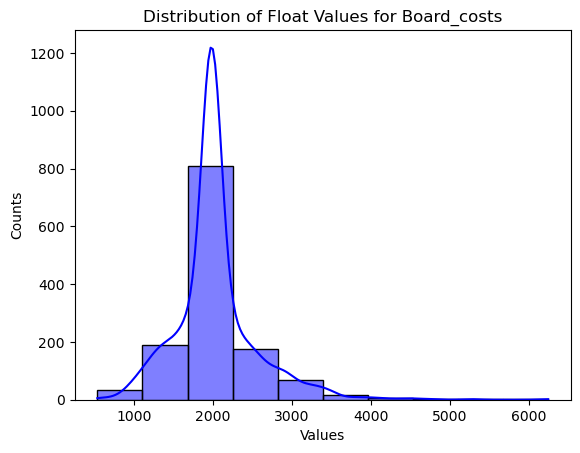

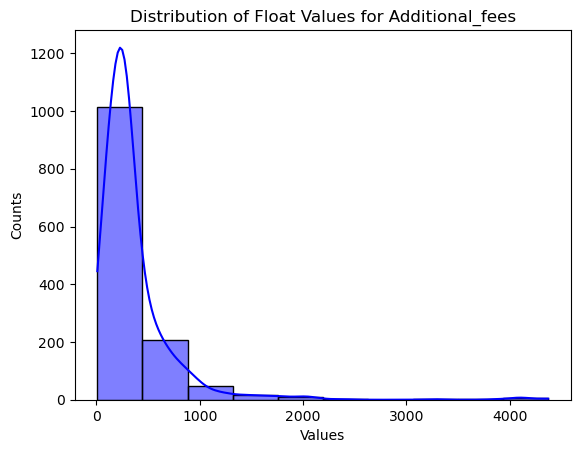

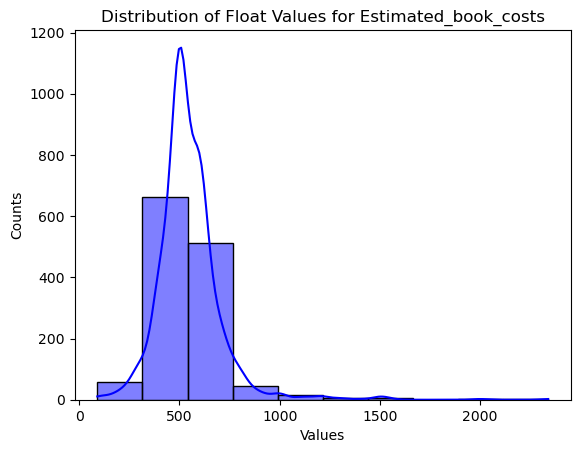

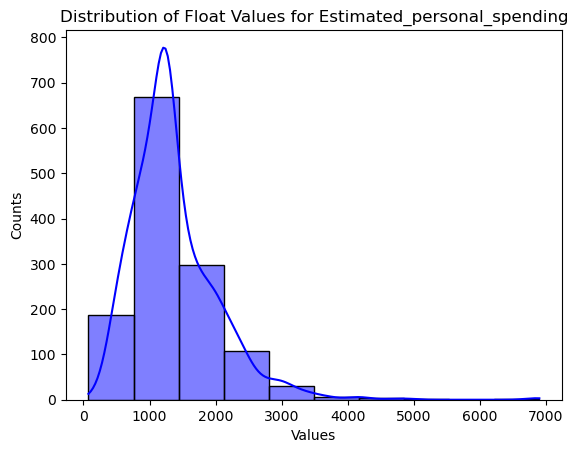

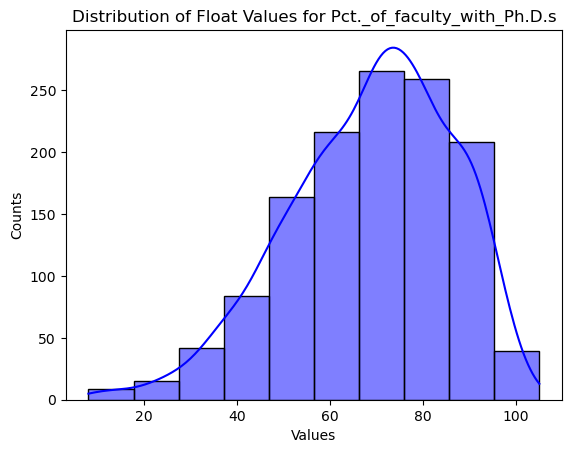

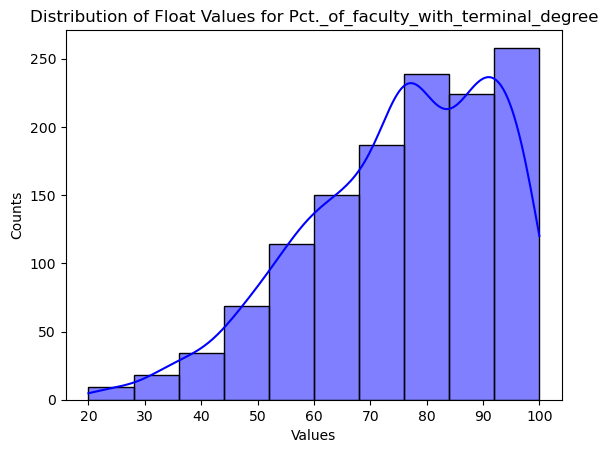

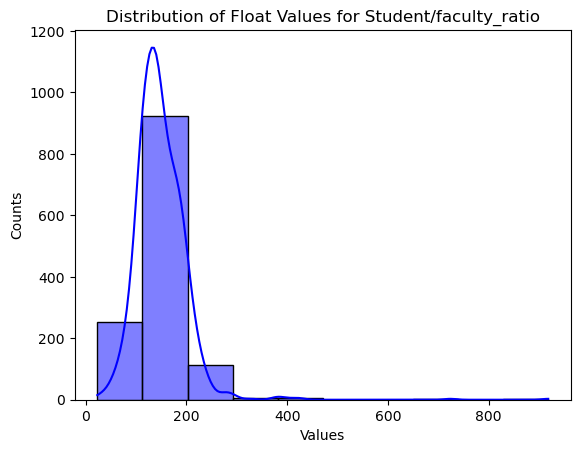

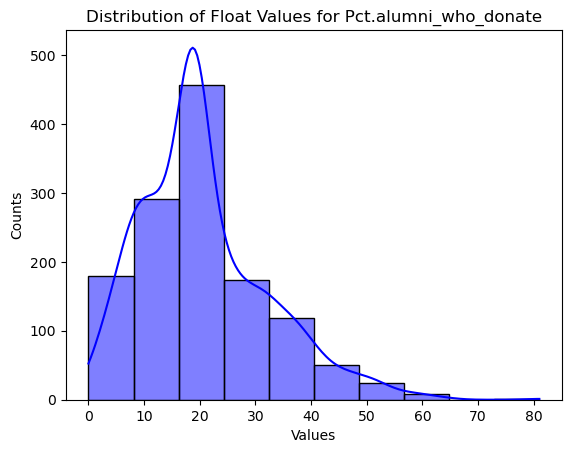

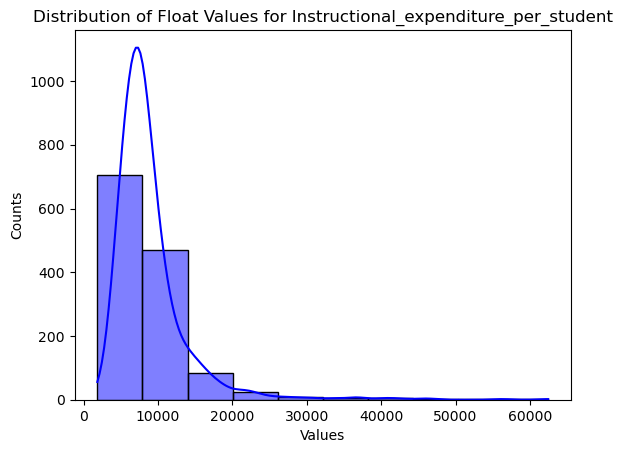

In [39]:
# Filling missing values
for col in missing_col:
    median_value = big_df[col].median()
    big_df[col].fillna(median_value, inplace = True)
    
    
# Plotting distribution again to see what has changed
for col in missing_col:

    sns.histplot(big_df[col], kde = True, color = 'blue', bins = 10) 
    plt.title(f'Distribution of Float Values for {col}')
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.show()

## Outliers

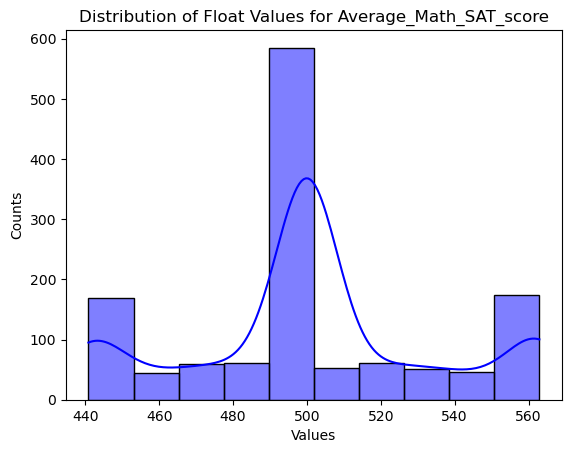

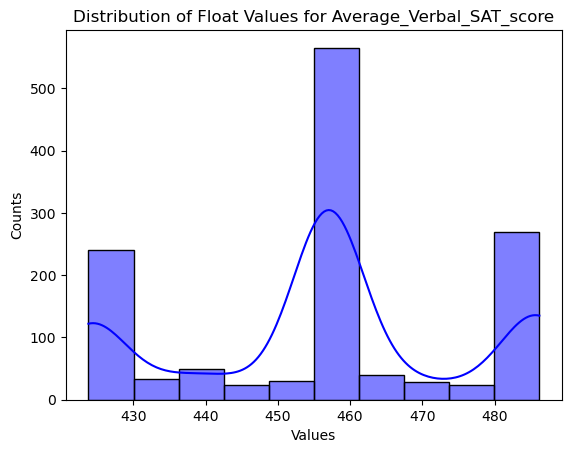

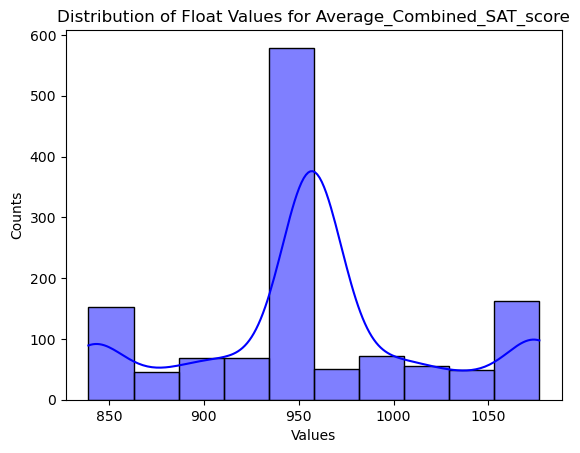

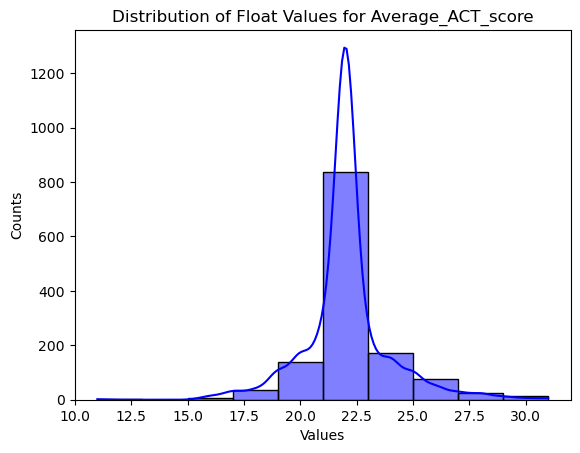

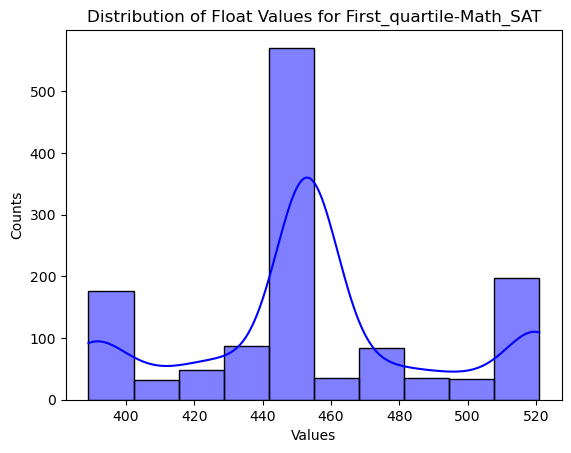

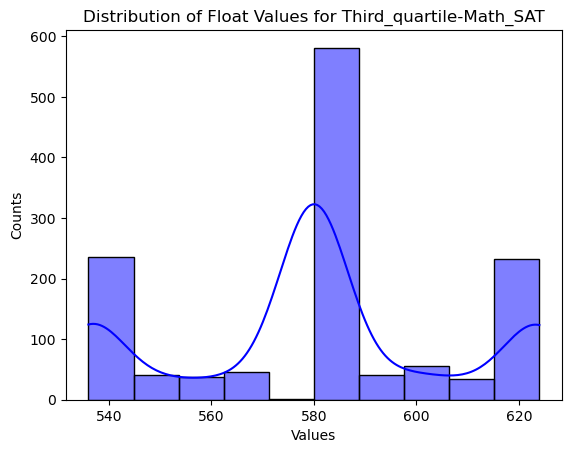

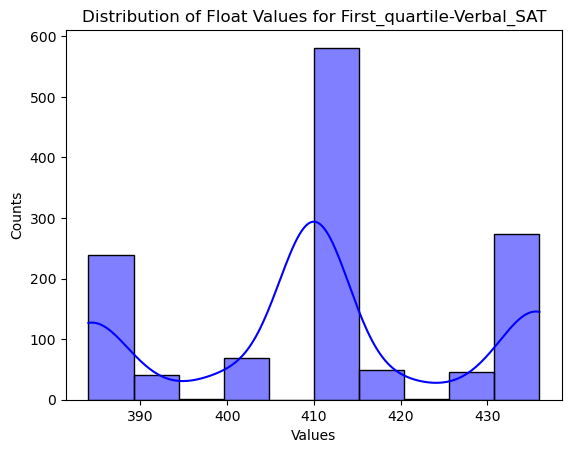

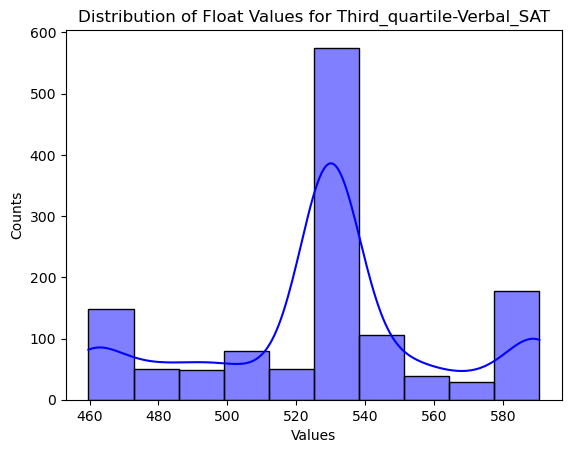

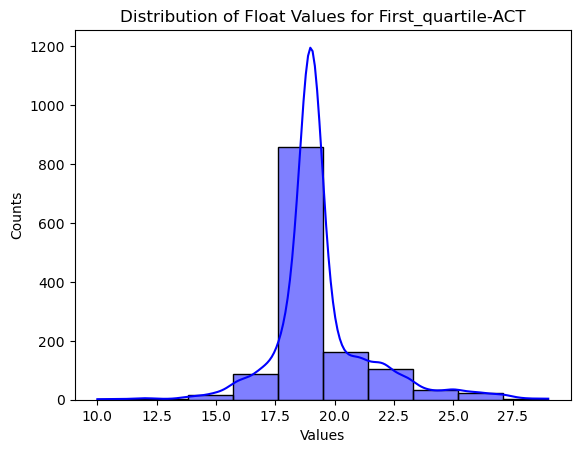

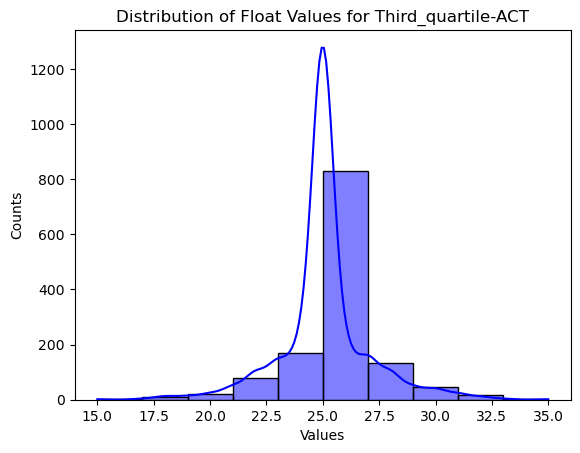

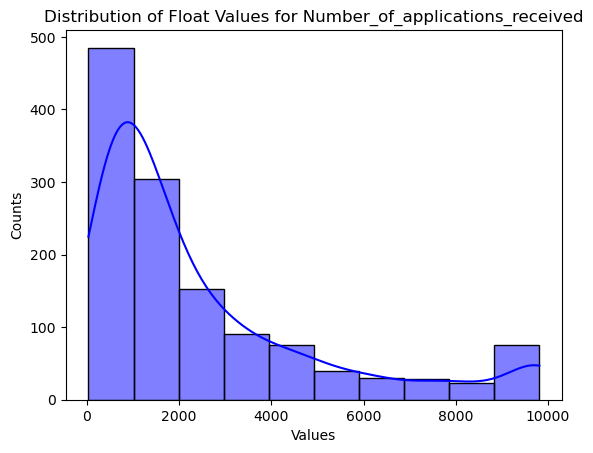

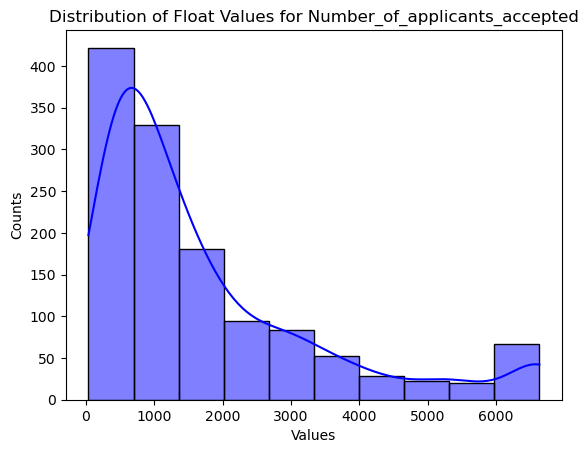

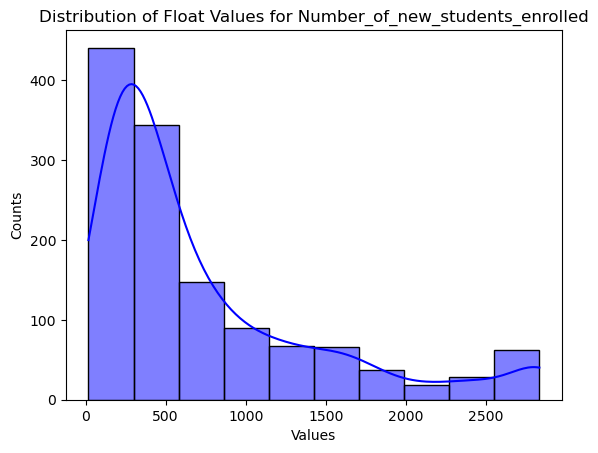

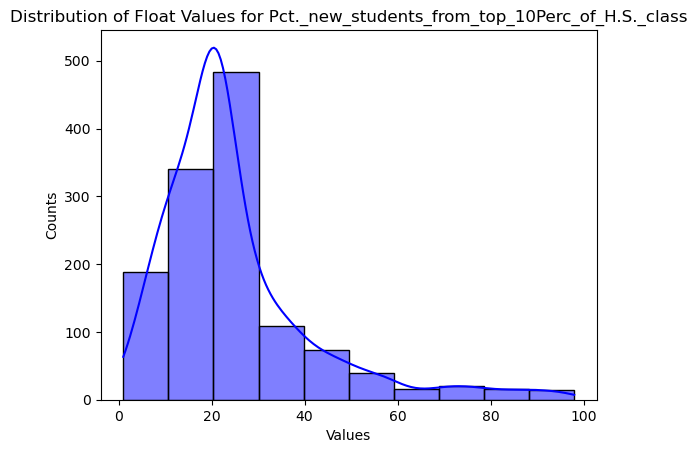

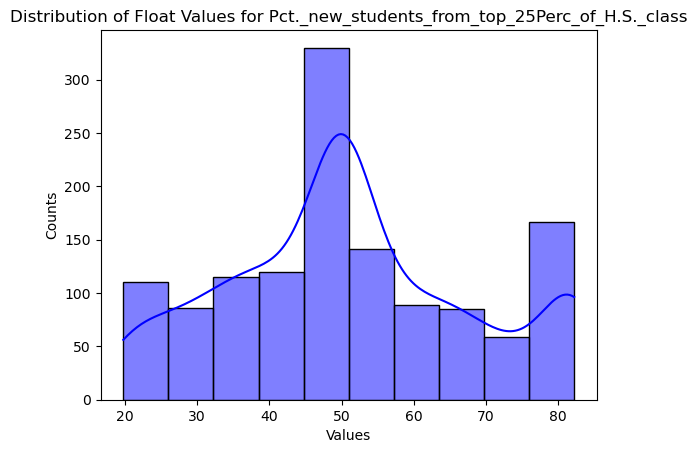

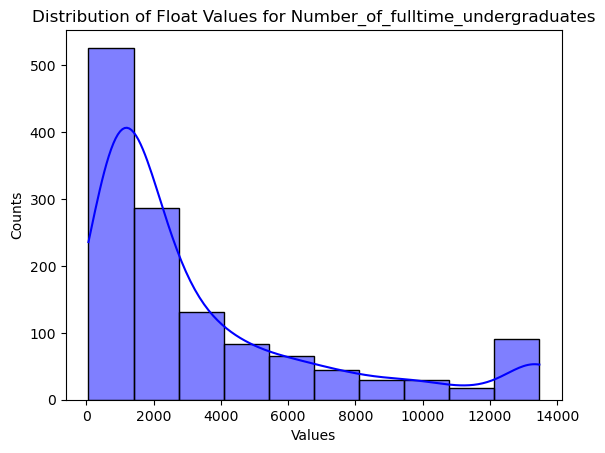

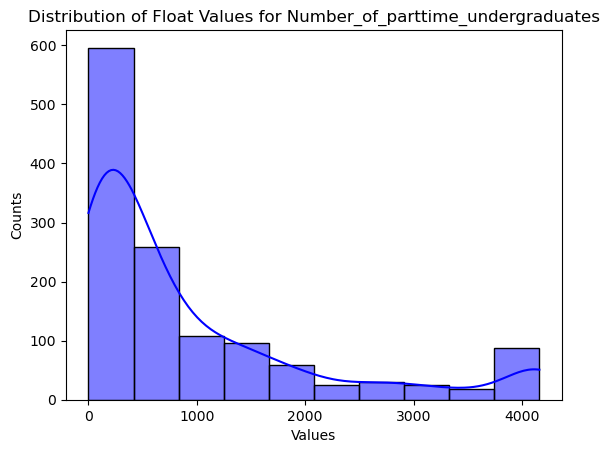

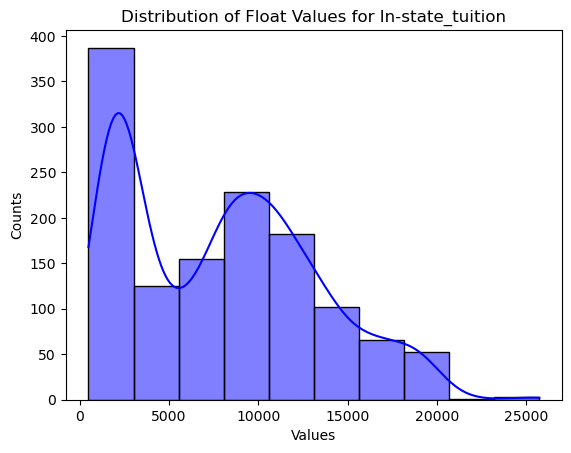

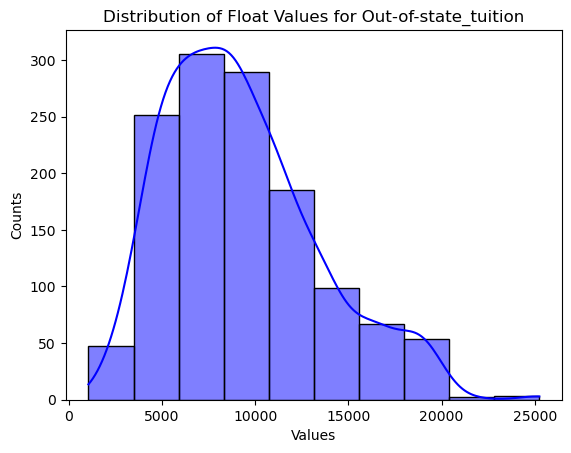

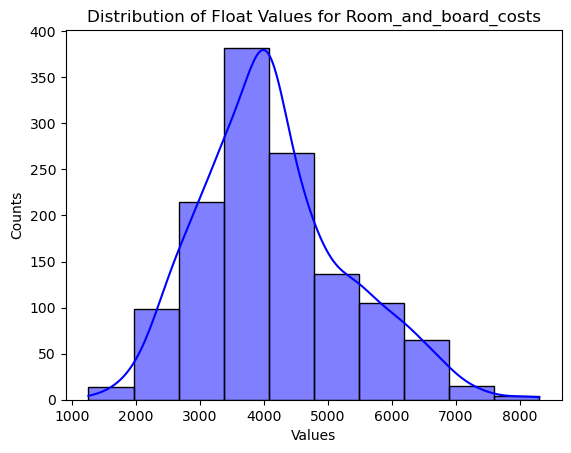

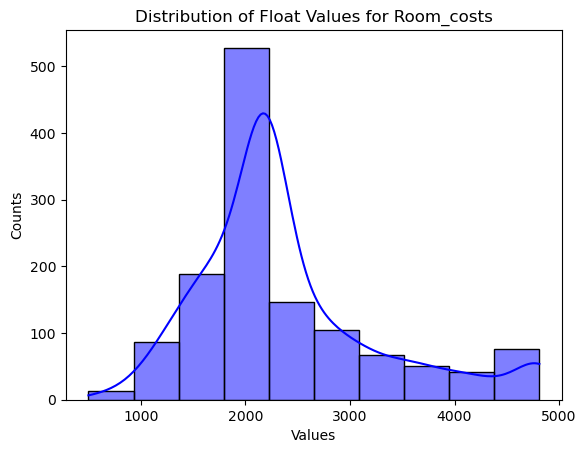

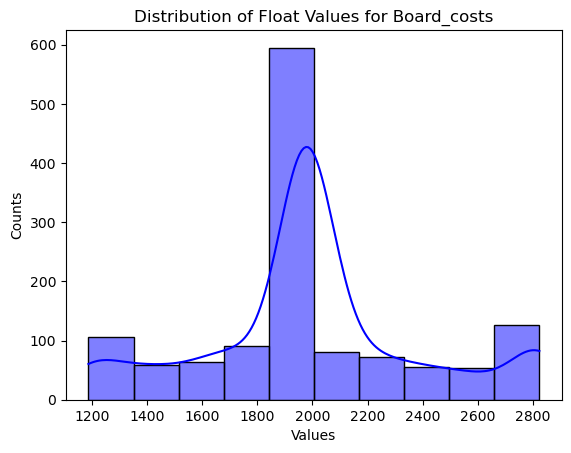

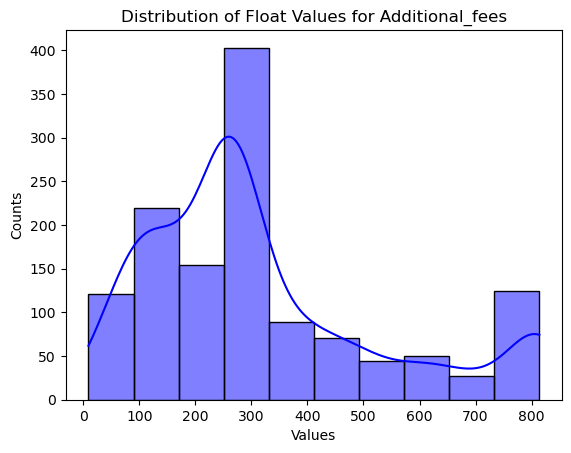

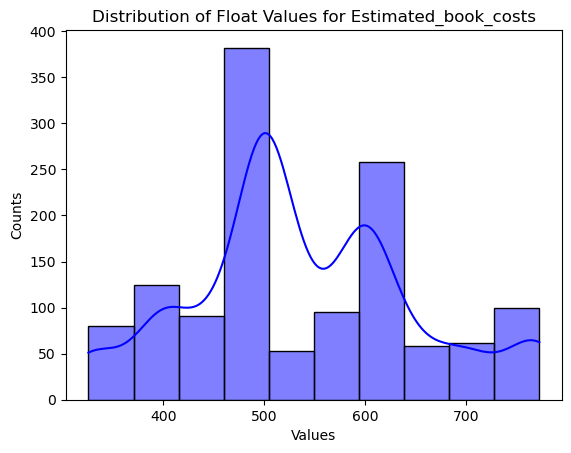

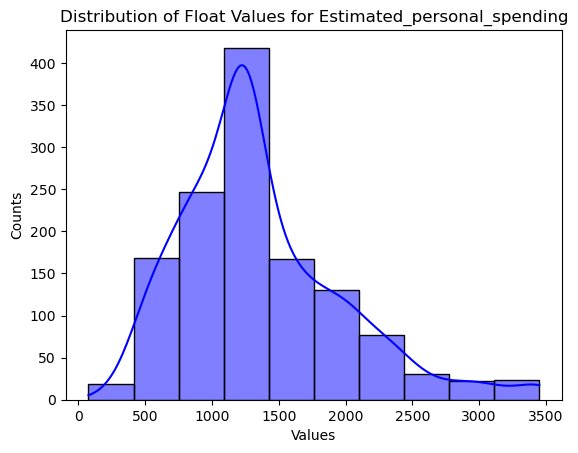

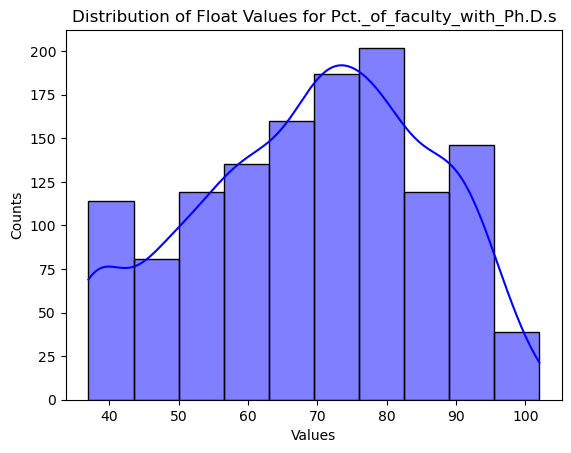

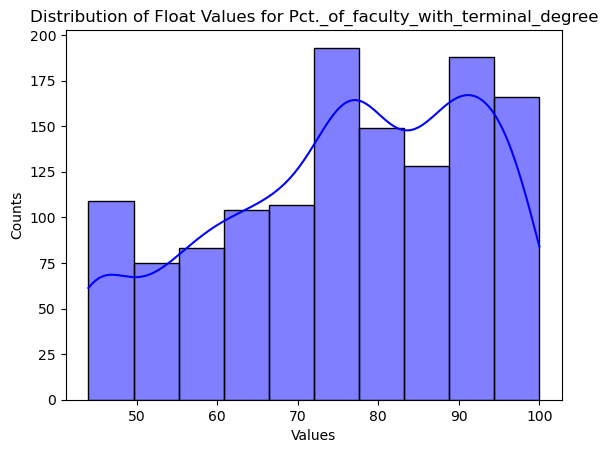

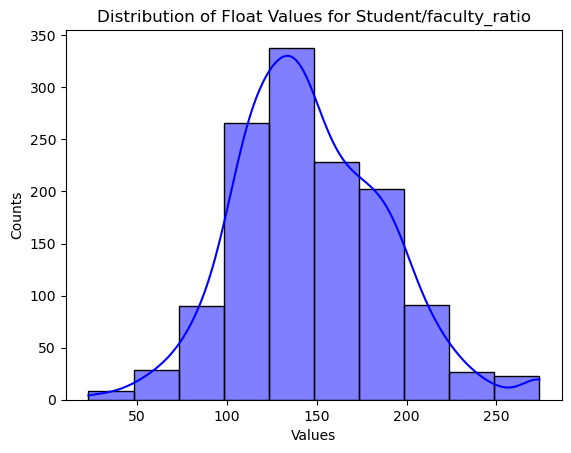

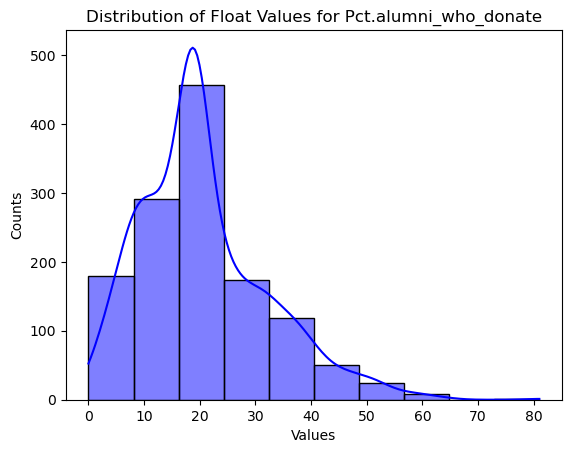

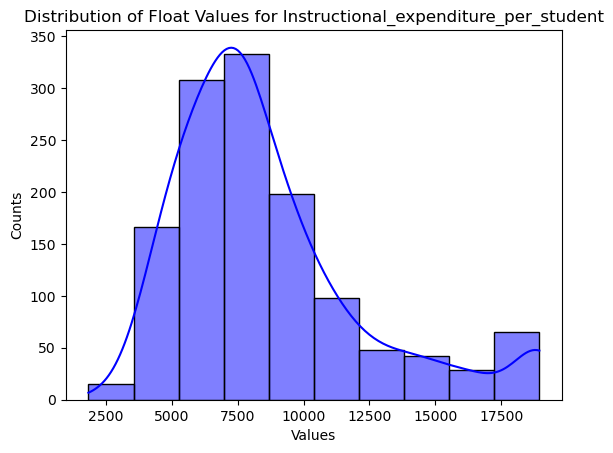

In [49]:
new_df = big_df.copy()

values_to_exclude = ['Average_ACT_Score', ]
filtered_col = [x for x in missing_col if x not in values_to_exclude]

for col in missing_col:
    
    # Get the minimum and maximum values in the column
    min_value = new_df[col].min()
    max_value = new_df[col].max()

#     print(max_value)
    
    # Adjust k based on the range of values
    if max_value < 100:
        pass
    
    else:
        if 100 <= max_value <= 700:
            k = 0.8
        elif 700 <= max_value <= 5000:
            k = 1.7 
        else:
            k = 2.5

        # Calculate the interquartile range (IQR)
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1


        # Lower and upper bounds
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR

    #     print(lower_bound)
    #     print(upper_bound)

        new_df[col] = new_df[col].clip(lower = lower_bound, upper = upper_bound)


# Plotting distribution again to see what has changed
for col in missing_col:

    sns.histplot(new_df[col], kde = True, color = 'blue', bins = 10) 
    plt.title(f'Distribution of Float Values for {col}')
    plt.xlabel('Values')
    plt.ylabel('Counts')
    plt.show()

In [50]:
new_df.head()

FICE State  Public/private_indicator  Average_Math_SAT_score  \
0   1061.0    AK                         2                   490.0   
1   1063.0    AK                         1                   499.0   
2   1065.0    AK                         1                   500.0   
3  11462.0    AK                         1                   459.0   
4   1002.0    AL                         1                   500.0   

   Average_Verbal_SAT_score  Average_Combined_SAT_score  Average_ACT_score  \
0                     482.0                       972.0               20.0   
1                     462.0                       961.0               22.0   
2                     457.0                       957.0               22.0   
3                     423.8                       881.0               20.0   
4                     457.0                       957.0               17.0   

   First_quartile-Math_SAT  Third_quartile-Math_SAT  \
0                    440.0                    536.0   
1                    453.0                    580.0   
2                    453.0                    580.0   
3                    453.0                    580.0   
4                    453.0                    580.0   

   First_quartile-Verbal_SAT  ...  Board_costs  Additional_fees  \
0                      430.0  ...       2500.0            130.0   
1                      410.0  ...       1790.0            155.0   
2                      410.0  ...       2250.0             34.0   
3                      410.0  ...       2520.0            114.0   
4                      410.0  ...       1442.0            155.0   

   Estimated_book_costs  Estimated_personal_spending  \
0                772.55                       1500.0   
1                650.00                       2304.0   
2                500.00                       1162.0   
3                580.00                       1260.0   
4                500.00                        850.0   

   Pct._of_faculty_with_Ph.D.s  Pct._of_faculty_with_terminal_degree  \
0                         76.0                                  72.0   
1                         67.0                                  77.0   
2                         39.0                                  51.0   
3                         48.0                                  77.0   
4                         53.0                                  53.0   

   Student/faculty_ratio  Pct.alumni_who_donate  \
0                  119.0                    2.0   
1                  100.0                    8.0   
2                   95.0                   19.0   
3                  137.0                    6.0   
4                  143.0                   19.0   

   Instructional_expenditure_per_student  binaryClass  
0                                10922.0            P  
1                                11935.0            N  
2                                 9584.0            P  
3                                 8046.0            N  
4                                 7043.0            P  

[5 rows x 34 columns]

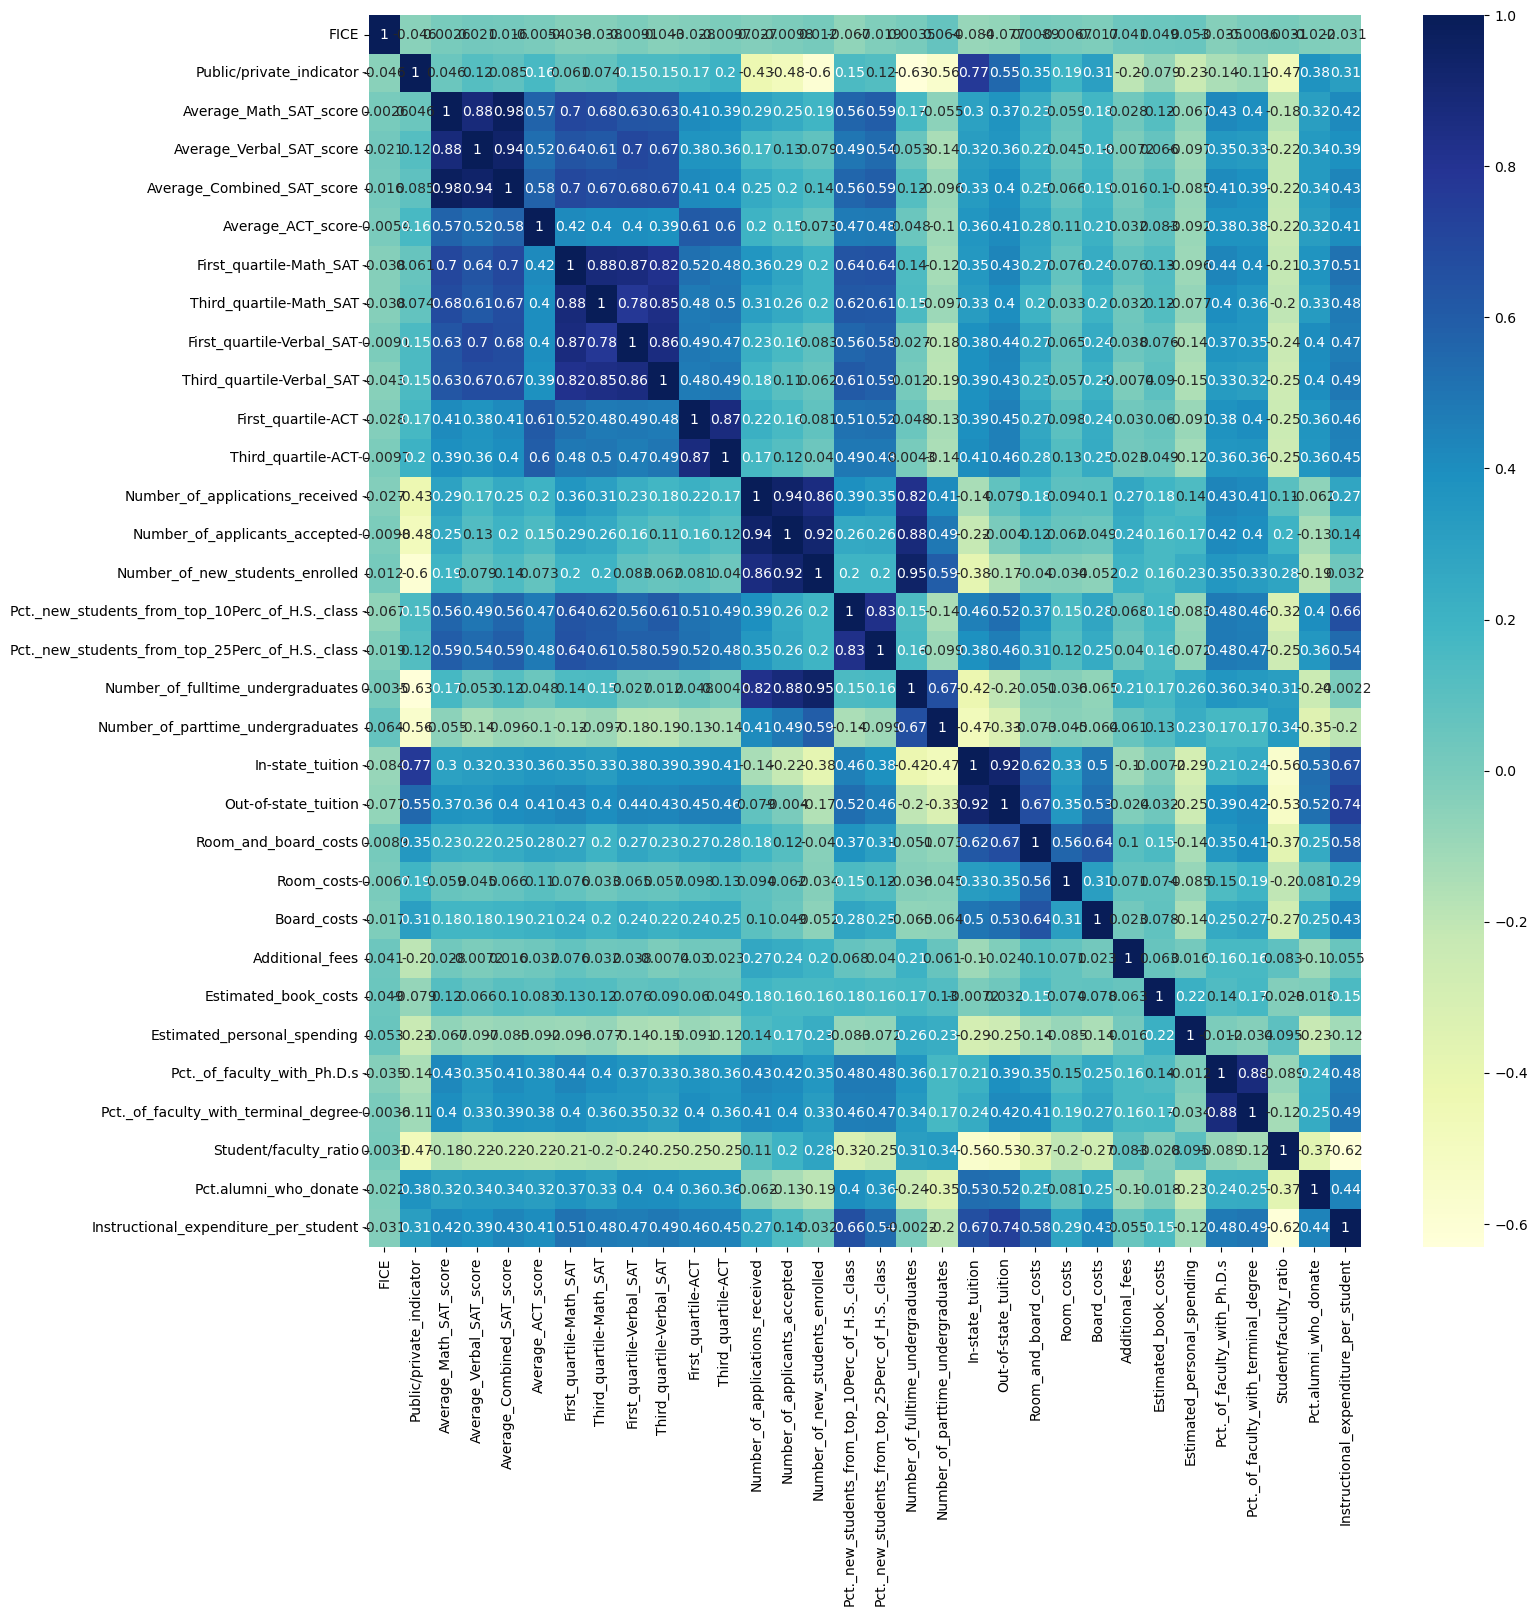

In [51]:
# # Correlation Heatmap
# plt.figure(figsize = (16, 16))
# dataplot = sns.heatmap(new_df.corr(numeric_only = True), cmap = "YlGnBu", annot = True)
# plt.show()

In [62]:
## Determine if all the features are important
df = new_df.copy()

X = df.drop(['binaryClass', 'State'], axis = 1) # df.iloc[:, df.columns != df.columns[i]]  # Your feature matrix
y = df['binaryClass']  # Your target variable

# Create an estimator (e.g., RandomForestClassifier)
estimator = RandomForestClassifier()

# Initialize RFE with the estimator and the desired number of features
rfe = RFE(estimator, n_features_to_select = len(df.columns))

# Fit RFE and get the selected features
rfe.fit(X, y)
selected_features = X.columns[rfe.support_]

print(len(selected_features))
print(selected_features)

## Mapping categorical features

In [66]:
states = list(set(new_df['State']))
mapped_states = {st: idx if st is not None else -1 for idx, st in enumerate(states)}
mapped_states

{'TX': 0,
 'ND': 1,
 'NV': 2,
 'TN': 3,
 'LA': 4,
 'NC': 5,
 'NJ': 6,
 'UT': 7,
 'MO': 8,
 'WY': 9,
 'SC': 10,
 'NY': 11,
 'CT': 12,
 'RI': 13,
 'WA': 14,
 'GA': 15,
 'ME': 16,
 'MN': 17,
 'NH': 18,
 'WI': 19,
 'DE': 20,
 'VA': 21,
 'NE': 22,
 'IL': 23,
 'IA': 24,
 'AK': 25,
 'SD': 26,
 'WV': 27,
 'AR': 28,
 'OR': 29,
 'KY': 30,
 'ID': 31,
 'PA': 32,
 'DC': 33,
 'AZ': 34,
 'MS': 35,
 'KS': 36,
 'NM': 37,
 'MI': 38,
 'VT': 39,
 'AL': 40,
 'OK': 41,
 'MT': 42,
 'MD': 43,
 'CA': 44,
 'HI': 45,
 'MA': 46,
 'FL': 47,
 'OH': 48,
 'IN': 49,
 'CO': 50}

In [67]:
new_df['State'] = new_df['State'].replace(mapped_states)
new_df.head()

FICE State  Public/private_indicator  Average_Math_SAT_score  \
0   1061.0    25                         2                   490.0   
1   1063.0    25                         1                   499.0   
2   1065.0    25                         1                   500.0   
3  11462.0    25                         1                   459.0   
4   1002.0    40                         1                   500.0   

   Average_Verbal_SAT_score  Average_Combined_SAT_score  Average_ACT_score  \
0                     482.0                       972.0               20.0   
1                     462.0                       961.0               22.0   
2                     457.0                       957.0               22.0   
3                     423.8                       881.0               20.0   
4                     457.0                       957.0               17.0   

   First_quartile-Math_SAT  Third_quartile-Math_SAT  \
0                    440.0                    536.0   
1                    453.0                    580.0   
2                    453.0                    580.0   
3                    453.0                    580.0   
4                    453.0                    580.0   

   First_quartile-Verbal_SAT  ...  Board_costs  Additional_fees  \
0                      430.0  ...       2500.0            130.0   
1                      410.0  ...       1790.0            155.0   
2                      410.0  ...       2250.0             34.0   
3                      410.0  ...       2520.0            114.0   
4                      410.0  ...       1442.0            155.0   

   Estimated_book_costs  Estimated_personal_spending  \
0                772.55                       1500.0   
1                650.00                       2304.0   
2                500.00                       1162.0   
3                580.00                       1260.0   
4                500.00                        850.0   

   Pct._of_faculty_with_Ph.D.s  Pct._of_faculty_with_terminal_degree  \
0                         76.0                                  72.0   
1                         67.0                                  77.0   
2                         39.0                                  51.0   
3                         48.0                                  77.0   
4                         53.0                                  53.0   

   Student/faculty_ratio  Pct.alumni_who_donate  \
0                  119.0                    2.0   
1                  100.0                    8.0   
2                   95.0                   19.0   
3                  137.0                    6.0   
4                  143.0                   19.0   

   Instructional_expenditure_per_student  binaryClass  
0                                10922.0            P  
1                                11935.0            N  
2                                 9584.0            P  
3                                 8046.0            N  
4                                 7043.0            P  

[5 rows x 34 columns]

## Train - Test Split

In [68]:
# X = new_df.drop(['binaryClass'], axis = 1)
# y = new_df['binaryClass']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 17)

## Scaling

In [72]:
# scaler = StandardScaler()
# scaler.fit(X_train)

# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

array([[-0.06066457, -1.31467546,  0.76766723, ..., -0.22985745,
        -0.14583026,  0.20169189],
       [-0.0793859 , -1.31467546,  0.76766723, ..., -0.25352339,
        -1.17913237, -0.72220912],
       [ 5.77753558, -0.42068143,  0.76766723, ..., -1.48415235,
         0.4569293 ,  0.10066568],
       ...,
       [-0.38463883,  0.66488276,  0.76766723, ..., -1.12916323,
        -0.4902643 , -0.3683458 ],
       [-0.50394766, -0.67610829, -1.30264776, ...,  0.59845051,
        -0.05972175, -0.64671103],
       [ 0.51430248, -0.93153516,  0.76766723, ...,  1.616086  ,
        -0.14583026, -0.23364418]])

# Models

## KNN

### StandardScaler

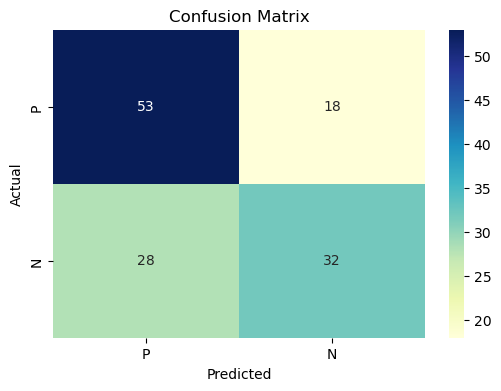


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 15
Accuracy: 64.89 %
              precision    recall  f1-score   support

           N       0.65      0.75      0.70        71
           P       0.64      0.53      0.58        60

    accuracy                           0.65       131
   macro avg       0.65      0.64      0.64       131
weighted avg       0.65      0.65      0.64       131



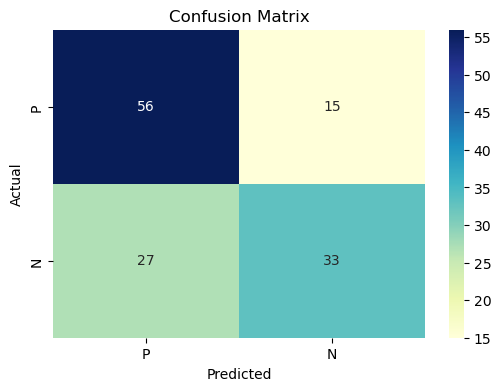


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 20
Accuracy: 67.94 %
              precision    recall  f1-score   support

           N       0.67      0.79      0.73        71
           P       0.69      0.55      0.61        60

    accuracy                           0.68       131
   macro avg       0.68      0.67      0.67       131
weighted avg       0.68      0.68      0.67       131



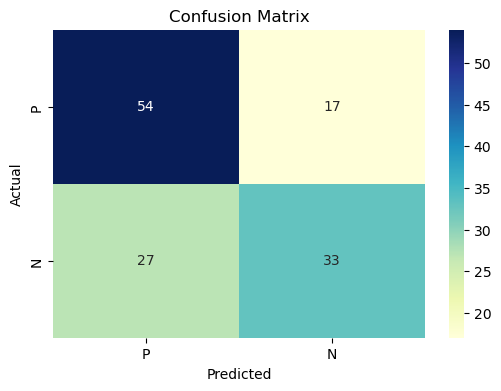


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 30
Accuracy: 66.41 %
              precision    recall  f1-score   support

           N       0.67      0.76      0.71        71
           P       0.66      0.55      0.60        60

    accuracy                           0.66       131
   macro avg       0.66      0.66      0.66       131
weighted avg       0.66      0.66      0.66       131



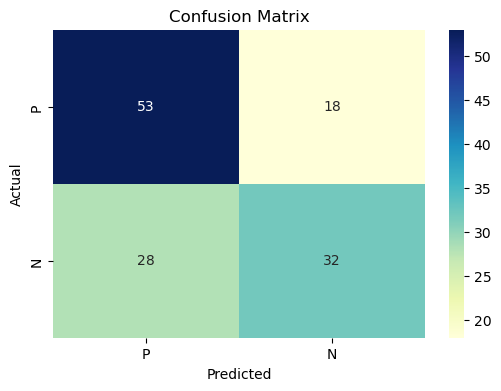


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 50
Accuracy: 64.89 %
              precision    recall  f1-score   support

           N       0.65      0.75      0.70        71
           P       0.64      0.53      0.58        60

    accuracy                           0.65       131
   macro avg       0.65      0.64      0.64       131
weighted avg       0.65      0.65      0.64       131



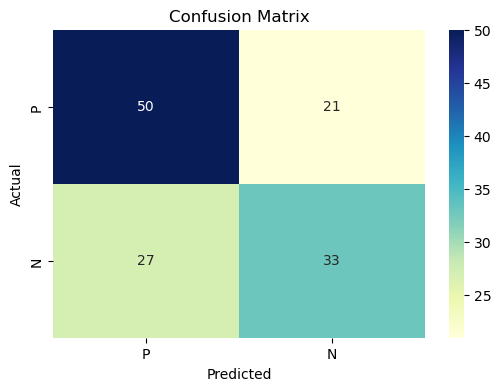


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 100
Accuracy: 63.36 %
              precision    recall  f1-score   support

           N       0.65      0.70      0.68        71
           P       0.61      0.55      0.58        60

    accuracy                           0.63       131
   macro avg       0.63      0.63      0.63       131
weighted avg       0.63      0.63      0.63       131



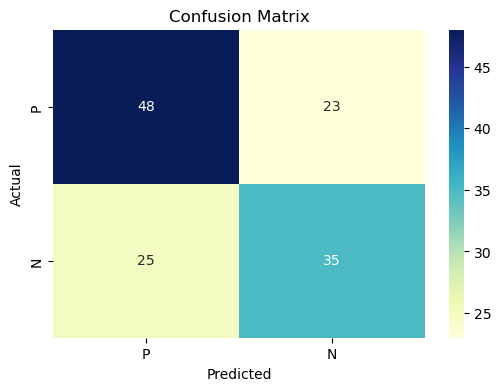


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 200
Accuracy: 63.36 %
              precision    recall  f1-score   support

           N       0.66      0.68      0.67        71
           P       0.60      0.58      0.59        60

    accuracy                           0.63       131
   macro avg       0.63      0.63      0.63       131
weighted avg       0.63      0.63      0.63       131



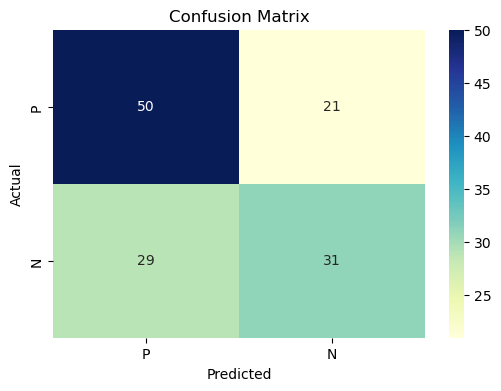


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 500
Accuracy: 61.83 %
              precision    recall  f1-score   support

           N       0.63      0.70      0.67        71
           P       0.60      0.52      0.55        60

    accuracy                           0.62       131
   macro avg       0.61      0.61      0.61       131
weighted avg       0.62      0.62      0.61       131



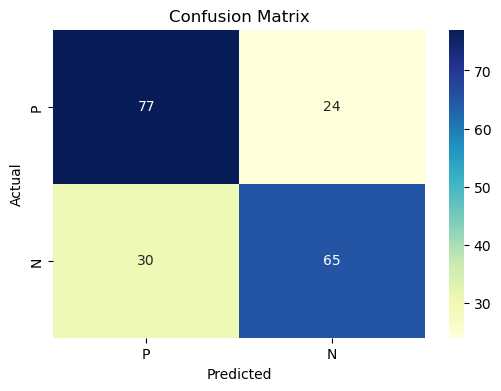


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 15
Accuracy: 72.45 %
              precision    recall  f1-score   support

           N       0.72      0.76      0.74       101
           P       0.73      0.68      0.71        95

    accuracy                           0.72       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.72      0.72      0.72       196



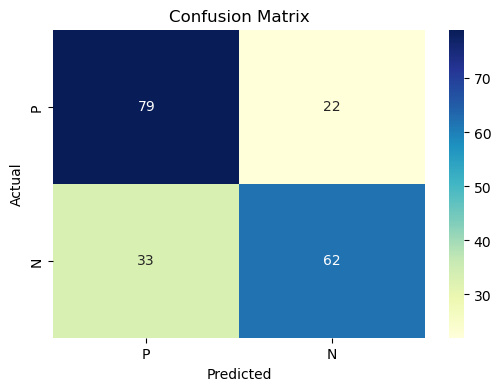


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 20
Accuracy: 71.94 %
              precision    recall  f1-score   support

           N       0.71      0.78      0.74       101
           P       0.74      0.65      0.69        95

    accuracy                           0.72       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.72      0.72      0.72       196



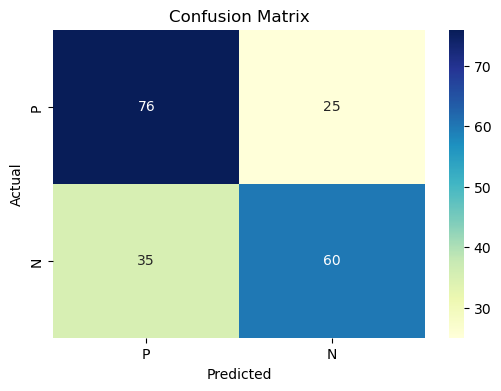


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 30
Accuracy: 69.39 %
              precision    recall  f1-score   support

           N       0.68      0.75      0.72       101
           P       0.71      0.63      0.67        95

    accuracy                           0.69       196
   macro avg       0.70      0.69      0.69       196
weighted avg       0.69      0.69      0.69       196



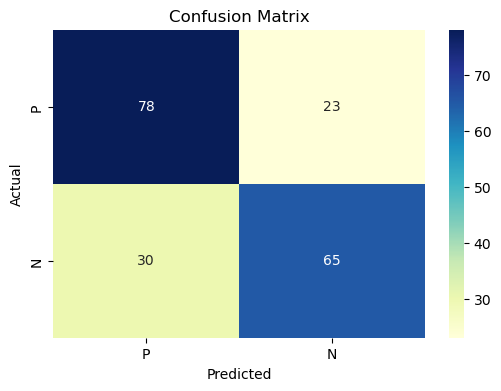


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 50
Accuracy: 72.96 %
              precision    recall  f1-score   support

           N       0.72      0.77      0.75       101
           P       0.74      0.68      0.71        95

    accuracy                           0.73       196
   macro avg       0.73      0.73      0.73       196
weighted avg       0.73      0.73      0.73       196



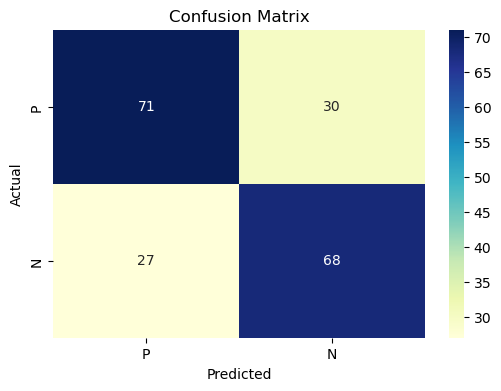


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 100
Accuracy: 70.92 %
              precision    recall  f1-score   support

           N       0.72      0.70      0.71       101
           P       0.69      0.72      0.70        95

    accuracy                           0.71       196
   macro avg       0.71      0.71      0.71       196
weighted avg       0.71      0.71      0.71       196



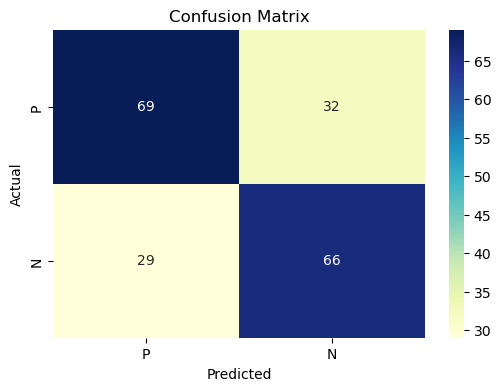


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 200
Accuracy: 68.88 %
              precision    recall  f1-score   support

           N       0.70      0.68      0.69       101
           P       0.67      0.69      0.68        95

    accuracy                           0.69       196
   macro avg       0.69      0.69      0.69       196
weighted avg       0.69      0.69      0.69       196



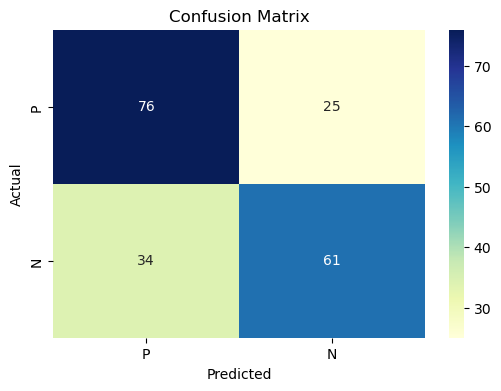


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 500
Accuracy: 69.9 %
              precision    recall  f1-score   support

           N       0.69      0.75      0.72       101
           P       0.71      0.64      0.67        95

    accuracy                           0.70       196
   macro avg       0.70      0.70      0.70       196
weighted avg       0.70      0.70      0.70       196



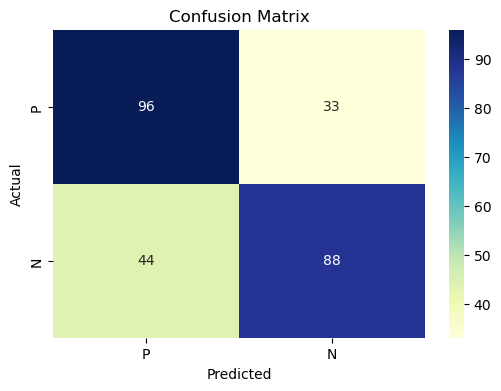


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 15
Accuracy: 70.5 %
              precision    recall  f1-score   support

           N       0.69      0.74      0.71       129
           P       0.73      0.67      0.70       132

    accuracy                           0.70       261
   macro avg       0.71      0.71      0.70       261
weighted avg       0.71      0.70      0.70       261



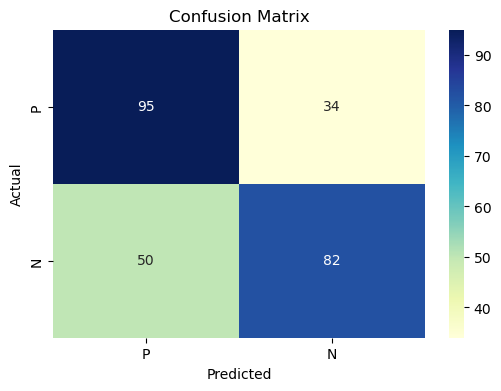


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 20
Accuracy: 67.82 %
              precision    recall  f1-score   support

           N       0.66      0.74      0.69       129
           P       0.71      0.62      0.66       132

    accuracy                           0.68       261
   macro avg       0.68      0.68      0.68       261
weighted avg       0.68      0.68      0.68       261



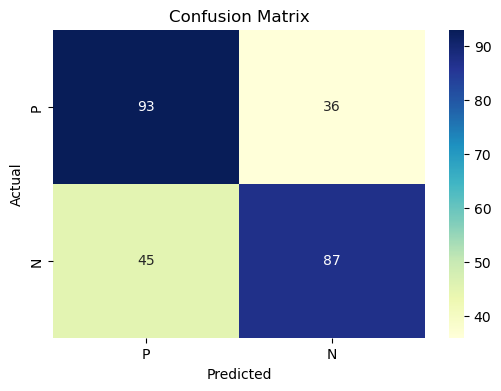


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 30
Accuracy: 68.97 %
              precision    recall  f1-score   support

           N       0.67      0.72      0.70       129
           P       0.71      0.66      0.68       132

    accuracy                           0.69       261
   macro avg       0.69      0.69      0.69       261
weighted avg       0.69      0.69      0.69       261



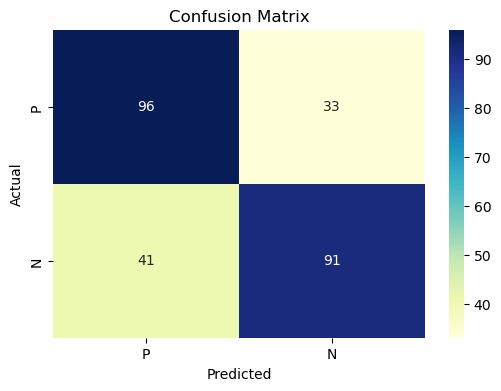


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 50
Accuracy: 71.65 %
              precision    recall  f1-score   support

           N       0.70      0.74      0.72       129
           P       0.73      0.69      0.71       132

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



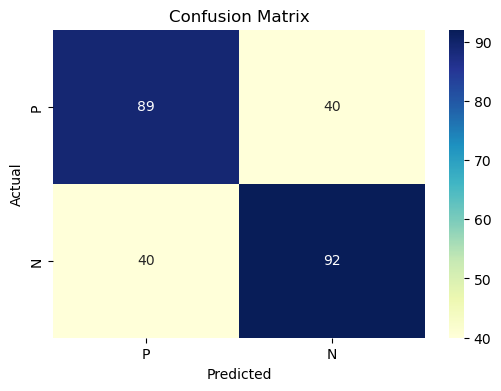


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 100
Accuracy: 69.35 %
              precision    recall  f1-score   support

           N       0.69      0.69      0.69       129
           P       0.70      0.70      0.70       132

    accuracy                           0.69       261
   macro avg       0.69      0.69      0.69       261
weighted avg       0.69      0.69      0.69       261



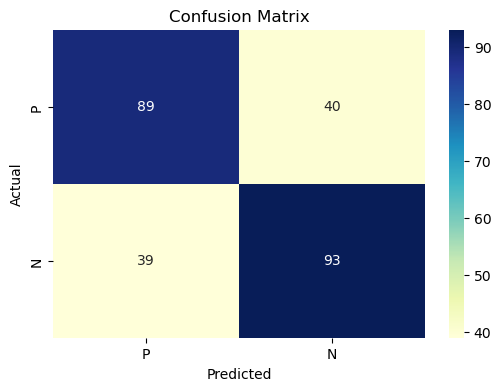


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 200
Accuracy: 69.73 %
              precision    recall  f1-score   support

           N       0.70      0.69      0.69       129
           P       0.70      0.70      0.70       132

    accuracy                           0.70       261
   macro avg       0.70      0.70      0.70       261
weighted avg       0.70      0.70      0.70       261



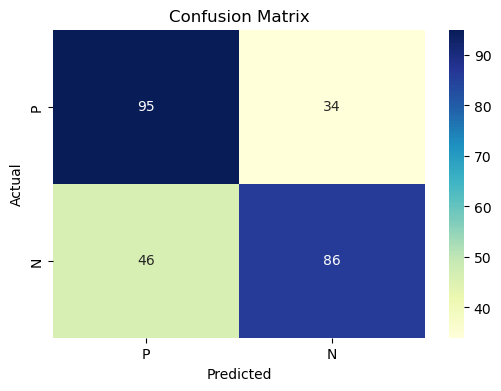


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 500
Accuracy: 69.35 %
              precision    recall  f1-score   support

           N       0.67      0.74      0.70       129
           P       0.72      0.65      0.68       132

    accuracy                           0.69       261
   macro avg       0.70      0.69      0.69       261
weighted avg       0.70      0.69      0.69       261



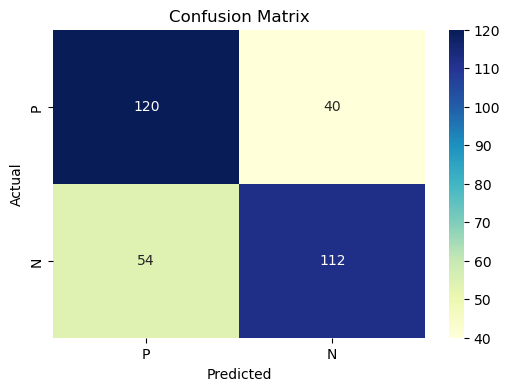


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 15
Accuracy: 71.17 %
              precision    recall  f1-score   support

           N       0.69      0.75      0.72       160
           P       0.74      0.67      0.70       166

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.71       326
weighted avg       0.71      0.71      0.71       326



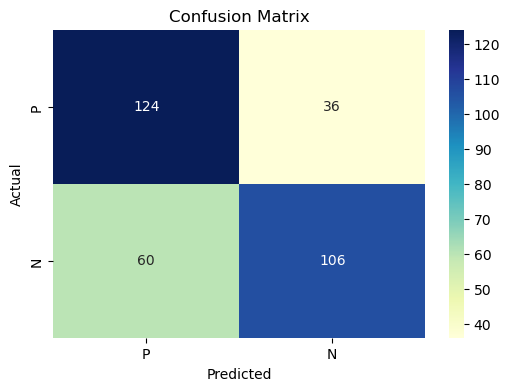


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 20
Accuracy: 70.55 %
              precision    recall  f1-score   support

           N       0.67      0.78      0.72       160
           P       0.75      0.64      0.69       166

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.70       326
weighted avg       0.71      0.71      0.70       326



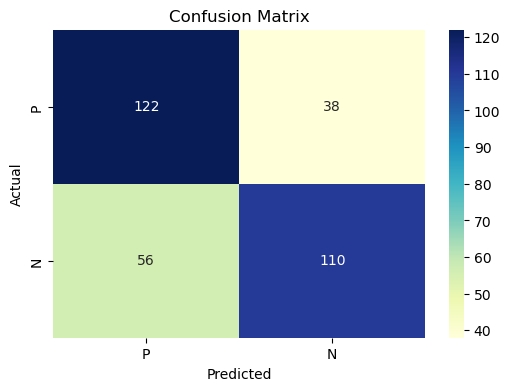


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 30
Accuracy: 71.17 %
              precision    recall  f1-score   support

           N       0.69      0.76      0.72       160
           P       0.74      0.66      0.70       166

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.71       326
weighted avg       0.71      0.71      0.71       326



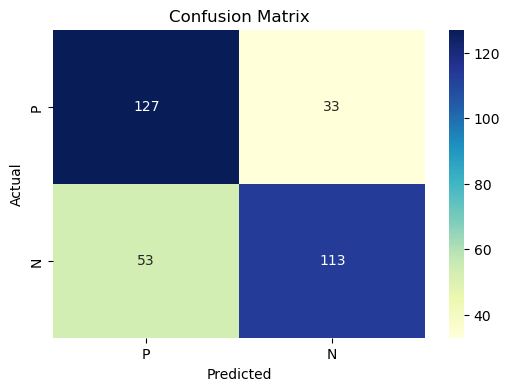


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 50
Accuracy: 73.62 %
              precision    recall  f1-score   support

           N       0.71      0.79      0.75       160
           P       0.77      0.68      0.72       166

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



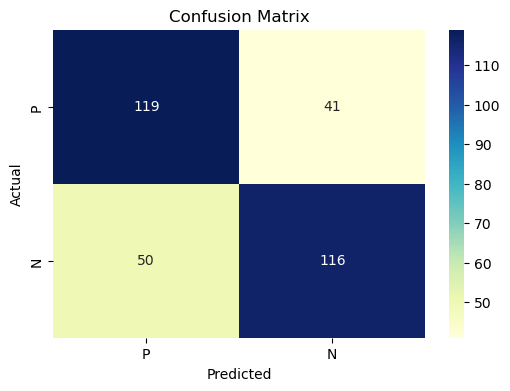


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 100
Accuracy: 72.09 %
              precision    recall  f1-score   support

           N       0.70      0.74      0.72       160
           P       0.74      0.70      0.72       166

    accuracy                           0.72       326
   macro avg       0.72      0.72      0.72       326
weighted avg       0.72      0.72      0.72       326



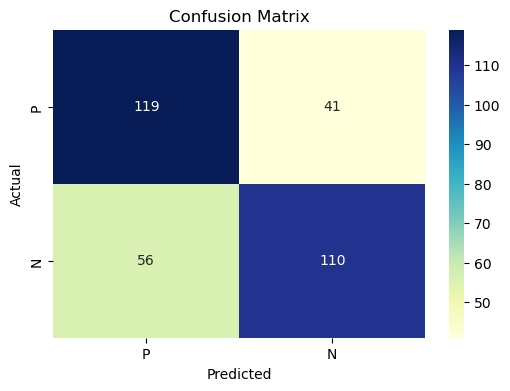


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 200
Accuracy: 70.25 %
              precision    recall  f1-score   support

           N       0.68      0.74      0.71       160
           P       0.73      0.66      0.69       166

    accuracy                           0.70       326
   macro avg       0.70      0.70      0.70       326
weighted avg       0.70      0.70      0.70       326



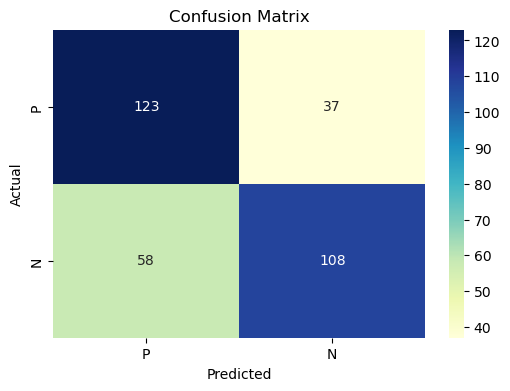


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 500
Accuracy: 70.86 %
              precision    recall  f1-score   support

           N       0.68      0.77      0.72       160
           P       0.74      0.65      0.69       166

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.71       326
weighted avg       0.71      0.71      0.71       326



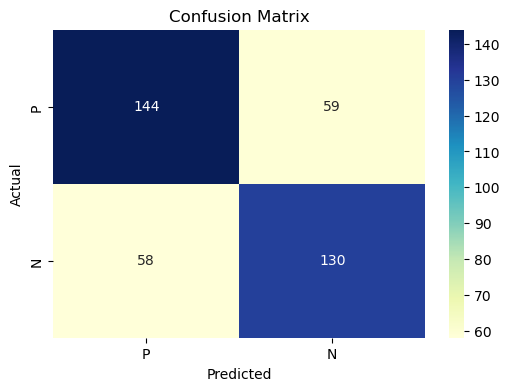


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 15
Accuracy: 70.08 %
              precision    recall  f1-score   support

           N       0.71      0.71      0.71       203
           P       0.69      0.69      0.69       188

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



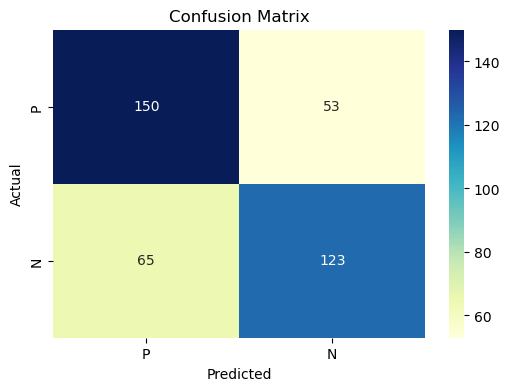


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 20
Accuracy: 69.82 %
              precision    recall  f1-score   support

           N       0.70      0.74      0.72       203
           P       0.70      0.65      0.68       188

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



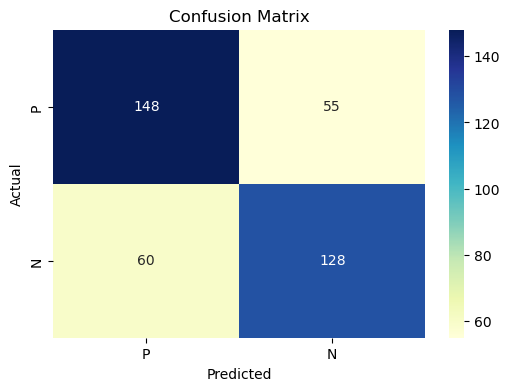


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 30
Accuracy: 70.59 %
              precision    recall  f1-score   support

           N       0.71      0.73      0.72       203
           P       0.70      0.68      0.69       188

    accuracy                           0.71       391
   macro avg       0.71      0.70      0.71       391
weighted avg       0.71      0.71      0.71       391



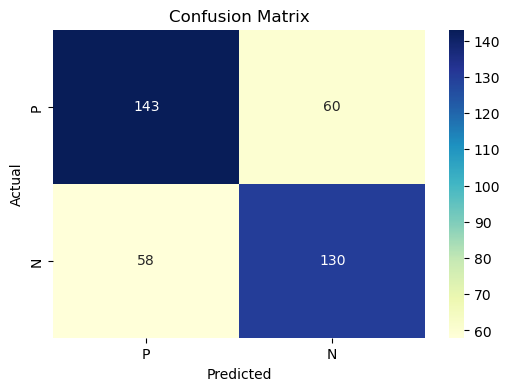


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 50
Accuracy: 69.82 %
              precision    recall  f1-score   support

           N       0.71      0.70      0.71       203
           P       0.68      0.69      0.69       188

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



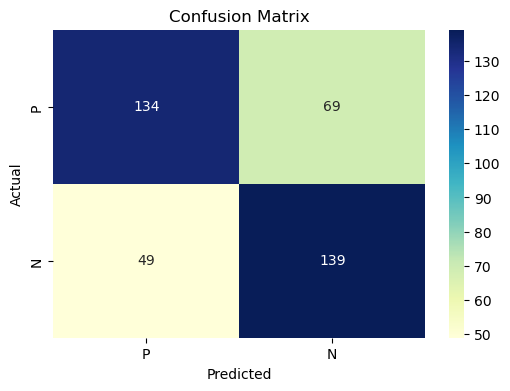


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 100
Accuracy: 69.82 %
              precision    recall  f1-score   support

           N       0.73      0.66      0.69       203
           P       0.67      0.74      0.70       188

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



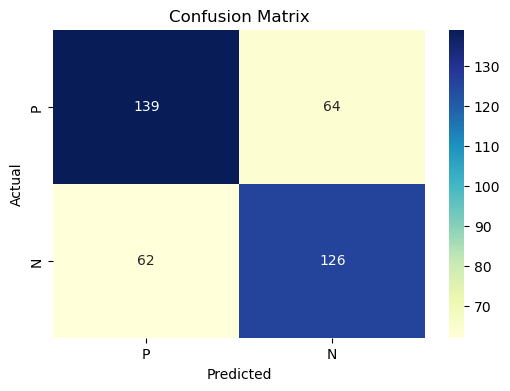


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 200
Accuracy: 67.77 %
              precision    recall  f1-score   support

           N       0.69      0.68      0.69       203
           P       0.66      0.67      0.67       188

    accuracy                           0.68       391
   macro avg       0.68      0.68      0.68       391
weighted avg       0.68      0.68      0.68       391



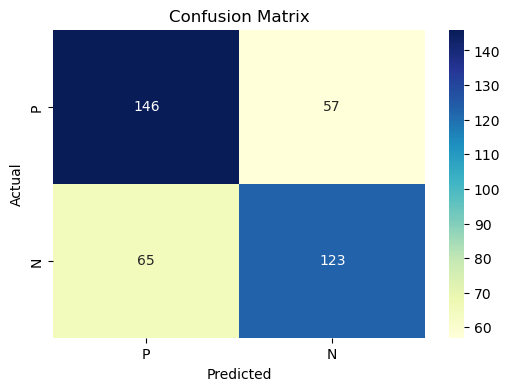


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 500
Accuracy: 68.8 %
              precision    recall  f1-score   support

           N       0.69      0.72      0.71       203
           P       0.68      0.65      0.67       188

    accuracy                           0.69       391
   macro avg       0.69      0.69      0.69       391
weighted avg       0.69      0.69      0.69       391


Best Results:
{'test_size': 0.25, 'neighbors': 50, 'accuracy': 0.7361963190184049, 'precision': 0.7403936838763294, 'recall': 0.7361963190184049, 'f1_score': 0.7355000046266738}


In [77]:
## age = value to be predicted = y
## the rest of the dataset = X

X = new_df.drop(['binaryClass'], axis = 1)
y = new_df['binaryClass']

test_size = [0.1, 0.15, 0.2, 0.25, 0.3]
neighbours = [15, 20, 30, 50, 100, 200, 500]  

best_results = {
                'test_size': None,
                'neighbors': None,
                'accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1_score': 0
                }


for s in test_size:
    for n in neighbours:


        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, random_state = 17)
        
        scaler = StandardScaler()
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize the KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors = n)

        # Fit the classifier on the training data
        knn_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict = True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = s
            best_results['neighbors'] = n
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']

        # Print Confusion Matrix 
        plt.figure(figsize = (6, 4))
        sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels = y.unique(), yticklabels = y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nKNN Classifier Performance:")
        print(f"Test Size = {s} and Neighbours = {n}")
        print(f"Accuracy: {round(100 *(accuracy), 2)} %")
        print(classification_report(y_test, y_pred))
        
# Print the best results
print("\nBest Results:")
print(best_results)

### MinMaxScaler

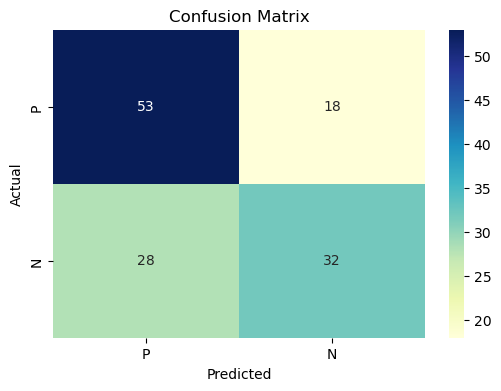


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 15
Accuracy: 64.89 %
              precision    recall  f1-score   support

           N       0.65      0.75      0.70        71
           P       0.64      0.53      0.58        60

    accuracy                           0.65       131
   macro avg       0.65      0.64      0.64       131
weighted avg       0.65      0.65      0.64       131



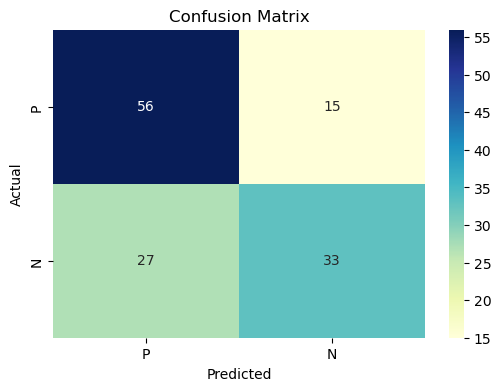


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 20
Accuracy: 67.94 %
              precision    recall  f1-score   support

           N       0.67      0.79      0.73        71
           P       0.69      0.55      0.61        60

    accuracy                           0.68       131
   macro avg       0.68      0.67      0.67       131
weighted avg       0.68      0.68      0.67       131



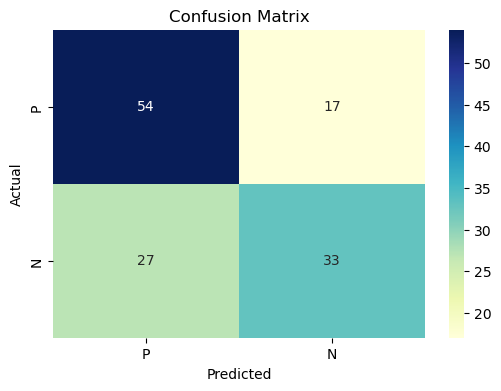


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 30
Accuracy: 66.41 %
              precision    recall  f1-score   support

           N       0.67      0.76      0.71        71
           P       0.66      0.55      0.60        60

    accuracy                           0.66       131
   macro avg       0.66      0.66      0.66       131
weighted avg       0.66      0.66      0.66       131



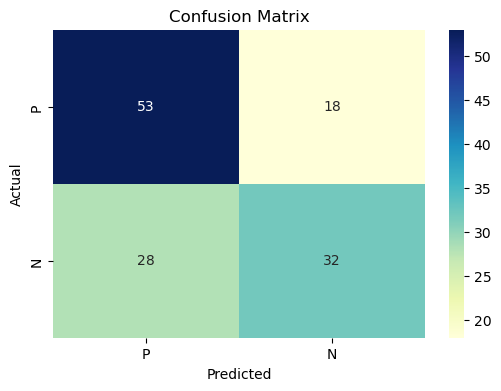


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 50
Accuracy: 64.89 %
              precision    recall  f1-score   support

           N       0.65      0.75      0.70        71
           P       0.64      0.53      0.58        60

    accuracy                           0.65       131
   macro avg       0.65      0.64      0.64       131
weighted avg       0.65      0.65      0.64       131



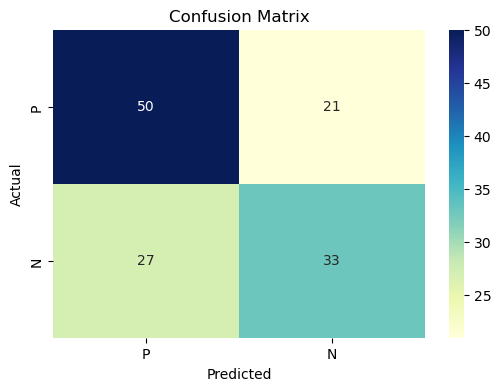


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 100
Accuracy: 63.36 %
              precision    recall  f1-score   support

           N       0.65      0.70      0.68        71
           P       0.61      0.55      0.58        60

    accuracy                           0.63       131
   macro avg       0.63      0.63      0.63       131
weighted avg       0.63      0.63      0.63       131



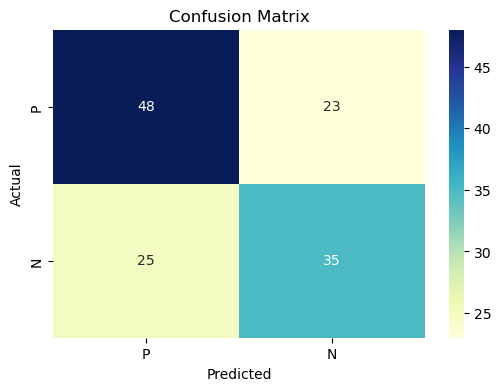


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 200
Accuracy: 63.36 %
              precision    recall  f1-score   support

           N       0.66      0.68      0.67        71
           P       0.60      0.58      0.59        60

    accuracy                           0.63       131
   macro avg       0.63      0.63      0.63       131
weighted avg       0.63      0.63      0.63       131



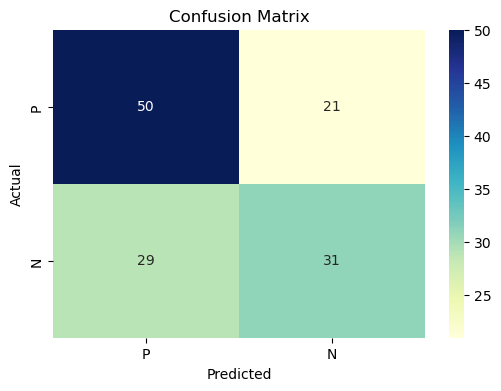


KNN Classifier Performance:
Test Size = 0.1 and Neighbours = 500
Accuracy: 61.83 %
              precision    recall  f1-score   support

           N       0.63      0.70      0.67        71
           P       0.60      0.52      0.55        60

    accuracy                           0.62       131
   macro avg       0.61      0.61      0.61       131
weighted avg       0.62      0.62      0.61       131



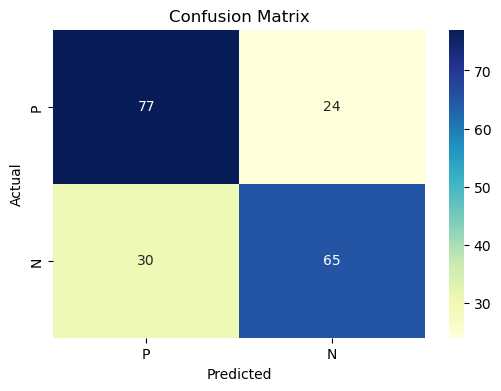


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 15
Accuracy: 72.45 %
              precision    recall  f1-score   support

           N       0.72      0.76      0.74       101
           P       0.73      0.68      0.71        95

    accuracy                           0.72       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.72      0.72      0.72       196



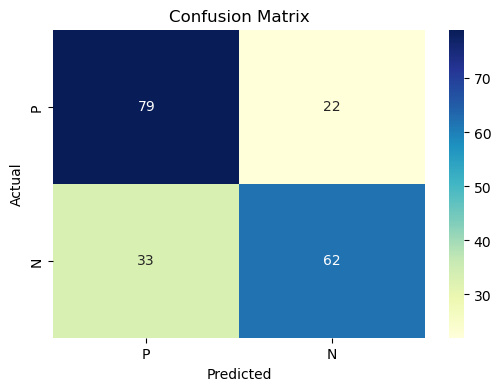


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 20
Accuracy: 71.94 %
              precision    recall  f1-score   support

           N       0.71      0.78      0.74       101
           P       0.74      0.65      0.69        95

    accuracy                           0.72       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.72      0.72      0.72       196



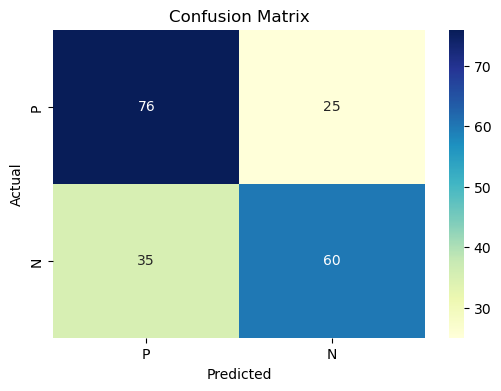


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 30
Accuracy: 69.39 %
              precision    recall  f1-score   support

           N       0.68      0.75      0.72       101
           P       0.71      0.63      0.67        95

    accuracy                           0.69       196
   macro avg       0.70      0.69      0.69       196
weighted avg       0.69      0.69      0.69       196



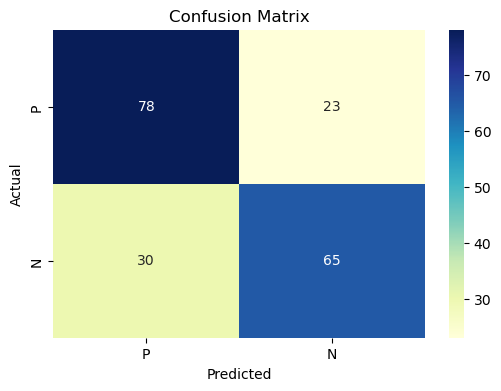


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 50
Accuracy: 72.96 %
              precision    recall  f1-score   support

           N       0.72      0.77      0.75       101
           P       0.74      0.68      0.71        95

    accuracy                           0.73       196
   macro avg       0.73      0.73      0.73       196
weighted avg       0.73      0.73      0.73       196



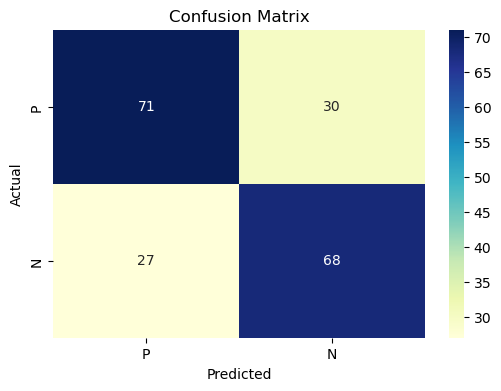


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 100
Accuracy: 70.92 %
              precision    recall  f1-score   support

           N       0.72      0.70      0.71       101
           P       0.69      0.72      0.70        95

    accuracy                           0.71       196
   macro avg       0.71      0.71      0.71       196
weighted avg       0.71      0.71      0.71       196



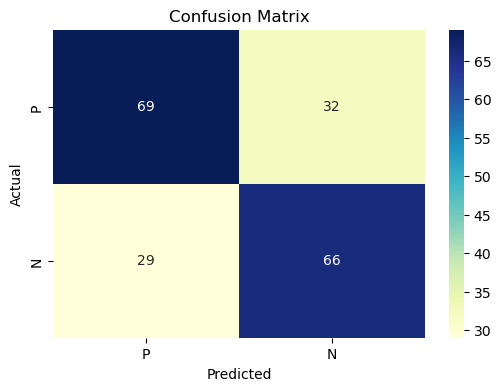


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 200
Accuracy: 68.88 %
              precision    recall  f1-score   support

           N       0.70      0.68      0.69       101
           P       0.67      0.69      0.68        95

    accuracy                           0.69       196
   macro avg       0.69      0.69      0.69       196
weighted avg       0.69      0.69      0.69       196



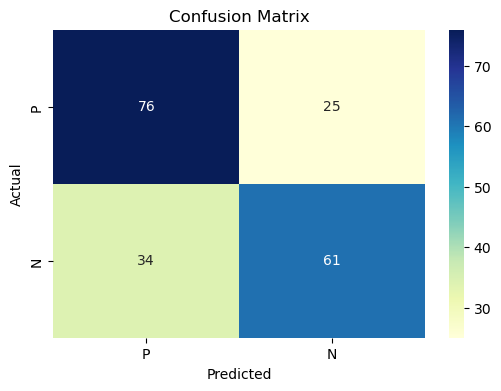


KNN Classifier Performance:
Test Size = 0.15 and Neighbours = 500
Accuracy: 69.9 %
              precision    recall  f1-score   support

           N       0.69      0.75      0.72       101
           P       0.71      0.64      0.67        95

    accuracy                           0.70       196
   macro avg       0.70      0.70      0.70       196
weighted avg       0.70      0.70      0.70       196



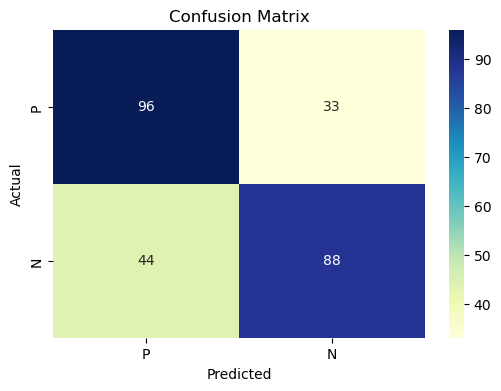


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 15
Accuracy: 70.5 %
              precision    recall  f1-score   support

           N       0.69      0.74      0.71       129
           P       0.73      0.67      0.70       132

    accuracy                           0.70       261
   macro avg       0.71      0.71      0.70       261
weighted avg       0.71      0.70      0.70       261



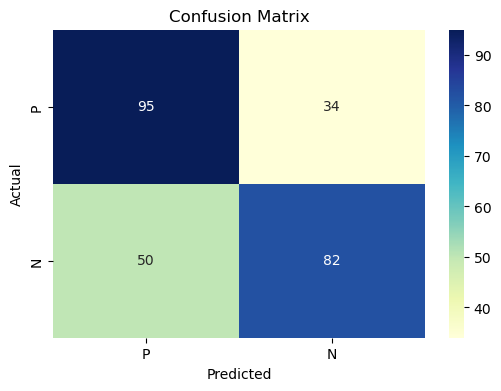


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 20
Accuracy: 67.82 %
              precision    recall  f1-score   support

           N       0.66      0.74      0.69       129
           P       0.71      0.62      0.66       132

    accuracy                           0.68       261
   macro avg       0.68      0.68      0.68       261
weighted avg       0.68      0.68      0.68       261



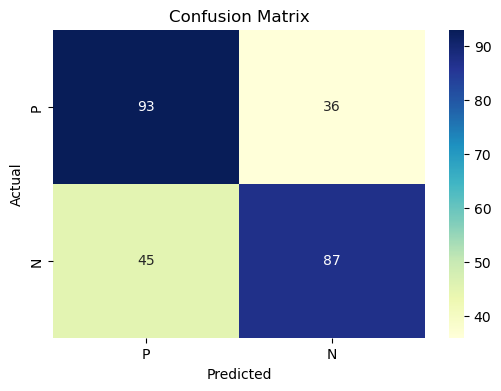


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 30
Accuracy: 68.97 %
              precision    recall  f1-score   support

           N       0.67      0.72      0.70       129
           P       0.71      0.66      0.68       132

    accuracy                           0.69       261
   macro avg       0.69      0.69      0.69       261
weighted avg       0.69      0.69      0.69       261



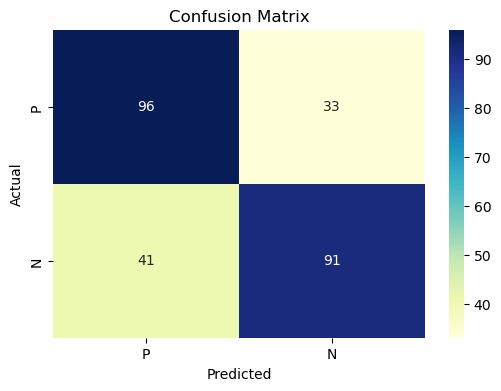


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 50
Accuracy: 71.65 %
              precision    recall  f1-score   support

           N       0.70      0.74      0.72       129
           P       0.73      0.69      0.71       132

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



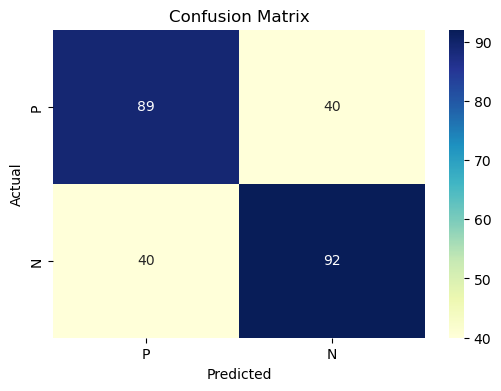


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 100
Accuracy: 69.35 %
              precision    recall  f1-score   support

           N       0.69      0.69      0.69       129
           P       0.70      0.70      0.70       132

    accuracy                           0.69       261
   macro avg       0.69      0.69      0.69       261
weighted avg       0.69      0.69      0.69       261



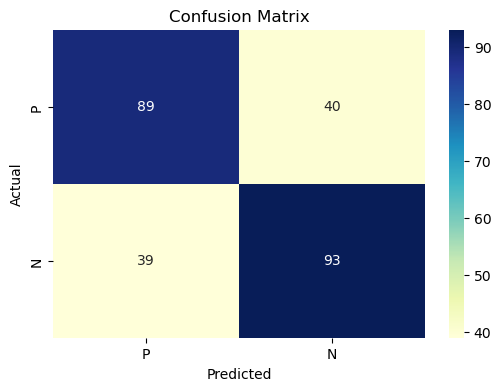


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 200
Accuracy: 69.73 %
              precision    recall  f1-score   support

           N       0.70      0.69      0.69       129
           P       0.70      0.70      0.70       132

    accuracy                           0.70       261
   macro avg       0.70      0.70      0.70       261
weighted avg       0.70      0.70      0.70       261



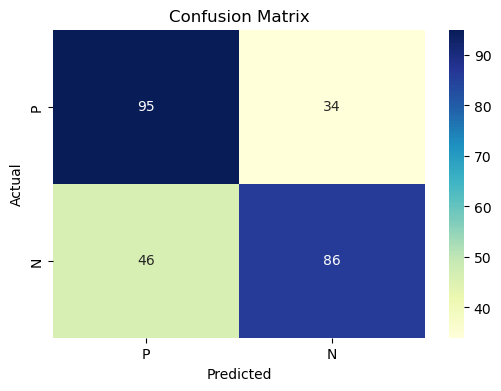


KNN Classifier Performance:
Test Size = 0.2 and Neighbours = 500
Accuracy: 69.35 %
              precision    recall  f1-score   support

           N       0.67      0.74      0.70       129
           P       0.72      0.65      0.68       132

    accuracy                           0.69       261
   macro avg       0.70      0.69      0.69       261
weighted avg       0.70      0.69      0.69       261



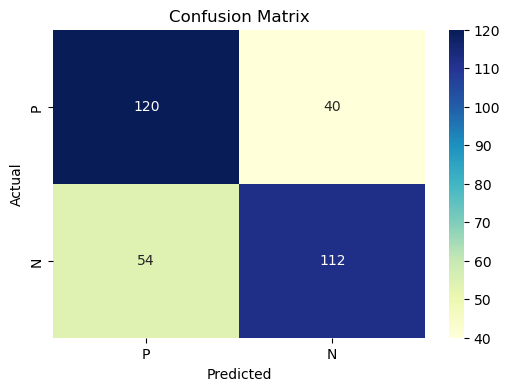


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 15
Accuracy: 71.17 %
              precision    recall  f1-score   support

           N       0.69      0.75      0.72       160
           P       0.74      0.67      0.70       166

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.71       326
weighted avg       0.71      0.71      0.71       326



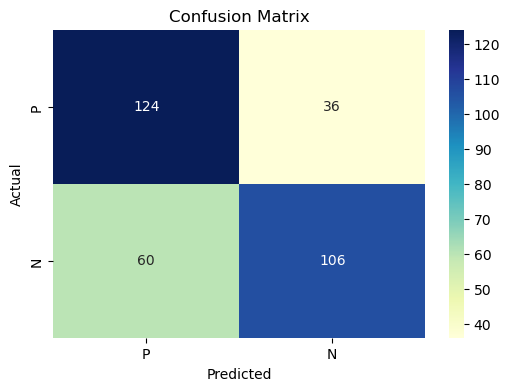


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 20
Accuracy: 70.55 %
              precision    recall  f1-score   support

           N       0.67      0.78      0.72       160
           P       0.75      0.64      0.69       166

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.70       326
weighted avg       0.71      0.71      0.70       326



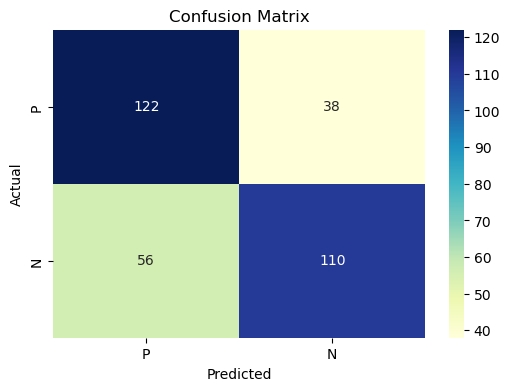


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 30
Accuracy: 71.17 %
              precision    recall  f1-score   support

           N       0.69      0.76      0.72       160
           P       0.74      0.66      0.70       166

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.71       326
weighted avg       0.71      0.71      0.71       326



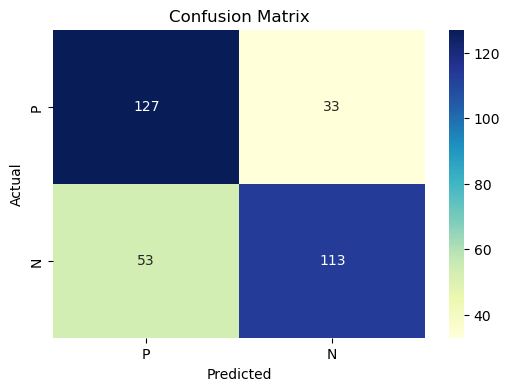


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 50
Accuracy: 73.62 %
              precision    recall  f1-score   support

           N       0.71      0.79      0.75       160
           P       0.77      0.68      0.72       166

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



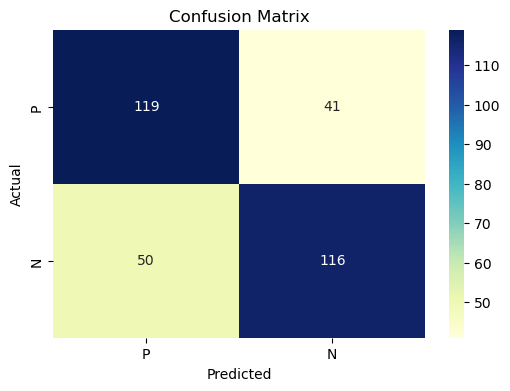


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 100
Accuracy: 72.09 %
              precision    recall  f1-score   support

           N       0.70      0.74      0.72       160
           P       0.74      0.70      0.72       166

    accuracy                           0.72       326
   macro avg       0.72      0.72      0.72       326
weighted avg       0.72      0.72      0.72       326



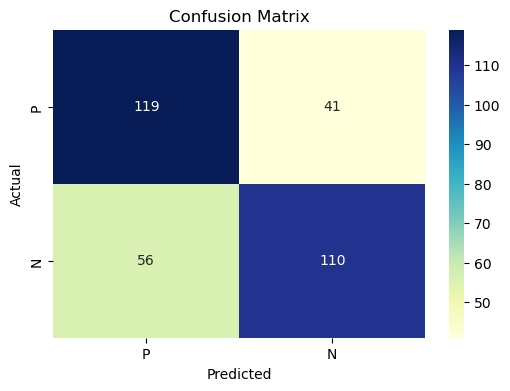


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 200
Accuracy: 70.25 %
              precision    recall  f1-score   support

           N       0.68      0.74      0.71       160
           P       0.73      0.66      0.69       166

    accuracy                           0.70       326
   macro avg       0.70      0.70      0.70       326
weighted avg       0.70      0.70      0.70       326



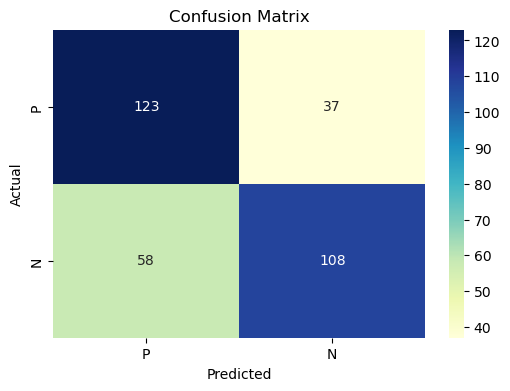


KNN Classifier Performance:
Test Size = 0.25 and Neighbours = 500
Accuracy: 70.86 %
              precision    recall  f1-score   support

           N       0.68      0.77      0.72       160
           P       0.74      0.65      0.69       166

    accuracy                           0.71       326
   macro avg       0.71      0.71      0.71       326
weighted avg       0.71      0.71      0.71       326



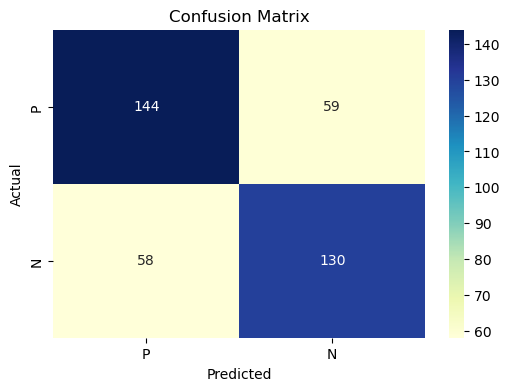


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 15
Accuracy: 70.08 %
              precision    recall  f1-score   support

           N       0.71      0.71      0.71       203
           P       0.69      0.69      0.69       188

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



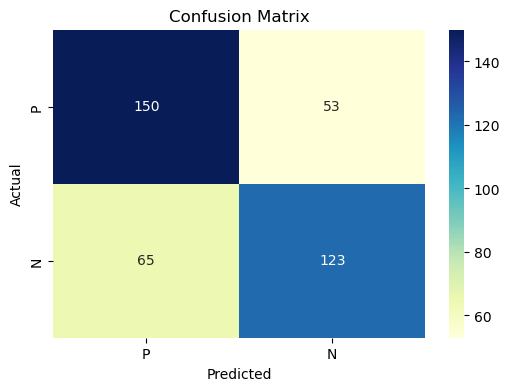


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 20
Accuracy: 69.82 %
              precision    recall  f1-score   support

           N       0.70      0.74      0.72       203
           P       0.70      0.65      0.68       188

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



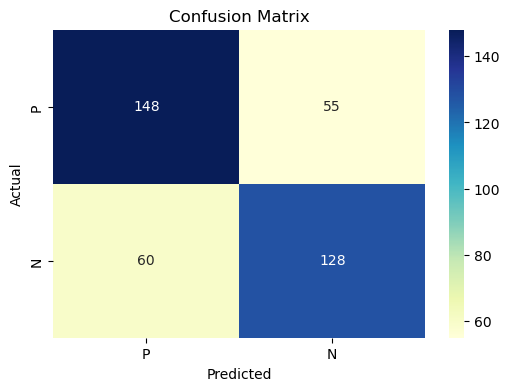


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 30
Accuracy: 70.59 %
              precision    recall  f1-score   support

           N       0.71      0.73      0.72       203
           P       0.70      0.68      0.69       188

    accuracy                           0.71       391
   macro avg       0.71      0.70      0.71       391
weighted avg       0.71      0.71      0.71       391



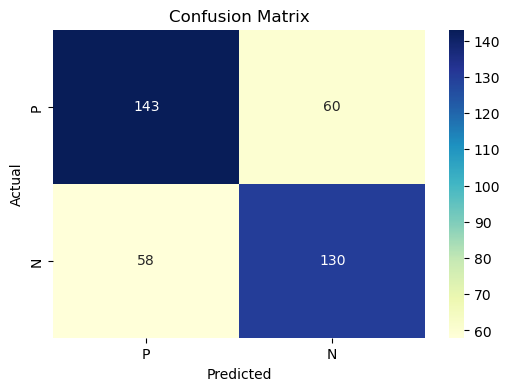


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 50
Accuracy: 69.82 %
              precision    recall  f1-score   support

           N       0.71      0.70      0.71       203
           P       0.68      0.69      0.69       188

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



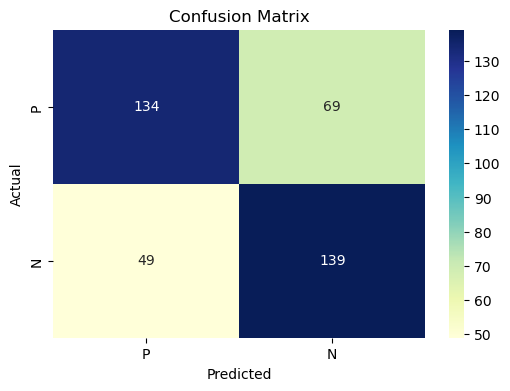


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 100
Accuracy: 69.82 %
              precision    recall  f1-score   support

           N       0.73      0.66      0.69       203
           P       0.67      0.74      0.70       188

    accuracy                           0.70       391
   macro avg       0.70      0.70      0.70       391
weighted avg       0.70      0.70      0.70       391



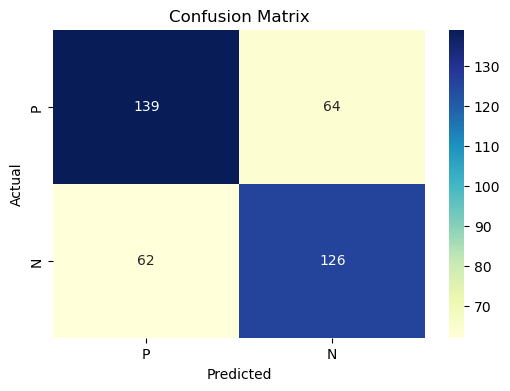


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 200
Accuracy: 67.77 %
              precision    recall  f1-score   support

           N       0.69      0.68      0.69       203
           P       0.66      0.67      0.67       188

    accuracy                           0.68       391
   macro avg       0.68      0.68      0.68       391
weighted avg       0.68      0.68      0.68       391



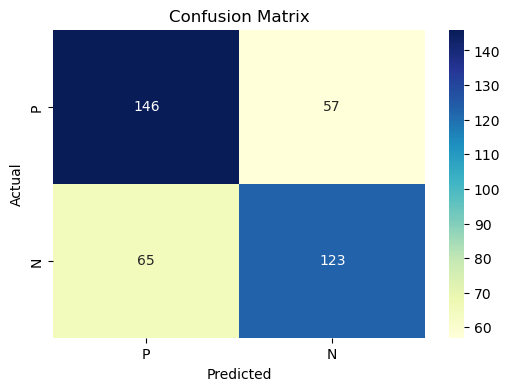


KNN Classifier Performance:
Test Size = 0.3 and Neighbours = 500
Accuracy: 68.8 %
              precision    recall  f1-score   support

           N       0.69      0.72      0.71       203
           P       0.68      0.65      0.67       188

    accuracy                           0.69       391
   macro avg       0.69      0.69      0.69       391
weighted avg       0.69      0.69      0.69       391


Best Results:
{'test_size': 0.25, 'neighbors': 50, 'accuracy': 0.7361963190184049, 'precision': 0.7403936838763294, 'recall': 0.7361963190184049, 'f1_score': 0.7355000046266738}


In [80]:
## age = value to be predicted = y
## the rest of the dataset = X

X = new_df.drop(['binaryClass'], axis = 1)
y = new_df['binaryClass']

test_size = [0.1, 0.15, 0.2, 0.25, 0.3]
neighbours = [15, 20, 30, 50, 100, 200, 500]  

best_results = {
                'test_size': None,
                'neighbors': None,
                'accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1_score': 0
                }


for s in test_size:
    for n in neighbours:


        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, random_state = 17)
        
        scaler = MinMaxScaler()
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize the KNN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors = n)

        # Fit the classifier on the training data
        knn_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = knn_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict = True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = s
            best_results['neighbors'] = n
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']

        # Print Confusion Matrix 
        plt.figure(figsize = (6, 4))
        sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels = y.unique(), yticklabels = y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nKNN Classifier Performance:")
        print(f"Test Size = {s} and Neighbours = {n}")
        print(f"Accuracy: {round(100 *(accuracy), 2)} %")
        print(classification_report(y_test, y_pred))
        
# Print the best results
print("\nBest Results:")
print(best_results)

## Random Forest

### StandardScaler

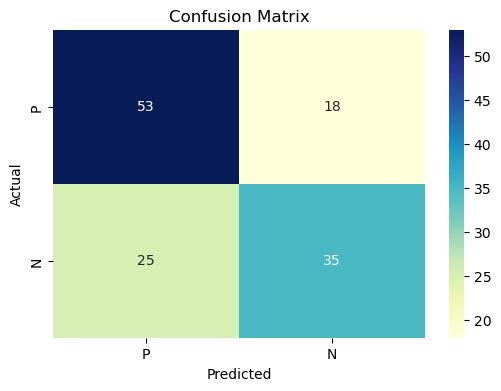


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 10
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.68      0.75      0.71        71
           P       0.66      0.58      0.62        60

    accuracy                           0.67       131
   macro avg       0.67      0.66      0.67       131
weighted avg       0.67      0.67      0.67       131



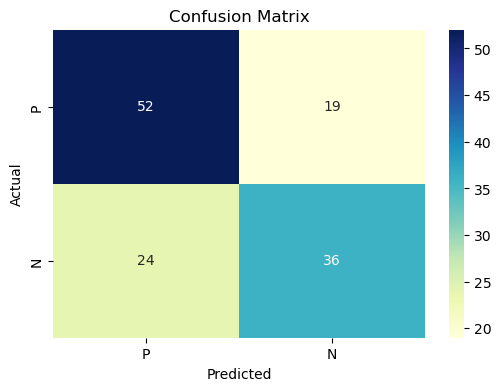


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 20
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.68      0.73      0.71        71
           P       0.65      0.60      0.63        60

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131



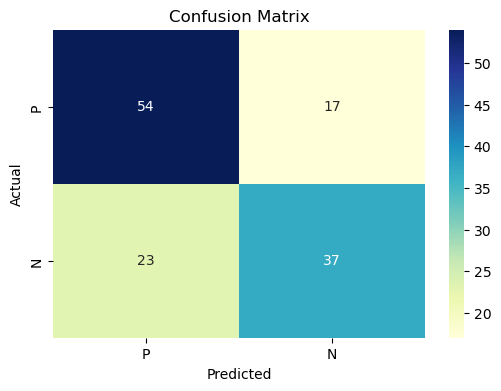


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 30
Accuracy: 69.47 %
              precision    recall  f1-score   support

           N       0.70      0.76      0.73        71
           P       0.69      0.62      0.65        60

    accuracy                           0.69       131
   macro avg       0.69      0.69      0.69       131
weighted avg       0.69      0.69      0.69       131



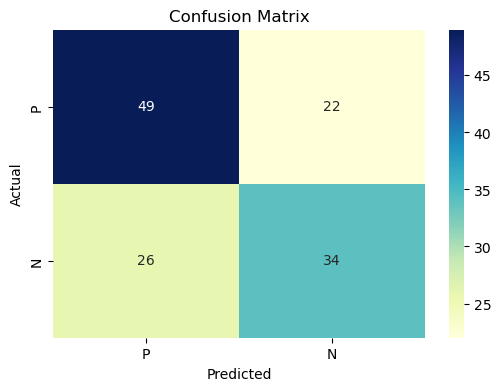


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 50
Accuracy: 63.36 %
              precision    recall  f1-score   support

           N       0.65      0.69      0.67        71
           P       0.61      0.57      0.59        60

    accuracy                           0.63       131
   macro avg       0.63      0.63      0.63       131
weighted avg       0.63      0.63      0.63       131



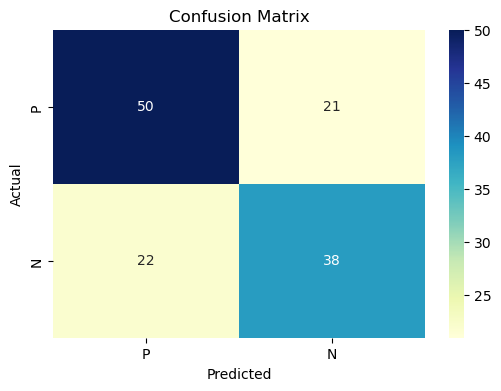


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 100
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.69      0.70      0.70        71
           P       0.64      0.63      0.64        60

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131



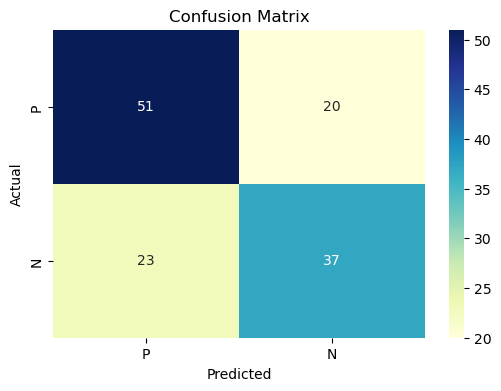


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 200
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.69      0.72      0.70        71
           P       0.65      0.62      0.63        60

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131



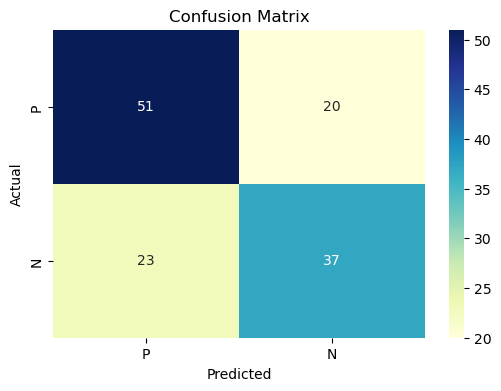


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 500
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.69      0.72      0.70        71
           P       0.65      0.62      0.63        60

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131



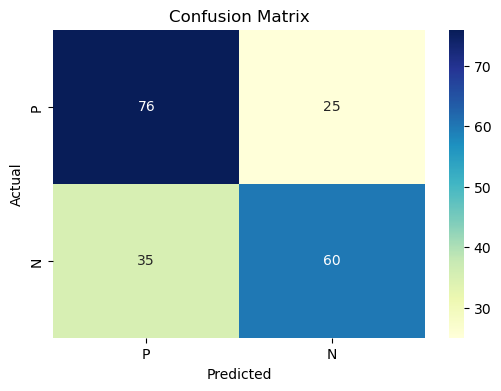


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 10
Accuracy: 69.39 %
              precision    recall  f1-score   support

           N       0.68      0.75      0.72       101
           P       0.71      0.63      0.67        95

    accuracy                           0.69       196
   macro avg       0.70      0.69      0.69       196
weighted avg       0.69      0.69      0.69       196



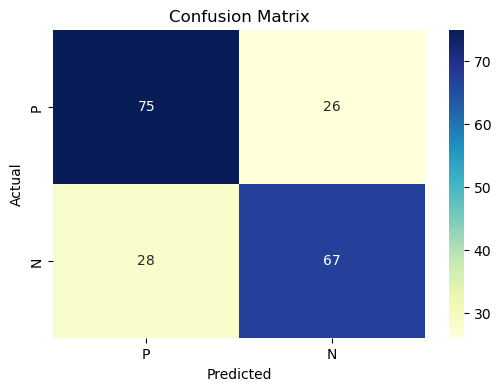


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 20
Accuracy: 72.45 %
              precision    recall  f1-score   support

           N       0.73      0.74      0.74       101
           P       0.72      0.71      0.71        95

    accuracy                           0.72       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.72      0.72      0.72       196



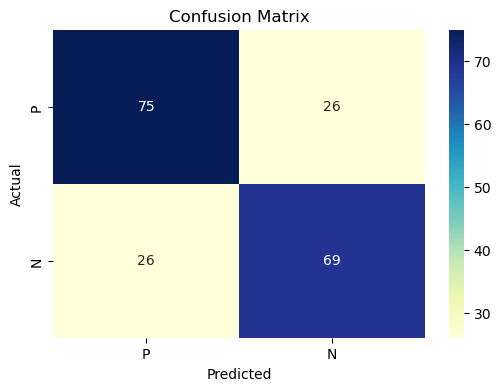


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 30
Accuracy: 73.47 %
              precision    recall  f1-score   support

           N       0.74      0.74      0.74       101
           P       0.73      0.73      0.73        95

    accuracy                           0.73       196
   macro avg       0.73      0.73      0.73       196
weighted avg       0.73      0.73      0.73       196



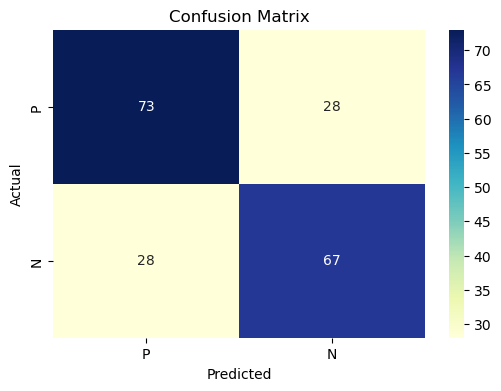


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 50
Accuracy: 71.43 %
              precision    recall  f1-score   support

           N       0.72      0.72      0.72       101
           P       0.71      0.71      0.71        95

    accuracy                           0.71       196
   macro avg       0.71      0.71      0.71       196
weighted avg       0.71      0.71      0.71       196



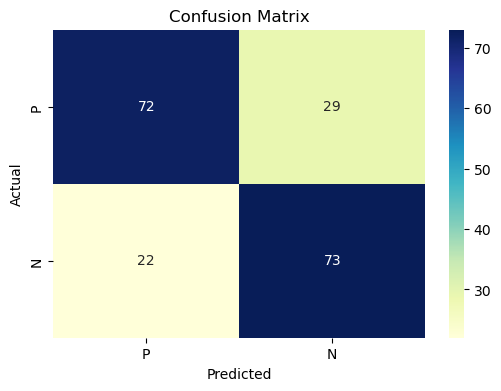


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 100
Accuracy: 73.98 %
              precision    recall  f1-score   support

           N       0.77      0.71      0.74       101
           P       0.72      0.77      0.74        95

    accuracy                           0.74       196
   macro avg       0.74      0.74      0.74       196
weighted avg       0.74      0.74      0.74       196



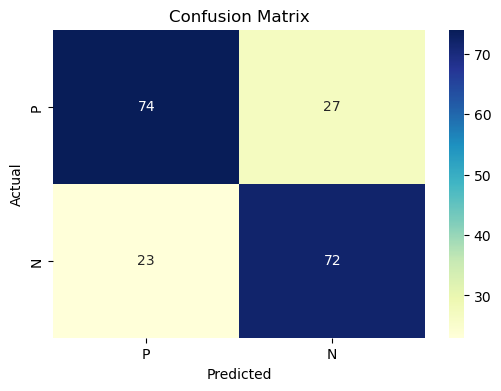


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 200
Accuracy: 74.49 %
              precision    recall  f1-score   support

           N       0.76      0.73      0.75       101
           P       0.73      0.76      0.74        95

    accuracy                           0.74       196
   macro avg       0.75      0.75      0.74       196
weighted avg       0.75      0.74      0.74       196



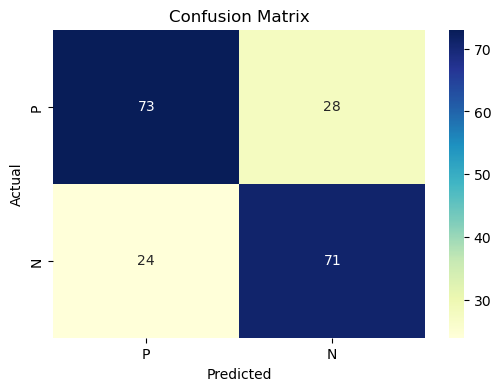


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 500
Accuracy: 73.47 %
              precision    recall  f1-score   support

           N       0.75      0.72      0.74       101
           P       0.72      0.75      0.73        95

    accuracy                           0.73       196
   macro avg       0.73      0.74      0.73       196
weighted avg       0.74      0.73      0.73       196



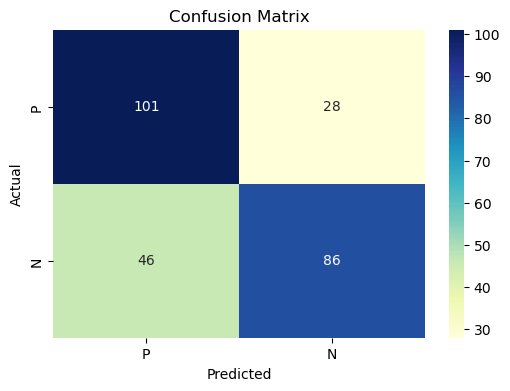


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 10
Accuracy: 71.65 %
              precision    recall  f1-score   support

           N       0.69      0.78      0.73       129
           P       0.75      0.65      0.70       132

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



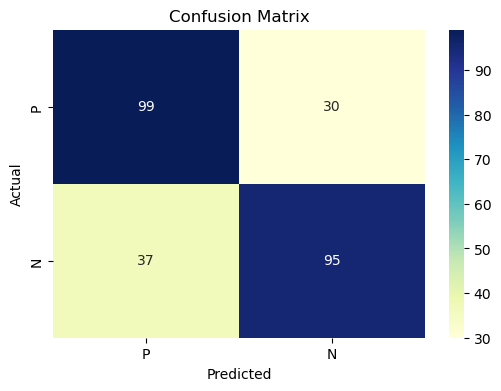


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 20
Accuracy: 74.33 %
              precision    recall  f1-score   support

           N       0.73      0.77      0.75       129
           P       0.76      0.72      0.74       132

    accuracy                           0.74       261
   macro avg       0.74      0.74      0.74       261
weighted avg       0.74      0.74      0.74       261



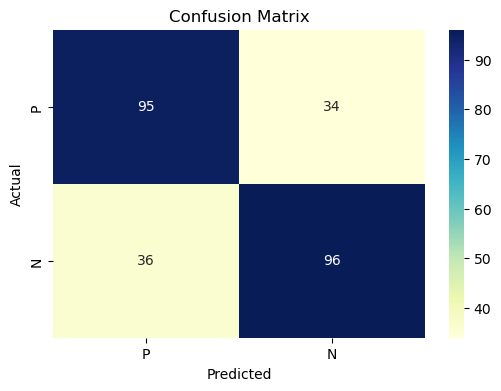


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 30
Accuracy: 73.18 %
              precision    recall  f1-score   support

           N       0.73      0.74      0.73       129
           P       0.74      0.73      0.73       132

    accuracy                           0.73       261
   macro avg       0.73      0.73      0.73       261
weighted avg       0.73      0.73      0.73       261



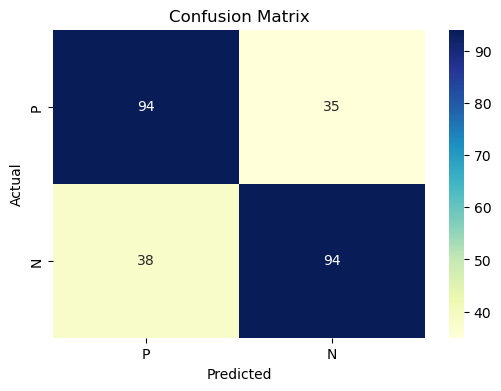


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 50
Accuracy: 72.03 %
              precision    recall  f1-score   support

           N       0.71      0.73      0.72       129
           P       0.73      0.71      0.72       132

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



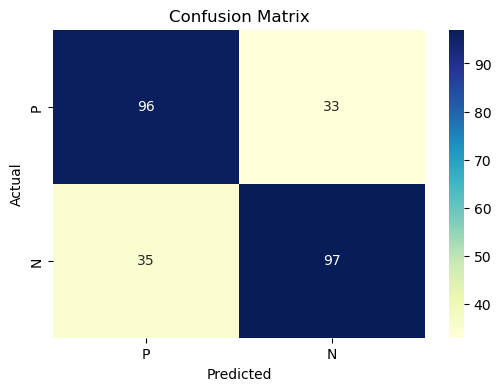


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 100
Accuracy: 73.95 %
              precision    recall  f1-score   support

           N       0.73      0.74      0.74       129
           P       0.75      0.73      0.74       132

    accuracy                           0.74       261
   macro avg       0.74      0.74      0.74       261
weighted avg       0.74      0.74      0.74       261



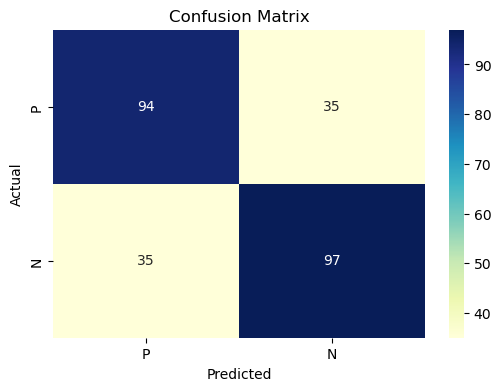


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 200
Accuracy: 73.18 %
              precision    recall  f1-score   support

           N       0.73      0.73      0.73       129
           P       0.73      0.73      0.73       132

    accuracy                           0.73       261
   macro avg       0.73      0.73      0.73       261
weighted avg       0.73      0.73      0.73       261



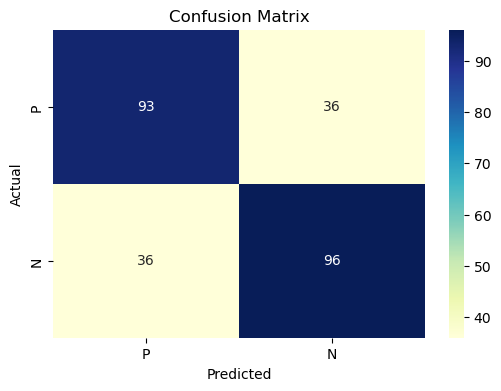


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 500
Accuracy: 72.41 %
              precision    recall  f1-score   support

           N       0.72      0.72      0.72       129
           P       0.73      0.73      0.73       132

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



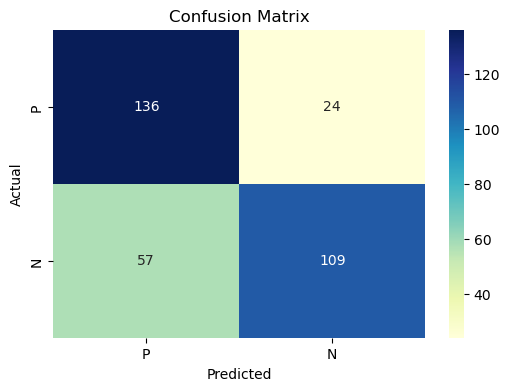


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 10
Accuracy: 75.15 %
              precision    recall  f1-score   support

           N       0.70      0.85      0.77       160
           P       0.82      0.66      0.73       166

    accuracy                           0.75       326
   macro avg       0.76      0.75      0.75       326
weighted avg       0.76      0.75      0.75       326



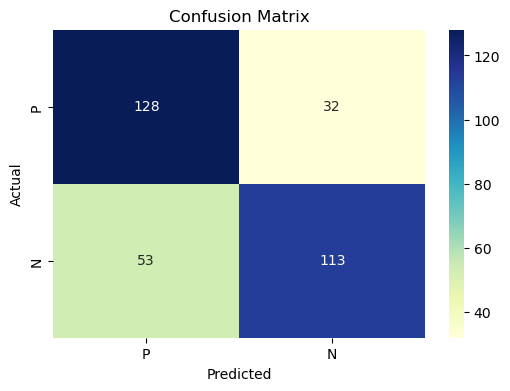


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 20
Accuracy: 73.93 %
              precision    recall  f1-score   support

           N       0.71      0.80      0.75       160
           P       0.78      0.68      0.73       166

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



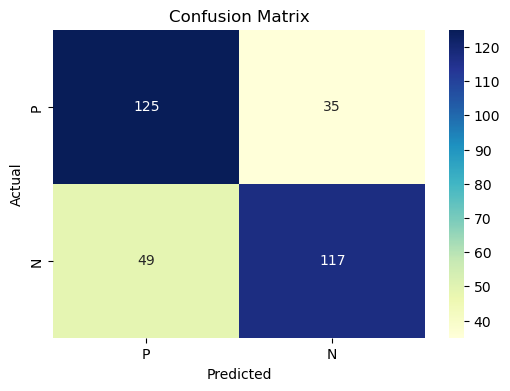


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 30
Accuracy: 74.23 %
              precision    recall  f1-score   support

           N       0.72      0.78      0.75       160
           P       0.77      0.70      0.74       166

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



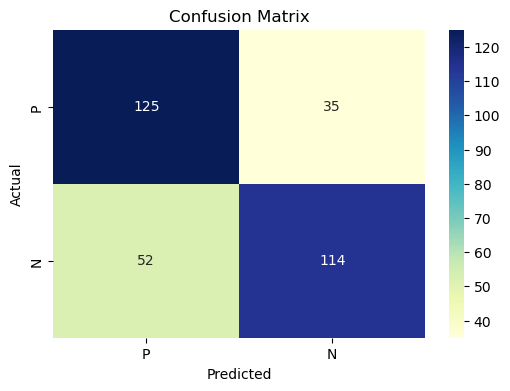


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 50
Accuracy: 73.31 %
              precision    recall  f1-score   support

           N       0.71      0.78      0.74       160
           P       0.77      0.69      0.72       166

    accuracy                           0.73       326
   macro avg       0.74      0.73      0.73       326
weighted avg       0.74      0.73      0.73       326



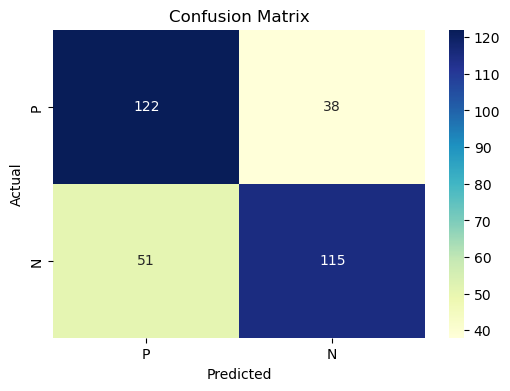


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 100
Accuracy: 72.7 %
              precision    recall  f1-score   support

           N       0.71      0.76      0.73       160
           P       0.75      0.69      0.72       166

    accuracy                           0.73       326
   macro avg       0.73      0.73      0.73       326
weighted avg       0.73      0.73      0.73       326



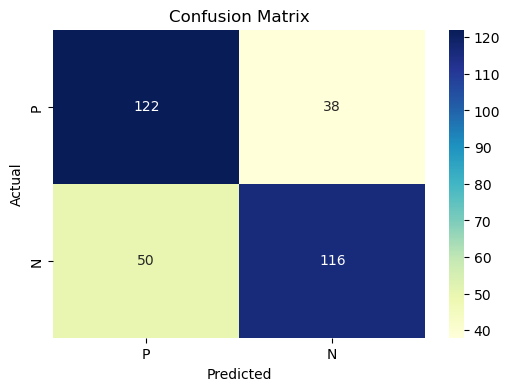


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 200
Accuracy: 73.01 %
              precision    recall  f1-score   support

           N       0.71      0.76      0.73       160
           P       0.75      0.70      0.73       166

    accuracy                           0.73       326
   macro avg       0.73      0.73      0.73       326
weighted avg       0.73      0.73      0.73       326



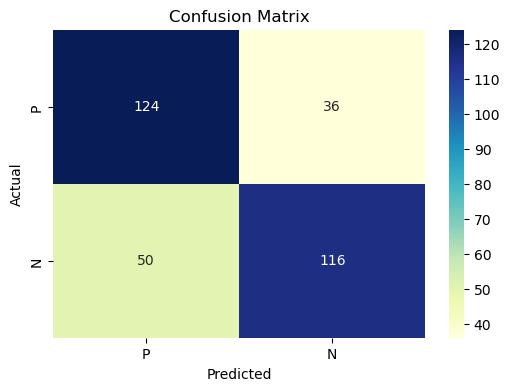


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 500
Accuracy: 73.62 %
              precision    recall  f1-score   support

           N       0.71      0.78      0.74       160
           P       0.76      0.70      0.73       166

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



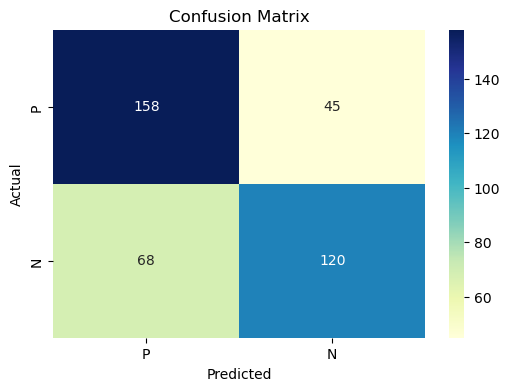


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 10
Accuracy: 71.1 %
              precision    recall  f1-score   support

           N       0.70      0.78      0.74       203
           P       0.73      0.64      0.68       188

    accuracy                           0.71       391
   macro avg       0.71      0.71      0.71       391
weighted avg       0.71      0.71      0.71       391



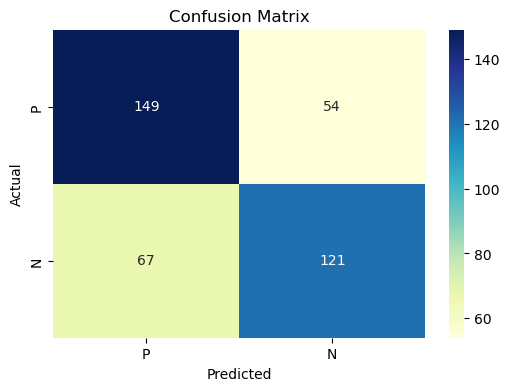


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 20
Accuracy: 69.05 %
              precision    recall  f1-score   support

           N       0.69      0.73      0.71       203
           P       0.69      0.64      0.67       188

    accuracy                           0.69       391
   macro avg       0.69      0.69      0.69       391
weighted avg       0.69      0.69      0.69       391



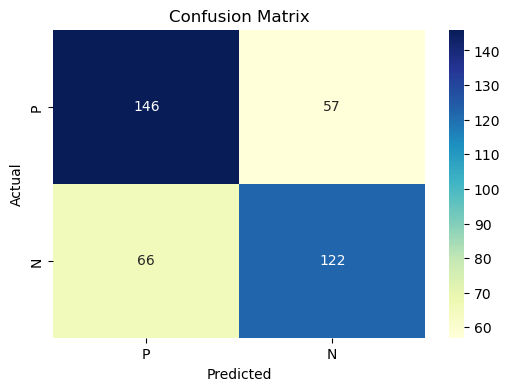


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 30
Accuracy: 68.54 %
              precision    recall  f1-score   support

           N       0.69      0.72      0.70       203
           P       0.68      0.65      0.66       188

    accuracy                           0.69       391
   macro avg       0.69      0.68      0.68       391
weighted avg       0.69      0.69      0.68       391



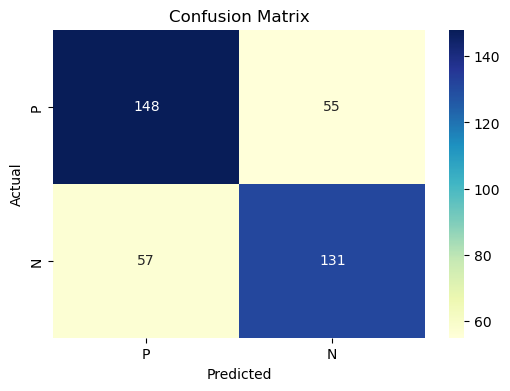


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 50
Accuracy: 71.36 %
              precision    recall  f1-score   support

           N       0.72      0.73      0.73       203
           P       0.70      0.70      0.70       188

    accuracy                           0.71       391
   macro avg       0.71      0.71      0.71       391
weighted avg       0.71      0.71      0.71       391



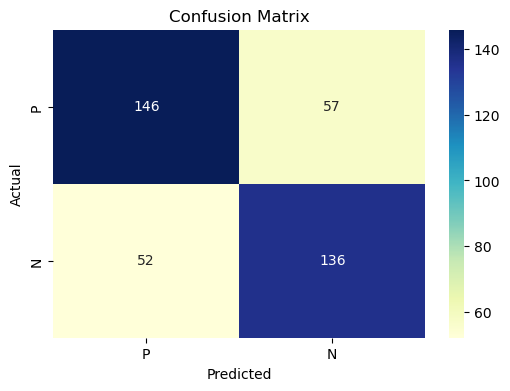


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 100
Accuracy: 72.12 %
              precision    recall  f1-score   support

           N       0.74      0.72      0.73       203
           P       0.70      0.72      0.71       188

    accuracy                           0.72       391
   macro avg       0.72      0.72      0.72       391
weighted avg       0.72      0.72      0.72       391



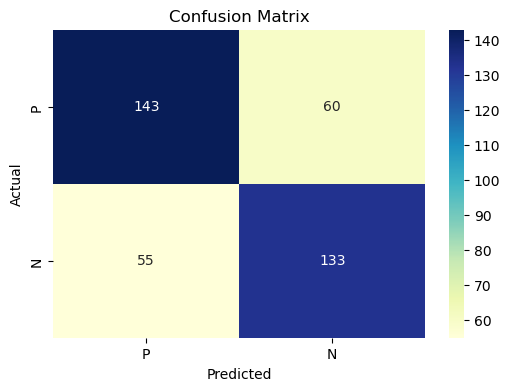


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 200
Accuracy: 70.59 %
              precision    recall  f1-score   support

           N       0.72      0.70      0.71       203
           P       0.69      0.71      0.70       188

    accuracy                           0.71       391
   macro avg       0.71      0.71      0.71       391
weighted avg       0.71      0.71      0.71       391



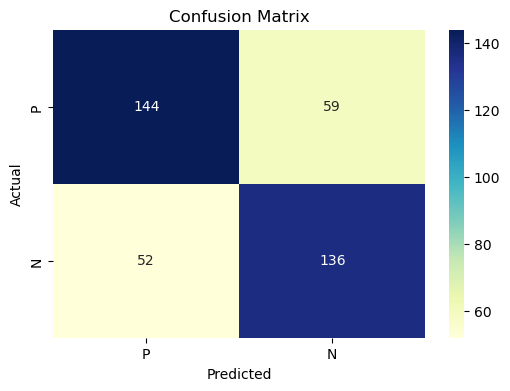


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 500
Accuracy: 71.61 %
              precision    recall  f1-score   support

           N       0.73      0.71      0.72       203
           P       0.70      0.72      0.71       188

    accuracy                           0.72       391
   macro avg       0.72      0.72      0.72       391
weighted avg       0.72      0.72      0.72       391


Best Results:
{'test_size': 0.25, 'estimators': 10, 'accuracy': 0.7515337423312883, 'precision': 0.7631632723054974, 'recall': 0.7515337423312883, 'f1_score': 0.7494362555663133}


In [78]:
## age = value to be predicted = y
## the rest of the dataset = X

# df_copy = numeric_df.copy()

X = new_df.drop(['binaryClass'], axis = 1)
y = new_df['binaryClass']

test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
estimators = [10, 20, 30, 50, 100, 200, 500]

best_results = {
    'test_size': None,
    'estimators': None,
    'accuracy': 0,
    'precision': 0,
    'recall': 0,
    'f1_score': 0
}

for test_size in test_sizes:
    for num_estimators in estimators:
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)
        
        scaler = StandardScaler()
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize the Random Forest classifier
        rf_classifier = RandomForestClassifier(n_estimators=num_estimators, random_state=17)

        # Fit the classifier on the training data
        rf_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = rf_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = test_size
            best_results['estimators'] = num_estimators
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']

        # Print Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=y.unique(), yticklabels=y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nRandom Forest Classifier Performance:")
        print(f"Test Size = {test_size} and Estimators = {num_estimators}")
        print(f"Accuracy: {round(100 * accuracy, 2)} %")
        print(classification_report(y_test, y_pred))

# Print the best results
print("\nBest Results:")
print(best_results)

### MinMaxScaler

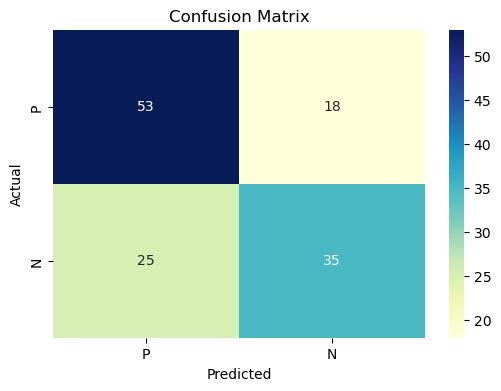


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 10
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.68      0.75      0.71        71
           P       0.66      0.58      0.62        60

    accuracy                           0.67       131
   macro avg       0.67      0.66      0.67       131
weighted avg       0.67      0.67      0.67       131



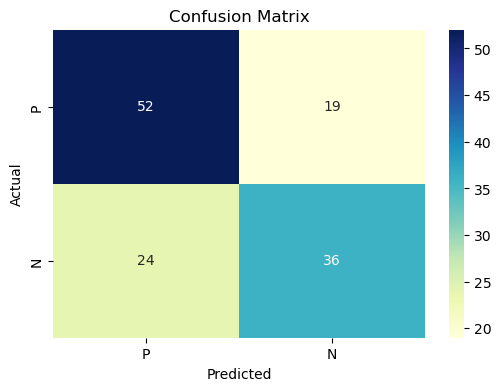


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 20
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.68      0.73      0.71        71
           P       0.65      0.60      0.63        60

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131



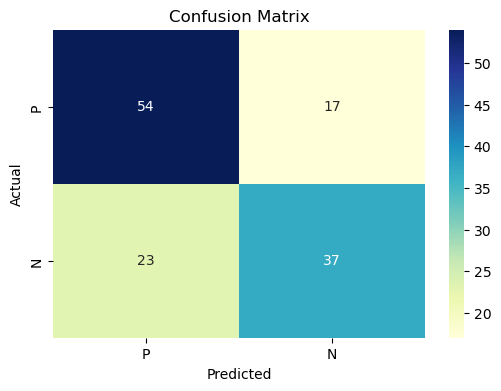


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 30
Accuracy: 69.47 %
              precision    recall  f1-score   support

           N       0.70      0.76      0.73        71
           P       0.69      0.62      0.65        60

    accuracy                           0.69       131
   macro avg       0.69      0.69      0.69       131
weighted avg       0.69      0.69      0.69       131



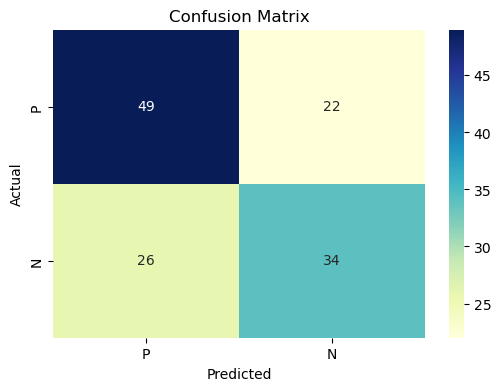


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 50
Accuracy: 63.36 %
              precision    recall  f1-score   support

           N       0.65      0.69      0.67        71
           P       0.61      0.57      0.59        60

    accuracy                           0.63       131
   macro avg       0.63      0.63      0.63       131
weighted avg       0.63      0.63      0.63       131



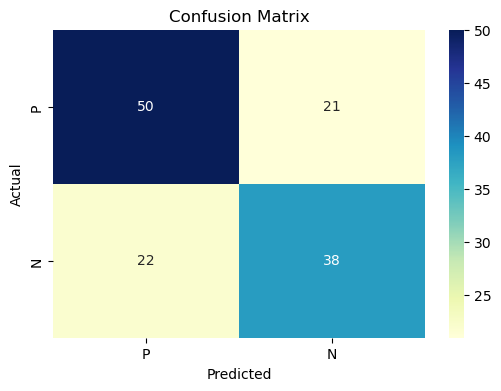


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 100
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.69      0.70      0.70        71
           P       0.64      0.63      0.64        60

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131



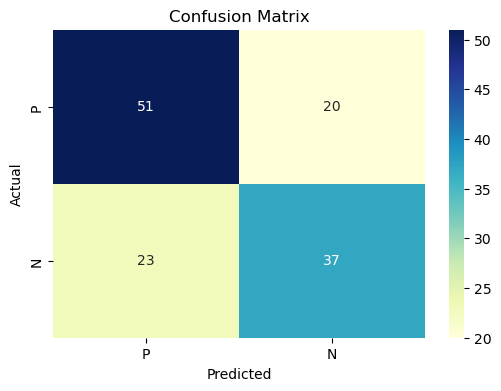


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 200
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.69      0.72      0.70        71
           P       0.65      0.62      0.63        60

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131



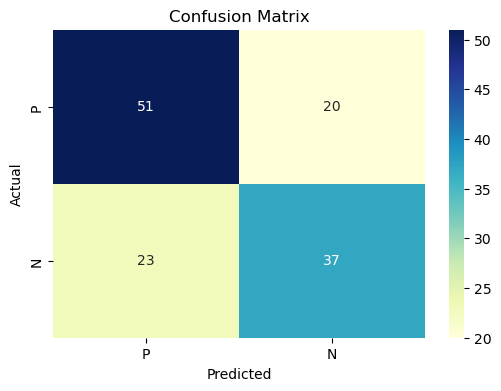


Random Forest Classifier Performance:
Test Size = 0.1 and Estimators = 500
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.69      0.72      0.70        71
           P       0.65      0.62      0.63        60

    accuracy                           0.67       131
   macro avg       0.67      0.67      0.67       131
weighted avg       0.67      0.67      0.67       131



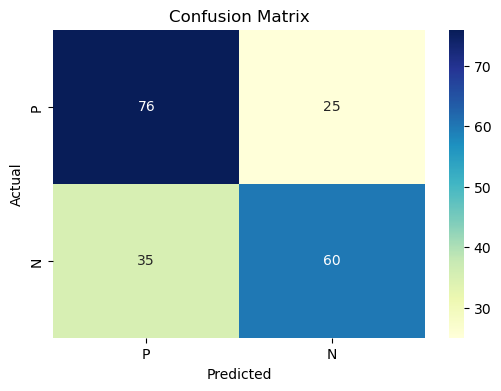


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 10
Accuracy: 69.39 %
              precision    recall  f1-score   support

           N       0.68      0.75      0.72       101
           P       0.71      0.63      0.67        95

    accuracy                           0.69       196
   macro avg       0.70      0.69      0.69       196
weighted avg       0.69      0.69      0.69       196



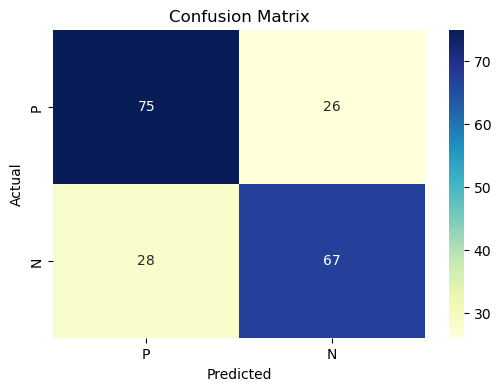


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 20
Accuracy: 72.45 %
              precision    recall  f1-score   support

           N       0.73      0.74      0.74       101
           P       0.72      0.71      0.71        95

    accuracy                           0.72       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.72      0.72      0.72       196



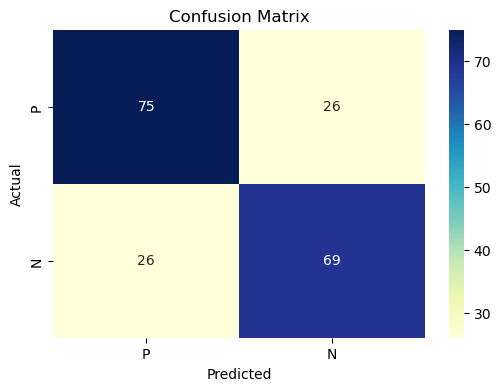


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 30
Accuracy: 73.47 %
              precision    recall  f1-score   support

           N       0.74      0.74      0.74       101
           P       0.73      0.73      0.73        95

    accuracy                           0.73       196
   macro avg       0.73      0.73      0.73       196
weighted avg       0.73      0.73      0.73       196



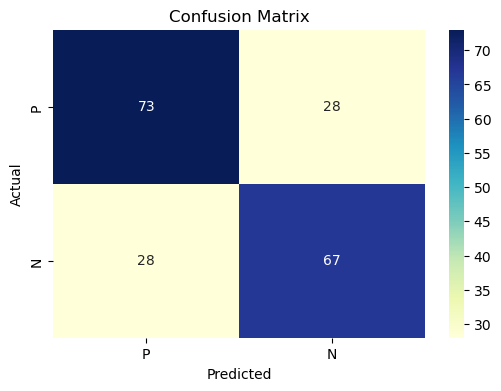


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 50
Accuracy: 71.43 %
              precision    recall  f1-score   support

           N       0.72      0.72      0.72       101
           P       0.71      0.71      0.71        95

    accuracy                           0.71       196
   macro avg       0.71      0.71      0.71       196
weighted avg       0.71      0.71      0.71       196



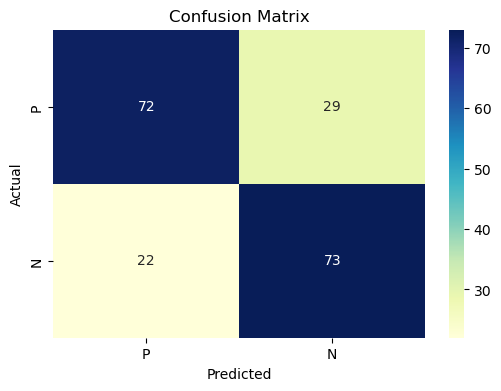


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 100
Accuracy: 73.98 %
              precision    recall  f1-score   support

           N       0.77      0.71      0.74       101
           P       0.72      0.77      0.74        95

    accuracy                           0.74       196
   macro avg       0.74      0.74      0.74       196
weighted avg       0.74      0.74      0.74       196



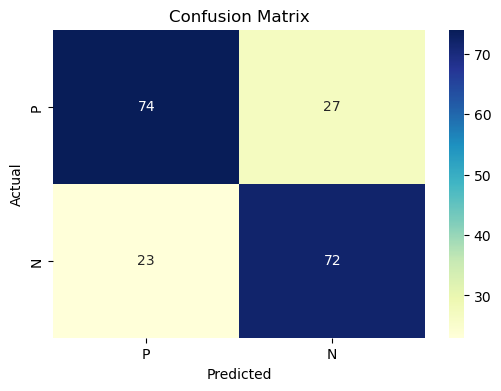


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 200
Accuracy: 74.49 %
              precision    recall  f1-score   support

           N       0.76      0.73      0.75       101
           P       0.73      0.76      0.74        95

    accuracy                           0.74       196
   macro avg       0.75      0.75      0.74       196
weighted avg       0.75      0.74      0.74       196



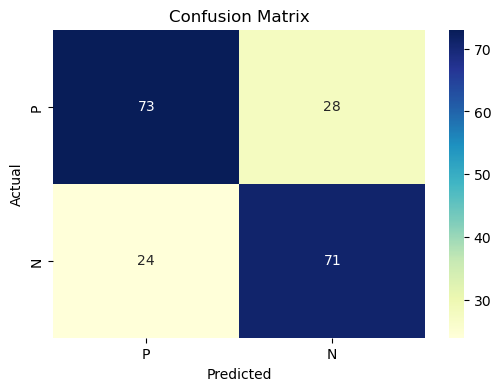


Random Forest Classifier Performance:
Test Size = 0.15 and Estimators = 500
Accuracy: 73.47 %
              precision    recall  f1-score   support

           N       0.75      0.72      0.74       101
           P       0.72      0.75      0.73        95

    accuracy                           0.73       196
   macro avg       0.73      0.74      0.73       196
weighted avg       0.74      0.73      0.73       196



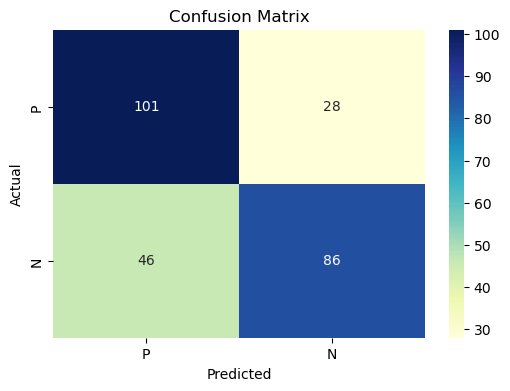


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 10
Accuracy: 71.65 %
              precision    recall  f1-score   support

           N       0.69      0.78      0.73       129
           P       0.75      0.65      0.70       132

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



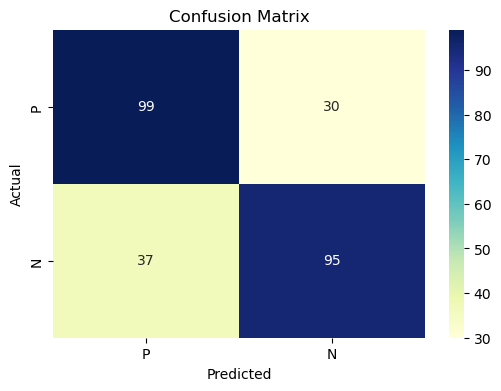


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 20
Accuracy: 74.33 %
              precision    recall  f1-score   support

           N       0.73      0.77      0.75       129
           P       0.76      0.72      0.74       132

    accuracy                           0.74       261
   macro avg       0.74      0.74      0.74       261
weighted avg       0.74      0.74      0.74       261



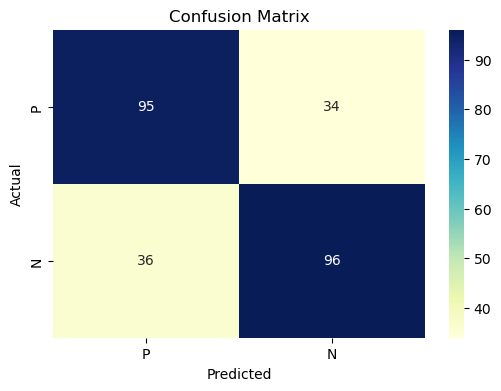


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 30
Accuracy: 73.18 %
              precision    recall  f1-score   support

           N       0.73      0.74      0.73       129
           P       0.74      0.73      0.73       132

    accuracy                           0.73       261
   macro avg       0.73      0.73      0.73       261
weighted avg       0.73      0.73      0.73       261



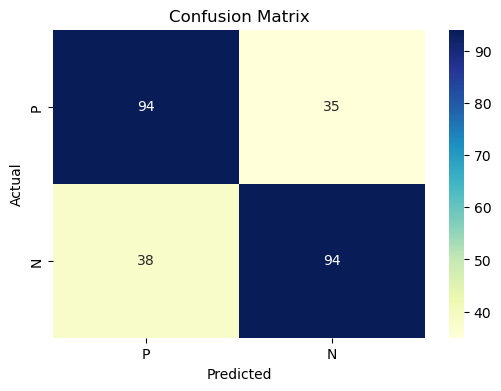


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 50
Accuracy: 72.03 %
              precision    recall  f1-score   support

           N       0.71      0.73      0.72       129
           P       0.73      0.71      0.72       132

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



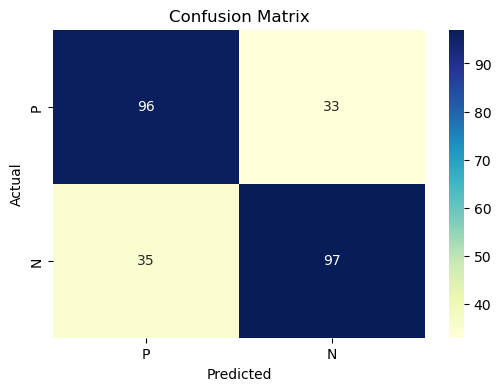


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 100
Accuracy: 73.95 %
              precision    recall  f1-score   support

           N       0.73      0.74      0.74       129
           P       0.75      0.73      0.74       132

    accuracy                           0.74       261
   macro avg       0.74      0.74      0.74       261
weighted avg       0.74      0.74      0.74       261



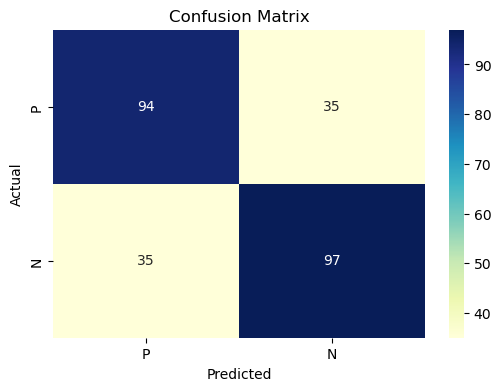


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 200
Accuracy: 73.18 %
              precision    recall  f1-score   support

           N       0.73      0.73      0.73       129
           P       0.73      0.73      0.73       132

    accuracy                           0.73       261
   macro avg       0.73      0.73      0.73       261
weighted avg       0.73      0.73      0.73       261



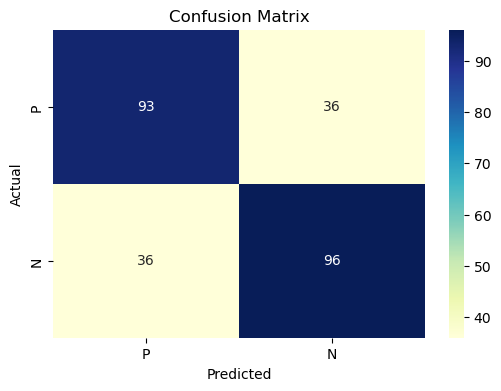


Random Forest Classifier Performance:
Test Size = 0.2 and Estimators = 500
Accuracy: 72.41 %
              precision    recall  f1-score   support

           N       0.72      0.72      0.72       129
           P       0.73      0.73      0.73       132

    accuracy                           0.72       261
   macro avg       0.72      0.72      0.72       261
weighted avg       0.72      0.72      0.72       261



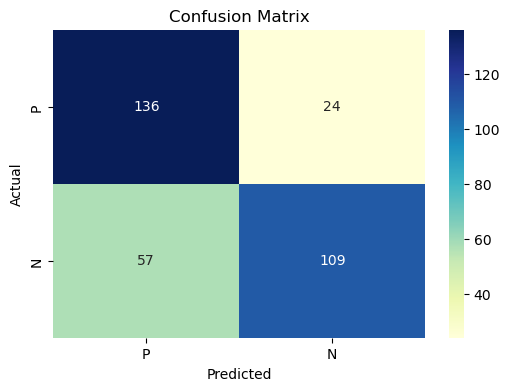


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 10
Accuracy: 75.15 %
              precision    recall  f1-score   support

           N       0.70      0.85      0.77       160
           P       0.82      0.66      0.73       166

    accuracy                           0.75       326
   macro avg       0.76      0.75      0.75       326
weighted avg       0.76      0.75      0.75       326



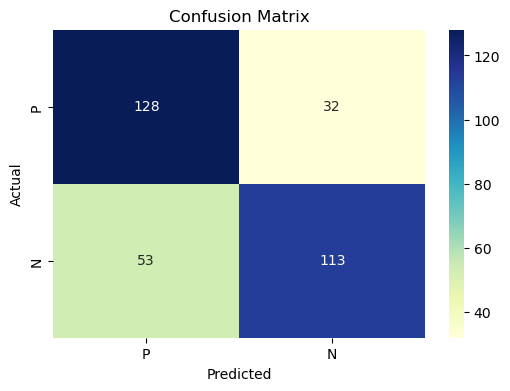


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 20
Accuracy: 73.93 %
              precision    recall  f1-score   support

           N       0.71      0.80      0.75       160
           P       0.78      0.68      0.73       166

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



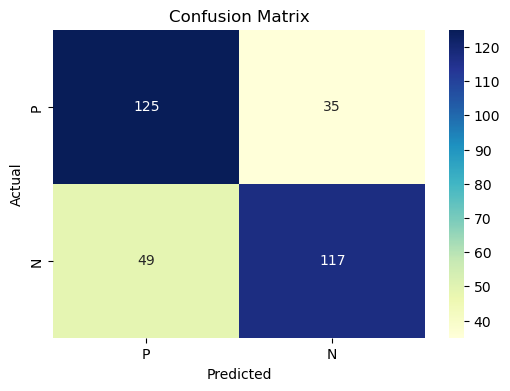


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 30
Accuracy: 74.23 %
              precision    recall  f1-score   support

           N       0.72      0.78      0.75       160
           P       0.77      0.70      0.74       166

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



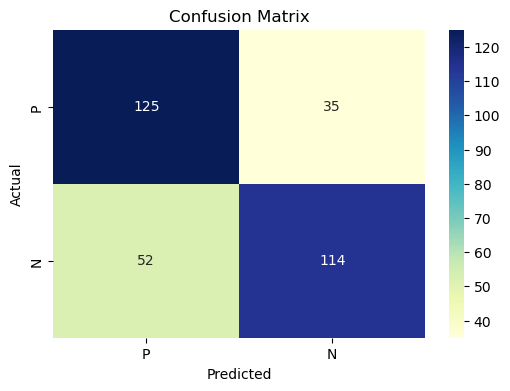


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 50
Accuracy: 73.31 %
              precision    recall  f1-score   support

           N       0.71      0.78      0.74       160
           P       0.77      0.69      0.72       166

    accuracy                           0.73       326
   macro avg       0.74      0.73      0.73       326
weighted avg       0.74      0.73      0.73       326



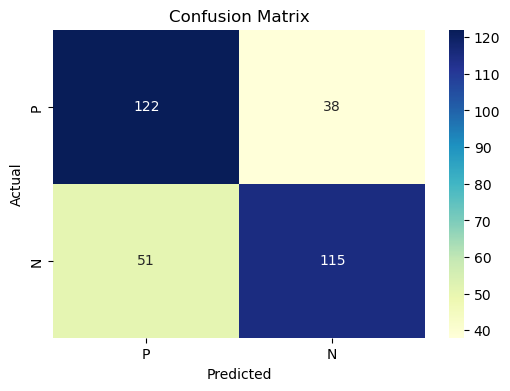


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 100
Accuracy: 72.7 %
              precision    recall  f1-score   support

           N       0.71      0.76      0.73       160
           P       0.75      0.69      0.72       166

    accuracy                           0.73       326
   macro avg       0.73      0.73      0.73       326
weighted avg       0.73      0.73      0.73       326



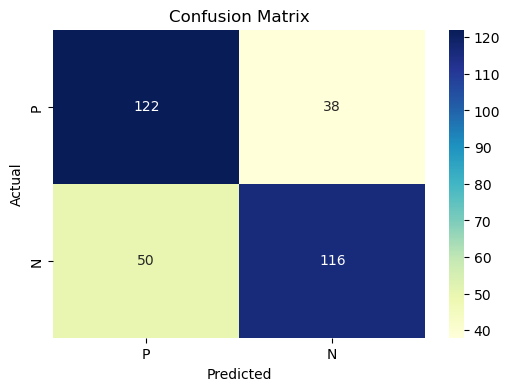


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 200
Accuracy: 73.01 %
              precision    recall  f1-score   support

           N       0.71      0.76      0.73       160
           P       0.75      0.70      0.73       166

    accuracy                           0.73       326
   macro avg       0.73      0.73      0.73       326
weighted avg       0.73      0.73      0.73       326



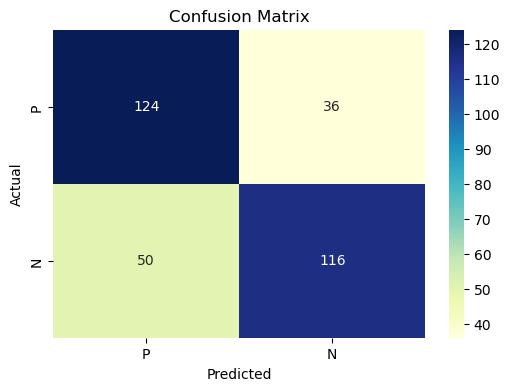


Random Forest Classifier Performance:
Test Size = 0.25 and Estimators = 500
Accuracy: 73.62 %
              precision    recall  f1-score   support

           N       0.71      0.78      0.74       160
           P       0.76      0.70      0.73       166

    accuracy                           0.74       326
   macro avg       0.74      0.74      0.74       326
weighted avg       0.74      0.74      0.74       326



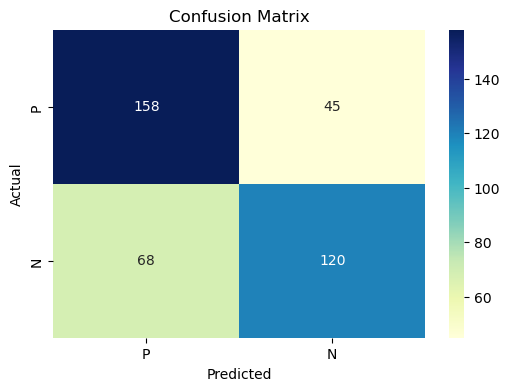


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 10
Accuracy: 71.1 %
              precision    recall  f1-score   support

           N       0.70      0.78      0.74       203
           P       0.73      0.64      0.68       188

    accuracy                           0.71       391
   macro avg       0.71      0.71      0.71       391
weighted avg       0.71      0.71      0.71       391



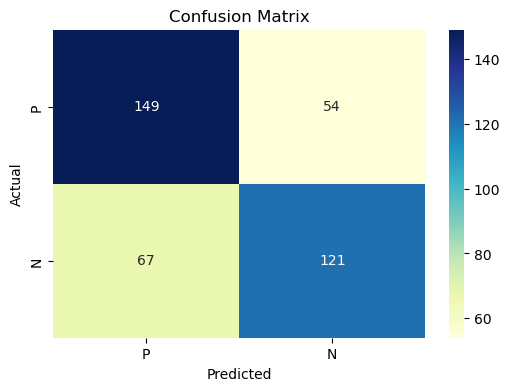


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 20
Accuracy: 69.05 %
              precision    recall  f1-score   support

           N       0.69      0.73      0.71       203
           P       0.69      0.64      0.67       188

    accuracy                           0.69       391
   macro avg       0.69      0.69      0.69       391
weighted avg       0.69      0.69      0.69       391



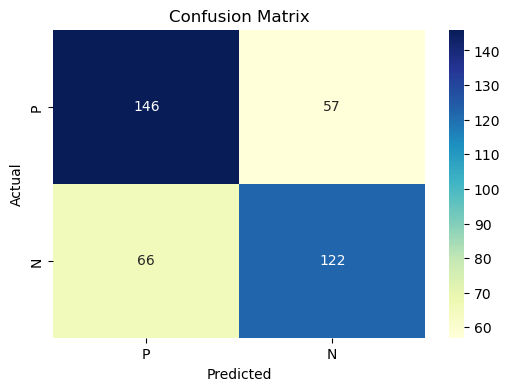


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 30
Accuracy: 68.54 %
              precision    recall  f1-score   support

           N       0.69      0.72      0.70       203
           P       0.68      0.65      0.66       188

    accuracy                           0.69       391
   macro avg       0.69      0.68      0.68       391
weighted avg       0.69      0.69      0.68       391



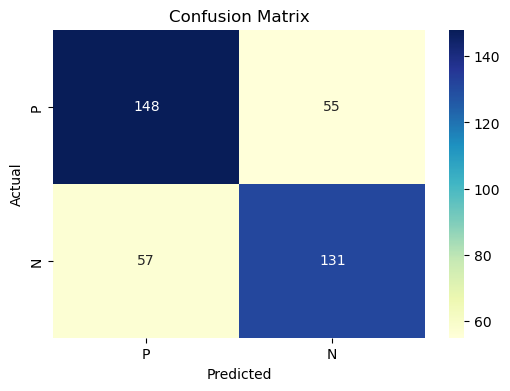


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 50
Accuracy: 71.36 %
              precision    recall  f1-score   support

           N       0.72      0.73      0.73       203
           P       0.70      0.70      0.70       188

    accuracy                           0.71       391
   macro avg       0.71      0.71      0.71       391
weighted avg       0.71      0.71      0.71       391



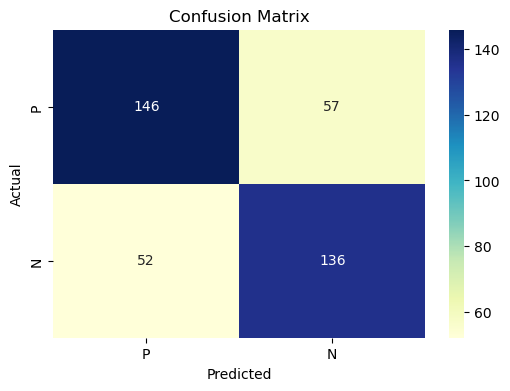


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 100
Accuracy: 72.12 %
              precision    recall  f1-score   support

           N       0.74      0.72      0.73       203
           P       0.70      0.72      0.71       188

    accuracy                           0.72       391
   macro avg       0.72      0.72      0.72       391
weighted avg       0.72      0.72      0.72       391



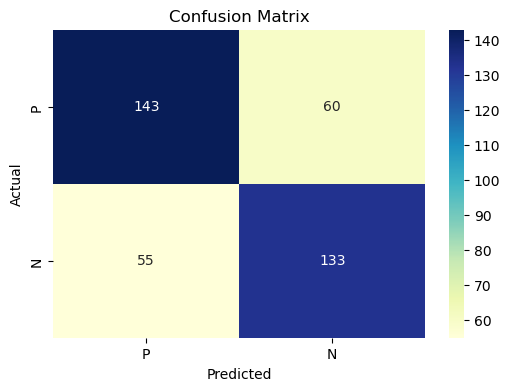


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 200
Accuracy: 70.59 %
              precision    recall  f1-score   support

           N       0.72      0.70      0.71       203
           P       0.69      0.71      0.70       188

    accuracy                           0.71       391
   macro avg       0.71      0.71      0.71       391
weighted avg       0.71      0.71      0.71       391



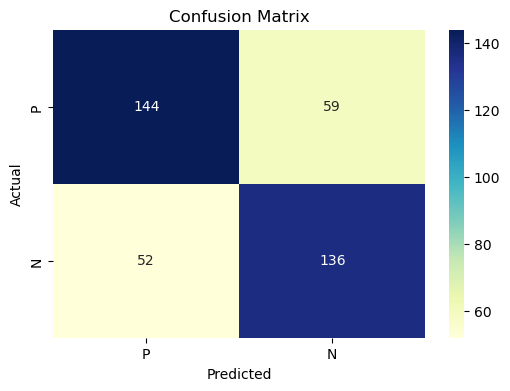


Random Forest Classifier Performance:
Test Size = 0.3 and Estimators = 500
Accuracy: 71.61 %
              precision    recall  f1-score   support

           N       0.73      0.71      0.72       203
           P       0.70      0.72      0.71       188

    accuracy                           0.72       391
   macro avg       0.72      0.72      0.72       391
weighted avg       0.72      0.72      0.72       391


Best Results:
{'test_size': 0.25, 'estimators': 10, 'accuracy': 0.7515337423312883, 'precision': 0.7631632723054974, 'recall': 0.7515337423312883, 'f1_score': 0.7494362555663133}


In [81]:
## age = value to be predicted = y
## the rest of the dataset = X

# df_copy = numeric_df.copy()

X = new_df.drop(['binaryClass'], axis = 1)
y = new_df['binaryClass']

test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
estimators = [10, 20, 30, 50, 100, 200, 500]

best_results = {
    'test_size': None,
    'estimators': None,
    'accuracy': 0,
    'precision': 0,
    'recall': 0,
    'f1_score': 0
}

for test_size in test_sizes:
    for num_estimators in estimators:
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=17)
        
        scaler = MinMaxScaler()
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize the Random Forest classifier
        rf_classifier = RandomForestClassifier(n_estimators=num_estimators, random_state=17)

        # Fit the classifier on the training data
        rf_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = rf_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = test_size
            best_results['estimators'] = num_estimators
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']

        # Print Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=y.unique(), yticklabels=y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nRandom Forest Classifier Performance:")
        print(f"Test Size = {test_size} and Estimators = {num_estimators}")
        print(f"Accuracy: {round(100 * accuracy, 2)} %")
        print(classification_report(y_test, y_pred))

# Print the best results
print("\nBest Results:")
print(best_results)

## MLP

### StandardScaler

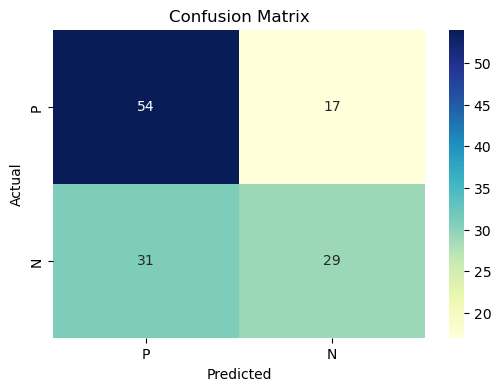


MLP Classifier Performance:
Test Size = 0.1 and Layers = 10
Accuracy: 63.36 %
              precision    recall  f1-score   support

           N       0.64      0.76      0.69        71
           P       0.63      0.48      0.55        60

    accuracy                           0.63       131
   macro avg       0.63      0.62      0.62       131
weighted avg       0.63      0.63      0.63       131



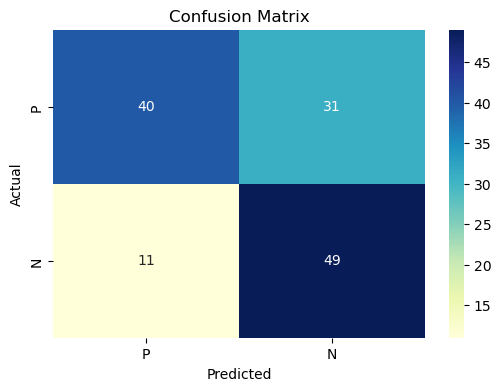


MLP Classifier Performance:
Test Size = 0.1 and Layers = 20
Accuracy: 67.94 %
              precision    recall  f1-score   support

           N       0.78      0.56      0.66        71
           P       0.61      0.82      0.70        60

    accuracy                           0.68       131
   macro avg       0.70      0.69      0.68       131
weighted avg       0.71      0.68      0.68       131



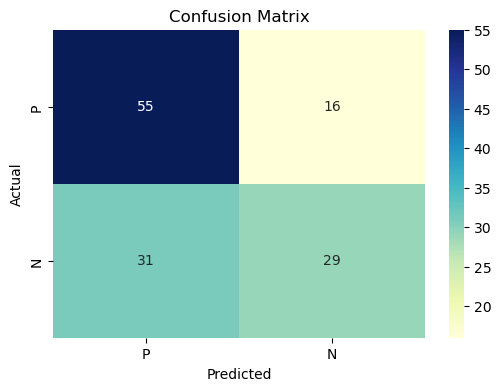


MLP Classifier Performance:
Test Size = 0.1 and Layers = 30
Accuracy: 64.12 %
              precision    recall  f1-score   support

           N       0.64      0.77      0.70        71
           P       0.64      0.48      0.55        60

    accuracy                           0.64       131
   macro avg       0.64      0.63      0.63       131
weighted avg       0.64      0.64      0.63       131



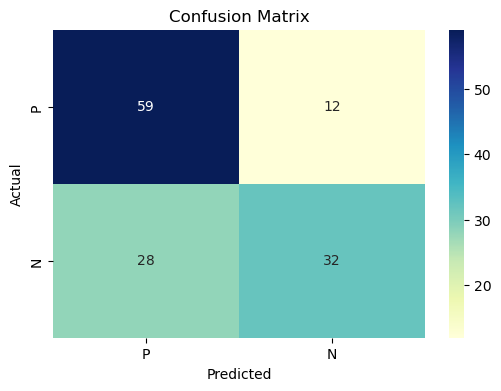


MLP Classifier Performance:
Test Size = 0.1 and Layers = 50
Accuracy: 69.47 %
              precision    recall  f1-score   support

           N       0.68      0.83      0.75        71
           P       0.73      0.53      0.62        60

    accuracy                           0.69       131
   macro avg       0.70      0.68      0.68       131
weighted avg       0.70      0.69      0.69       131



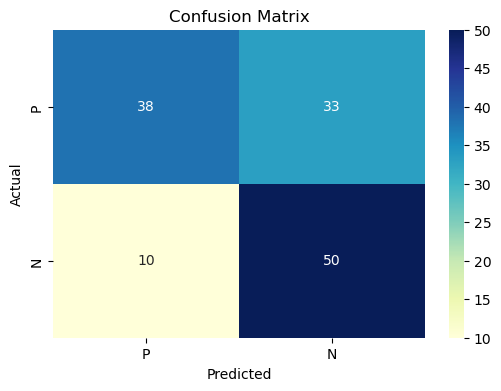


MLP Classifier Performance:
Test Size = 0.1 and Layers = 100
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.79      0.54      0.64        71
           P       0.60      0.83      0.70        60

    accuracy                           0.67       131
   macro avg       0.70      0.68      0.67       131
weighted avg       0.70      0.67      0.67       131



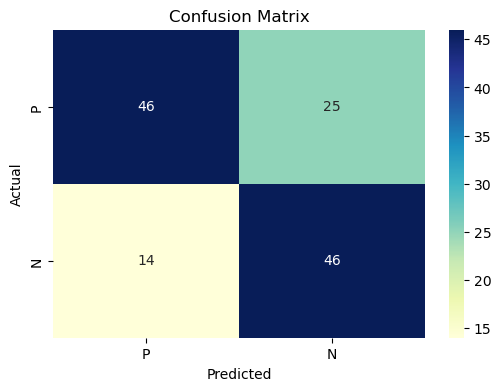


MLP Classifier Performance:
Test Size = 0.1 and Layers = 200
Accuracy: 70.23 %
              precision    recall  f1-score   support

           N       0.77      0.65      0.70        71
           P       0.65      0.77      0.70        60

    accuracy                           0.70       131
   macro avg       0.71      0.71      0.70       131
weighted avg       0.71      0.70      0.70       131



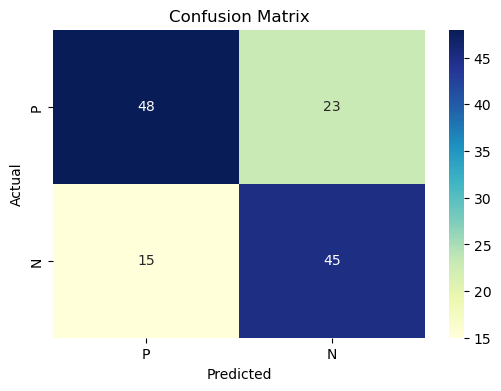


MLP Classifier Performance:
Test Size = 0.1 and Layers = 500
Accuracy: 70.99 %
              precision    recall  f1-score   support

           N       0.76      0.68      0.72        71
           P       0.66      0.75      0.70        60

    accuracy                           0.71       131
   macro avg       0.71      0.71      0.71       131
weighted avg       0.72      0.71      0.71       131



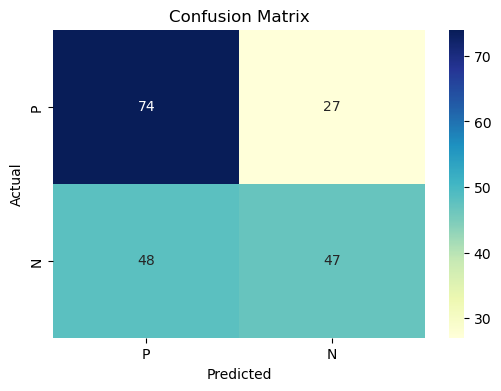


MLP Classifier Performance:
Test Size = 0.15 and Layers = 10
Accuracy: 61.73 %
              precision    recall  f1-score   support

           N       0.61      0.73      0.66       101
           P       0.64      0.49      0.56        95

    accuracy                           0.62       196
   macro avg       0.62      0.61      0.61       196
weighted avg       0.62      0.62      0.61       196



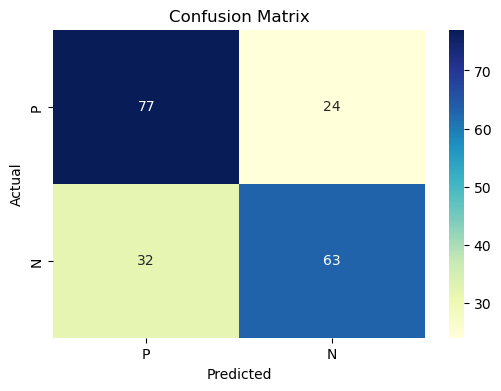


MLP Classifier Performance:
Test Size = 0.15 and Layers = 20
Accuracy: 71.43 %
              precision    recall  f1-score   support

           N       0.71      0.76      0.73       101
           P       0.72      0.66      0.69        95

    accuracy                           0.71       196
   macro avg       0.72      0.71      0.71       196
weighted avg       0.72      0.71      0.71       196



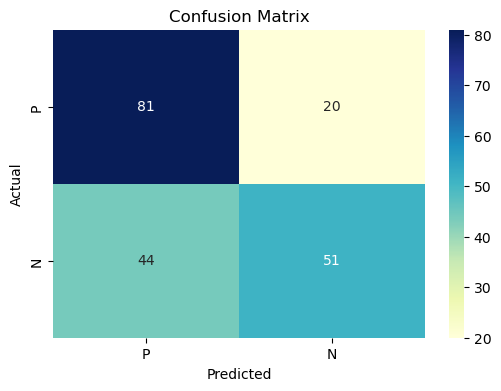


MLP Classifier Performance:
Test Size = 0.15 and Layers = 30
Accuracy: 67.35 %
              precision    recall  f1-score   support

           N       0.65      0.80      0.72       101
           P       0.72      0.54      0.61        95

    accuracy                           0.67       196
   macro avg       0.68      0.67      0.67       196
weighted avg       0.68      0.67      0.67       196



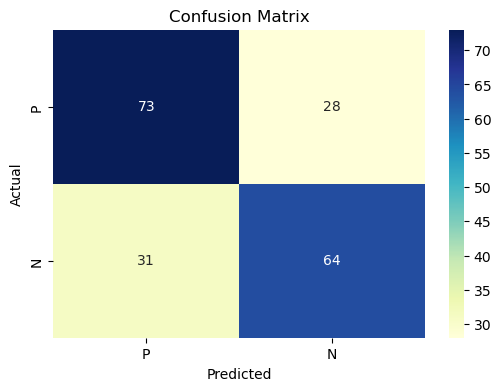


MLP Classifier Performance:
Test Size = 0.15 and Layers = 50
Accuracy: 69.9 %
              precision    recall  f1-score   support

           N       0.70      0.72      0.71       101
           P       0.70      0.67      0.68        95

    accuracy                           0.70       196
   macro avg       0.70      0.70      0.70       196
weighted avg       0.70      0.70      0.70       196



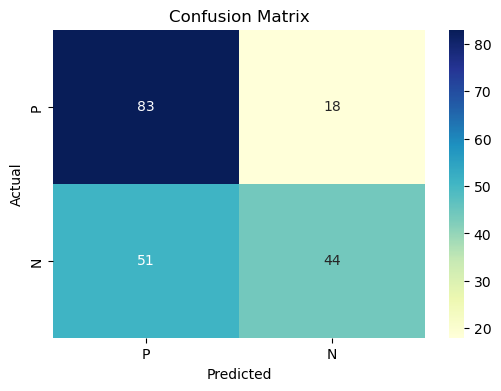


MLP Classifier Performance:
Test Size = 0.15 and Layers = 100
Accuracy: 64.8 %
              precision    recall  f1-score   support

           N       0.62      0.82      0.71       101
           P       0.71      0.46      0.56        95

    accuracy                           0.65       196
   macro avg       0.66      0.64      0.63       196
weighted avg       0.66      0.65      0.64       196



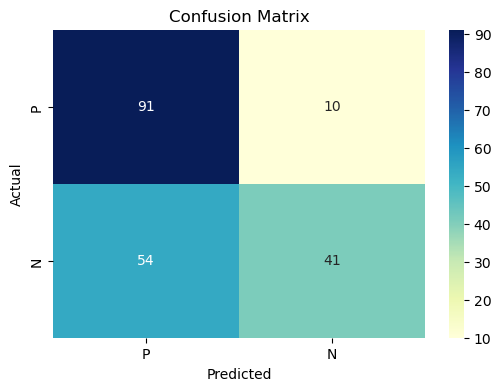


MLP Classifier Performance:
Test Size = 0.15 and Layers = 200
Accuracy: 67.35 %
              precision    recall  f1-score   support

           N       0.63      0.90      0.74       101
           P       0.80      0.43      0.56        95

    accuracy                           0.67       196
   macro avg       0.72      0.67      0.65       196
weighted avg       0.71      0.67      0.65       196



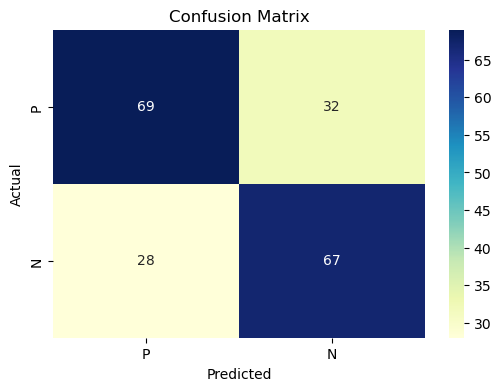


MLP Classifier Performance:
Test Size = 0.15 and Layers = 500
Accuracy: 69.39 %
              precision    recall  f1-score   support

           N       0.71      0.68      0.70       101
           P       0.68      0.71      0.69        95

    accuracy                           0.69       196
   macro avg       0.69      0.69      0.69       196
weighted avg       0.69      0.69      0.69       196



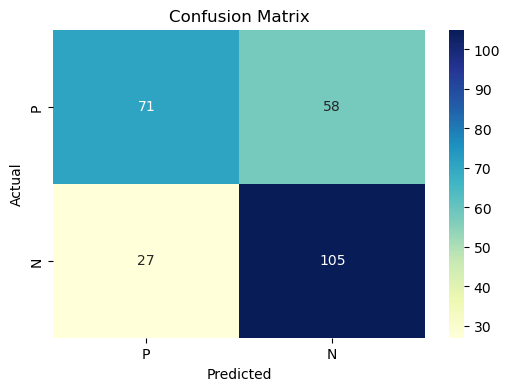


MLP Classifier Performance:
Test Size = 0.2 and Layers = 10
Accuracy: 67.43 %
              precision    recall  f1-score   support

           N       0.72      0.55      0.63       129
           P       0.64      0.80      0.71       132

    accuracy                           0.67       261
   macro avg       0.68      0.67      0.67       261
weighted avg       0.68      0.67      0.67       261



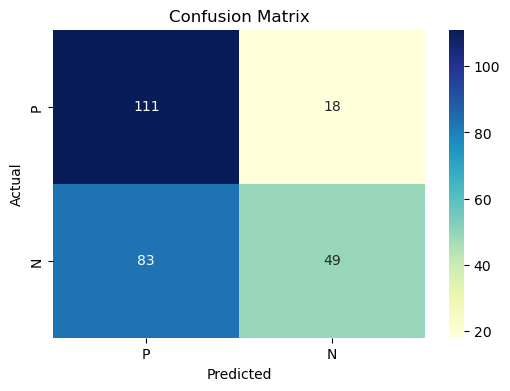


MLP Classifier Performance:
Test Size = 0.2 and Layers = 20
Accuracy: 61.3 %
              precision    recall  f1-score   support

           N       0.57      0.86      0.69       129
           P       0.73      0.37      0.49       132

    accuracy                           0.61       261
   macro avg       0.65      0.62      0.59       261
weighted avg       0.65      0.61      0.59       261



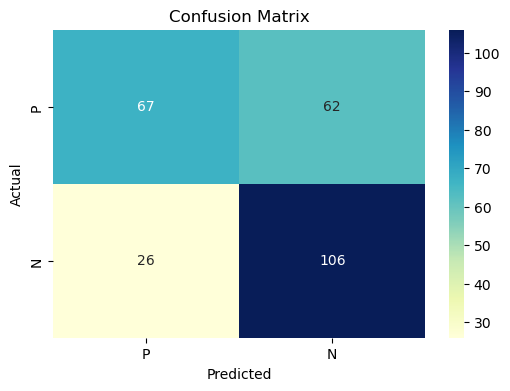


MLP Classifier Performance:
Test Size = 0.2 and Layers = 30
Accuracy: 66.28 %
              precision    recall  f1-score   support

           N       0.72      0.52      0.60       129
           P       0.63      0.80      0.71       132

    accuracy                           0.66       261
   macro avg       0.68      0.66      0.66       261
weighted avg       0.68      0.66      0.66       261



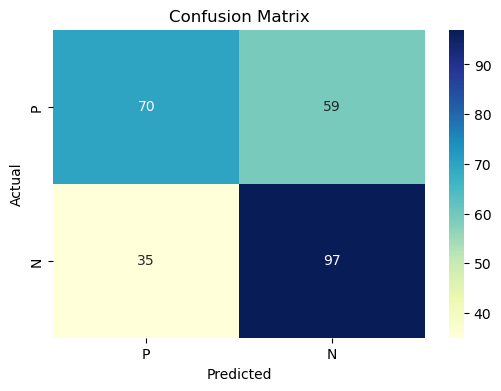


MLP Classifier Performance:
Test Size = 0.2 and Layers = 50
Accuracy: 63.98 %
              precision    recall  f1-score   support

           N       0.67      0.54      0.60       129
           P       0.62      0.73      0.67       132

    accuracy                           0.64       261
   macro avg       0.64      0.64      0.64       261
weighted avg       0.64      0.64      0.64       261



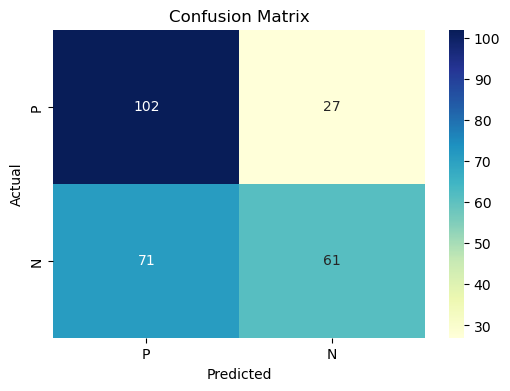


MLP Classifier Performance:
Test Size = 0.2 and Layers = 100
Accuracy: 62.45 %
              precision    recall  f1-score   support

           N       0.59      0.79      0.68       129
           P       0.69      0.46      0.55       132

    accuracy                           0.62       261
   macro avg       0.64      0.63      0.62       261
weighted avg       0.64      0.62      0.61       261



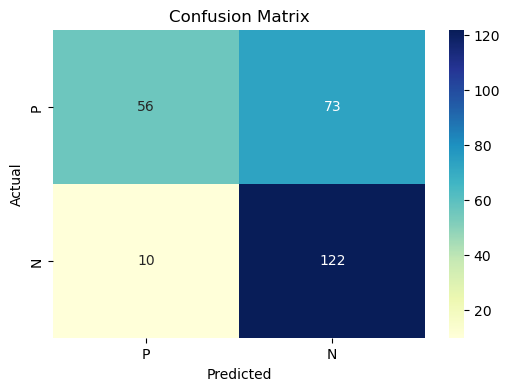


MLP Classifier Performance:
Test Size = 0.2 and Layers = 200
Accuracy: 68.2 %
              precision    recall  f1-score   support

           N       0.85      0.43      0.57       129
           P       0.63      0.92      0.75       132

    accuracy                           0.68       261
   macro avg       0.74      0.68      0.66       261
weighted avg       0.74      0.68      0.66       261



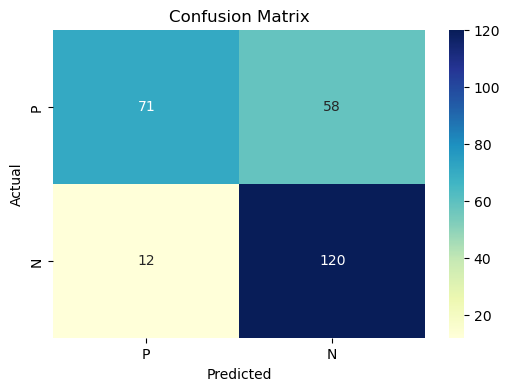


MLP Classifier Performance:
Test Size = 0.2 and Layers = 500
Accuracy: 73.18 %
              precision    recall  f1-score   support

           N       0.86      0.55      0.67       129
           P       0.67      0.91      0.77       132

    accuracy                           0.73       261
   macro avg       0.76      0.73      0.72       261
weighted avg       0.76      0.73      0.72       261



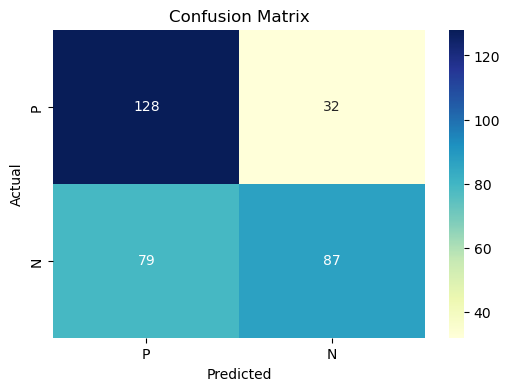


MLP Classifier Performance:
Test Size = 0.25 and Layers = 10
Accuracy: 65.95 %
              precision    recall  f1-score   support

           N       0.62      0.80      0.70       160
           P       0.73      0.52      0.61       166

    accuracy                           0.66       326
   macro avg       0.67      0.66      0.65       326
weighted avg       0.68      0.66      0.65       326



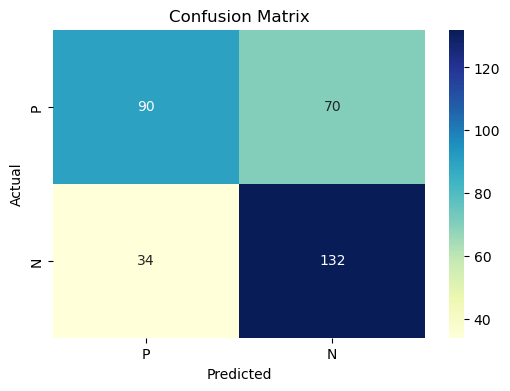


MLP Classifier Performance:
Test Size = 0.25 and Layers = 20
Accuracy: 68.1 %
              precision    recall  f1-score   support

           N       0.73      0.56      0.63       160
           P       0.65      0.80      0.72       166

    accuracy                           0.68       326
   macro avg       0.69      0.68      0.68       326
weighted avg       0.69      0.68      0.68       326



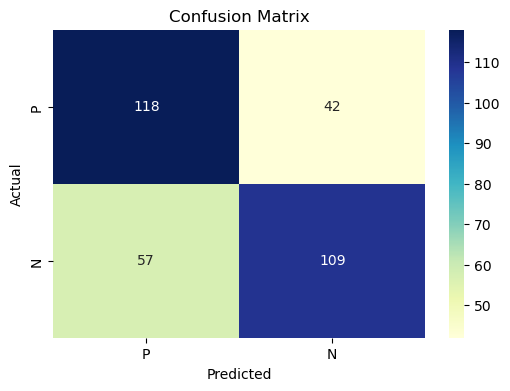


MLP Classifier Performance:
Test Size = 0.25 and Layers = 30
Accuracy: 69.63 %
              precision    recall  f1-score   support

           N       0.67      0.74      0.70       160
           P       0.72      0.66      0.69       166

    accuracy                           0.70       326
   macro avg       0.70      0.70      0.70       326
weighted avg       0.70      0.70      0.70       326



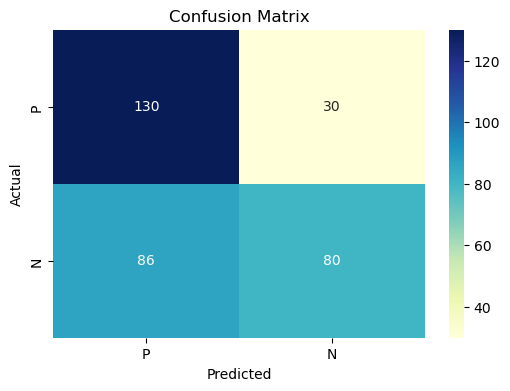


MLP Classifier Performance:
Test Size = 0.25 and Layers = 50
Accuracy: 64.42 %
              precision    recall  f1-score   support

           N       0.60      0.81      0.69       160
           P       0.73      0.48      0.58       166

    accuracy                           0.64       326
   macro avg       0.66      0.65      0.64       326
weighted avg       0.67      0.64      0.63       326



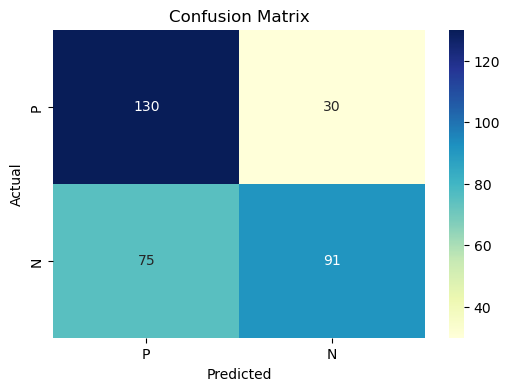


MLP Classifier Performance:
Test Size = 0.25 and Layers = 100
Accuracy: 67.79 %
              precision    recall  f1-score   support

           N       0.63      0.81      0.71       160
           P       0.75      0.55      0.63       166

    accuracy                           0.68       326
   macro avg       0.69      0.68      0.67       326
weighted avg       0.69      0.68      0.67       326



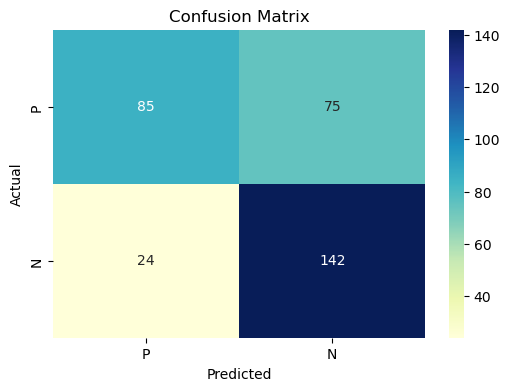


MLP Classifier Performance:
Test Size = 0.25 and Layers = 200
Accuracy: 69.63 %
              precision    recall  f1-score   support

           N       0.78      0.53      0.63       160
           P       0.65      0.86      0.74       166

    accuracy                           0.70       326
   macro avg       0.72      0.69      0.69       326
weighted avg       0.72      0.70      0.69       326



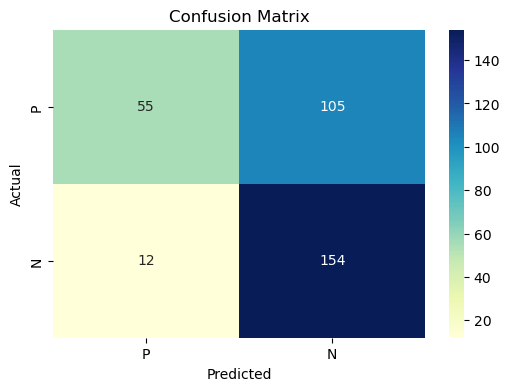


MLP Classifier Performance:
Test Size = 0.25 and Layers = 500
Accuracy: 64.11 %
              precision    recall  f1-score   support

           N       0.82      0.34      0.48       160
           P       0.59      0.93      0.72       166

    accuracy                           0.64       326
   macro avg       0.71      0.64      0.60       326
weighted avg       0.71      0.64      0.61       326



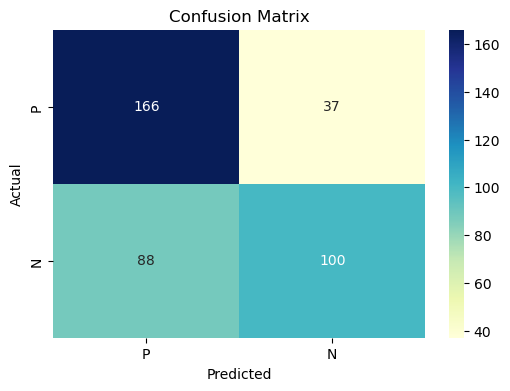


MLP Classifier Performance:
Test Size = 0.3 and Layers = 10
Accuracy: 68.03 %
              precision    recall  f1-score   support

           N       0.65      0.82      0.73       203
           P       0.73      0.53      0.62       188

    accuracy                           0.68       391
   macro avg       0.69      0.67      0.67       391
weighted avg       0.69      0.68      0.67       391



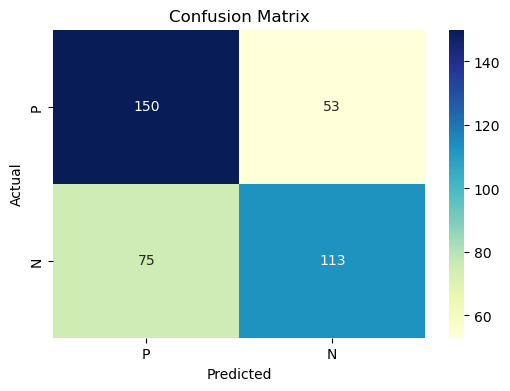


MLP Classifier Performance:
Test Size = 0.3 and Layers = 20
Accuracy: 67.26 %
              precision    recall  f1-score   support

           N       0.67      0.74      0.70       203
           P       0.68      0.60      0.64       188

    accuracy                           0.67       391
   macro avg       0.67      0.67      0.67       391
weighted avg       0.67      0.67      0.67       391



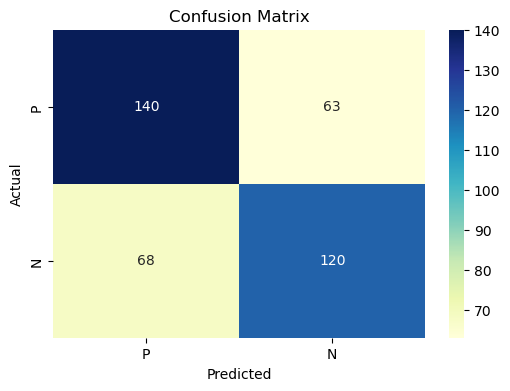


MLP Classifier Performance:
Test Size = 0.3 and Layers = 30
Accuracy: 66.5 %
              precision    recall  f1-score   support

           N       0.67      0.69      0.68       203
           P       0.66      0.64      0.65       188

    accuracy                           0.66       391
   macro avg       0.66      0.66      0.66       391
weighted avg       0.66      0.66      0.66       391



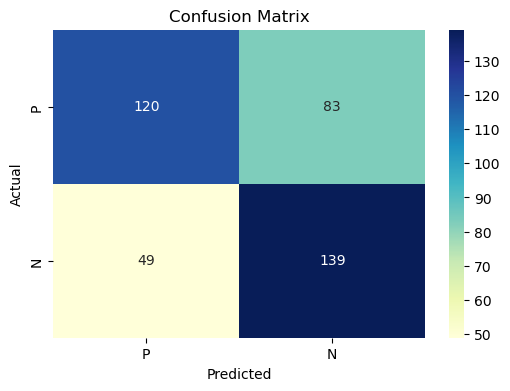


MLP Classifier Performance:
Test Size = 0.3 and Layers = 50
Accuracy: 66.24 %
              precision    recall  f1-score   support

           N       0.71      0.59      0.65       203
           P       0.63      0.74      0.68       188

    accuracy                           0.66       391
   macro avg       0.67      0.67      0.66       391
weighted avg       0.67      0.66      0.66       391



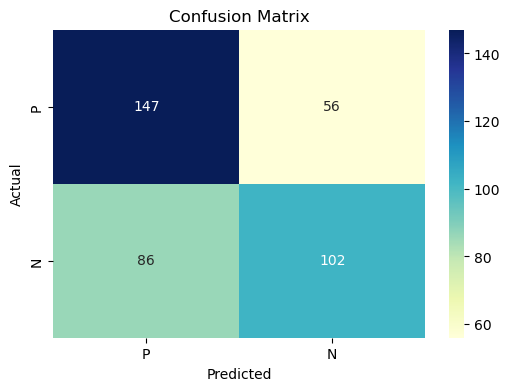


MLP Classifier Performance:
Test Size = 0.3 and Layers = 100
Accuracy: 63.68 %
              precision    recall  f1-score   support

           N       0.63      0.72      0.67       203
           P       0.65      0.54      0.59       188

    accuracy                           0.64       391
   macro avg       0.64      0.63      0.63       391
weighted avg       0.64      0.64      0.63       391



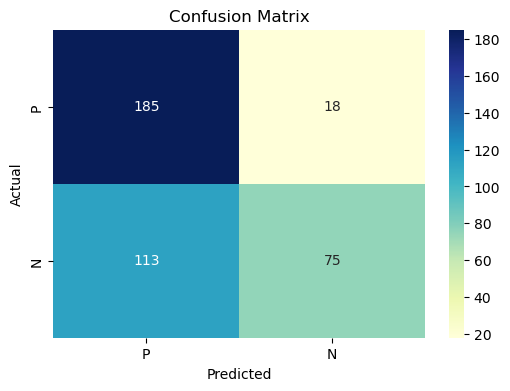


MLP Classifier Performance:
Test Size = 0.3 and Layers = 200
Accuracy: 66.5 %
              precision    recall  f1-score   support

           N       0.62      0.91      0.74       203
           P       0.81      0.40      0.53       188

    accuracy                           0.66       391
   macro avg       0.71      0.66      0.64       391
weighted avg       0.71      0.66      0.64       391



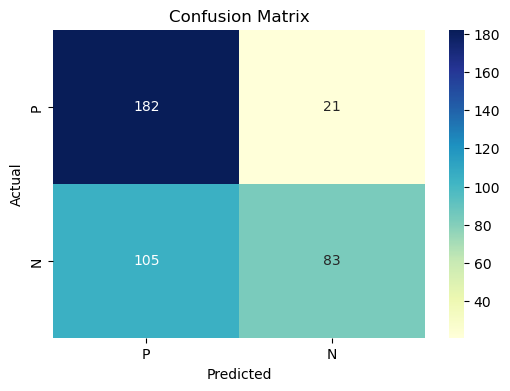


MLP Classifier Performance:
Test Size = 0.3 and Layers = 500
Accuracy: 67.77 %
              precision    recall  f1-score   support

           N       0.63      0.90      0.74       203
           P       0.80      0.44      0.57       188

    accuracy                           0.68       391
   macro avg       0.72      0.67      0.66       391
weighted avg       0.71      0.68      0.66       391


Best Results:
{'test_size': 0.2, 'layers': 500, 'accuracy': 0.7318007662835249, 'precision': 0.763747745729139, 'recall': 0.7318007662835249, 'f1_score': 0.722602332430863}


In [79]:
## age = value to be predicted = y
## the rest of the dataset = X

# df_copy = numeric_df.copy()

X = new_df.drop(['binaryClass'], axis = 1)
y = new_df['binaryClass']

test_size = [0.1, 0.15, 0.2, 0.25, 0.3]
layers = [10, 20, 30, 50, 100, 200, 500]

best_results = {
                'test_size': None,
                'layers': None,
                'accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1_score': 0
                }


for s in test_size:
    for l in layers:

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, random_state = 17)
        
        scaler = StandardScaler()
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize the MLP classifier
        mlp_classifier = MLPClassifier(hidden_layer_sizes = (l, ), max_iter = 1000, random_state = 17)

        # Fit the classifier on the training data
        mlp_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = mlp_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict = True)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = s
            best_results['layers'] = n
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']


        # Print Confusion Matrix
        plt.figure(figsize = (6, 4))
        sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels = y.unique(), yticklabels = y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nMLP Classifier Performance:")
        print(f"Test Size = {s} and Layers = {l}")
        print(f"Accuracy: {round(100 *(accuracy), 2)} %")
        print(classification_report(y_test, y_pred))
        
# Print the best results
print("\nBest Results:")
print(best_results)

### MinMaxScaler

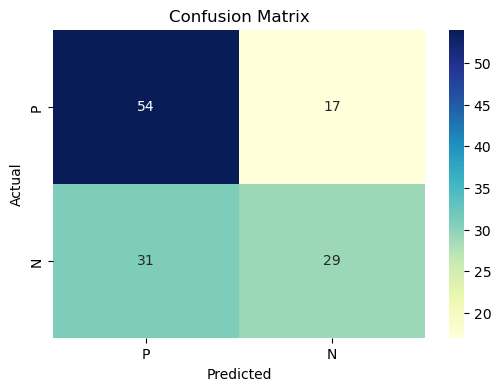


MLP Classifier Performance:
Test Size = 0.1 and Layers = 10
Accuracy: 63.36 %
              precision    recall  f1-score   support

           N       0.64      0.76      0.69        71
           P       0.63      0.48      0.55        60

    accuracy                           0.63       131
   macro avg       0.63      0.62      0.62       131
weighted avg       0.63      0.63      0.63       131



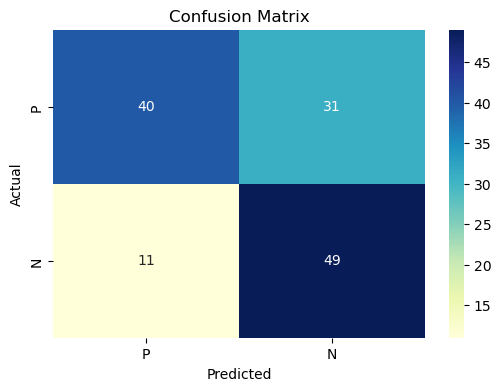


MLP Classifier Performance:
Test Size = 0.1 and Layers = 20
Accuracy: 67.94 %
              precision    recall  f1-score   support

           N       0.78      0.56      0.66        71
           P       0.61      0.82      0.70        60

    accuracy                           0.68       131
   macro avg       0.70      0.69      0.68       131
weighted avg       0.71      0.68      0.68       131



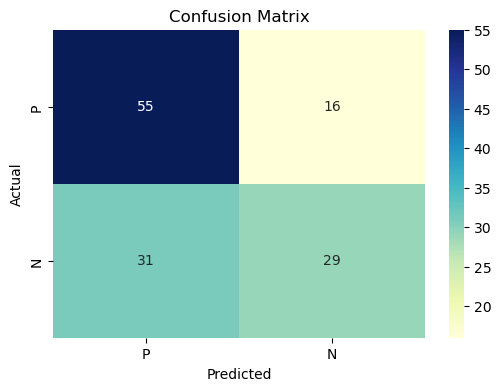


MLP Classifier Performance:
Test Size = 0.1 and Layers = 30
Accuracy: 64.12 %
              precision    recall  f1-score   support

           N       0.64      0.77      0.70        71
           P       0.64      0.48      0.55        60

    accuracy                           0.64       131
   macro avg       0.64      0.63      0.63       131
weighted avg       0.64      0.64      0.63       131



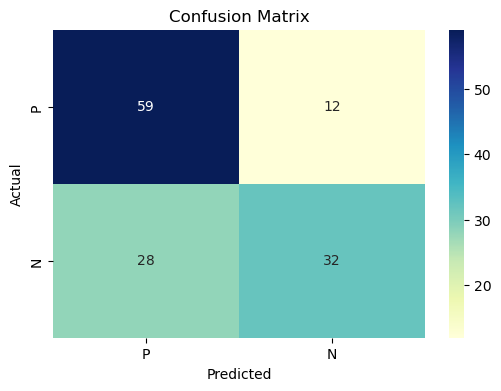


MLP Classifier Performance:
Test Size = 0.1 and Layers = 50
Accuracy: 69.47 %
              precision    recall  f1-score   support

           N       0.68      0.83      0.75        71
           P       0.73      0.53      0.62        60

    accuracy                           0.69       131
   macro avg       0.70      0.68      0.68       131
weighted avg       0.70      0.69      0.69       131



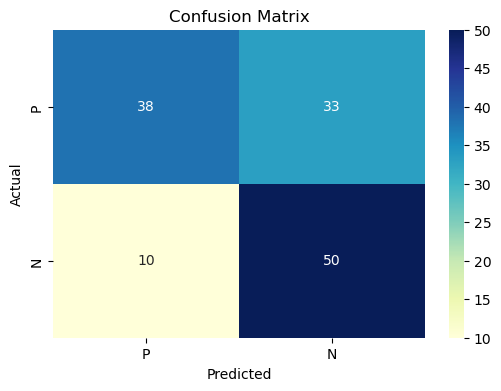


MLP Classifier Performance:
Test Size = 0.1 and Layers = 100
Accuracy: 67.18 %
              precision    recall  f1-score   support

           N       0.79      0.54      0.64        71
           P       0.60      0.83      0.70        60

    accuracy                           0.67       131
   macro avg       0.70      0.68      0.67       131
weighted avg       0.70      0.67      0.67       131



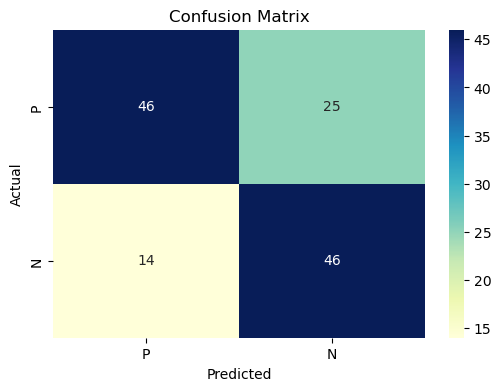


MLP Classifier Performance:
Test Size = 0.1 and Layers = 200
Accuracy: 70.23 %
              precision    recall  f1-score   support

           N       0.77      0.65      0.70        71
           P       0.65      0.77      0.70        60

    accuracy                           0.70       131
   macro avg       0.71      0.71      0.70       131
weighted avg       0.71      0.70      0.70       131



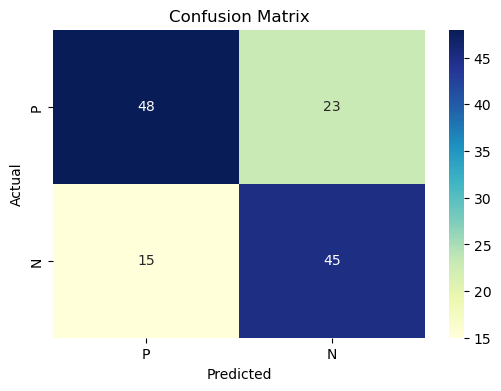


MLP Classifier Performance:
Test Size = 0.1 and Layers = 500
Accuracy: 70.99 %
              precision    recall  f1-score   support

           N       0.76      0.68      0.72        71
           P       0.66      0.75      0.70        60

    accuracy                           0.71       131
   macro avg       0.71      0.71      0.71       131
weighted avg       0.72      0.71      0.71       131



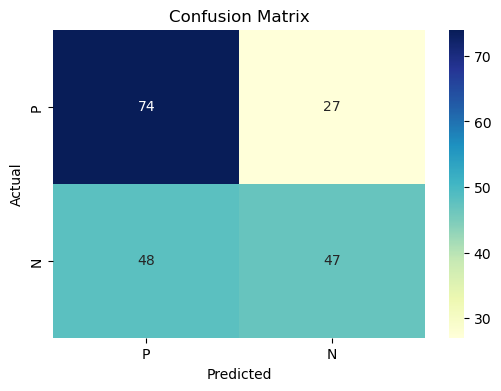


MLP Classifier Performance:
Test Size = 0.15 and Layers = 10
Accuracy: 61.73 %
              precision    recall  f1-score   support

           N       0.61      0.73      0.66       101
           P       0.64      0.49      0.56        95

    accuracy                           0.62       196
   macro avg       0.62      0.61      0.61       196
weighted avg       0.62      0.62      0.61       196



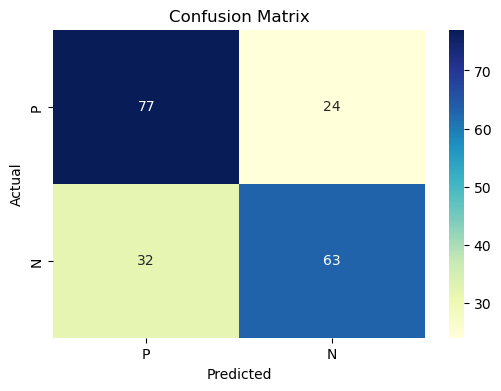


MLP Classifier Performance:
Test Size = 0.15 and Layers = 20
Accuracy: 71.43 %
              precision    recall  f1-score   support

           N       0.71      0.76      0.73       101
           P       0.72      0.66      0.69        95

    accuracy                           0.71       196
   macro avg       0.72      0.71      0.71       196
weighted avg       0.72      0.71      0.71       196



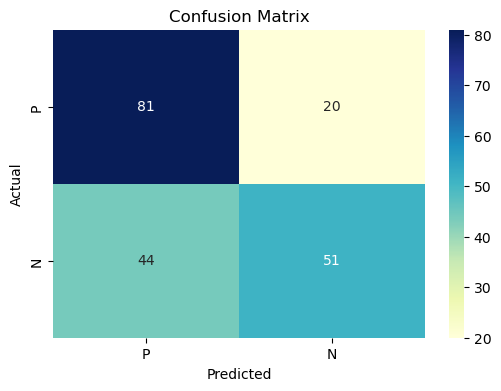


MLP Classifier Performance:
Test Size = 0.15 and Layers = 30
Accuracy: 67.35 %
              precision    recall  f1-score   support

           N       0.65      0.80      0.72       101
           P       0.72      0.54      0.61        95

    accuracy                           0.67       196
   macro avg       0.68      0.67      0.67       196
weighted avg       0.68      0.67      0.67       196



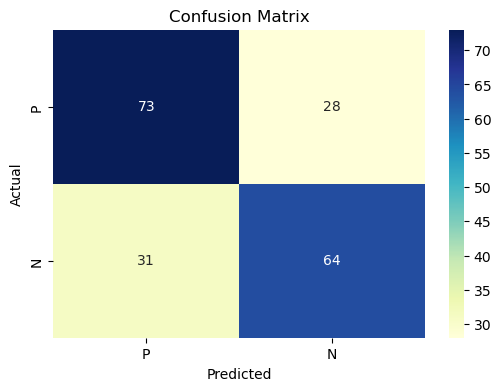


MLP Classifier Performance:
Test Size = 0.15 and Layers = 50
Accuracy: 69.9 %
              precision    recall  f1-score   support

           N       0.70      0.72      0.71       101
           P       0.70      0.67      0.68        95

    accuracy                           0.70       196
   macro avg       0.70      0.70      0.70       196
weighted avg       0.70      0.70      0.70       196



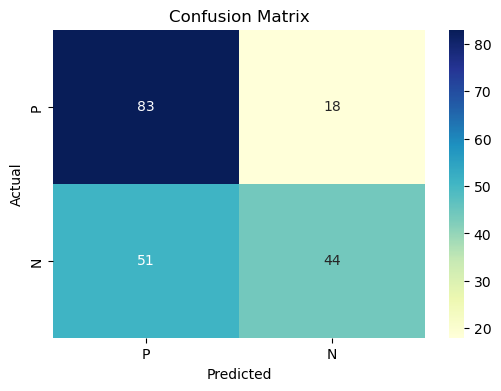


MLP Classifier Performance:
Test Size = 0.15 and Layers = 100
Accuracy: 64.8 %
              precision    recall  f1-score   support

           N       0.62      0.82      0.71       101
           P       0.71      0.46      0.56        95

    accuracy                           0.65       196
   macro avg       0.66      0.64      0.63       196
weighted avg       0.66      0.65      0.64       196



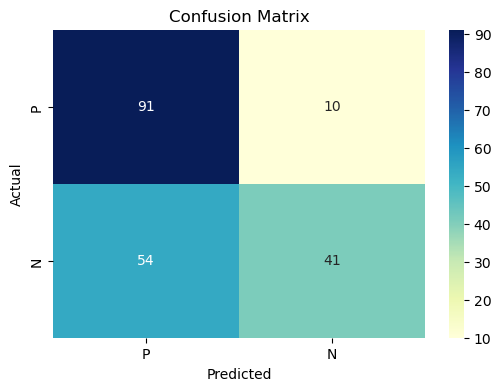


MLP Classifier Performance:
Test Size = 0.15 and Layers = 200
Accuracy: 67.35 %
              precision    recall  f1-score   support

           N       0.63      0.90      0.74       101
           P       0.80      0.43      0.56        95

    accuracy                           0.67       196
   macro avg       0.72      0.67      0.65       196
weighted avg       0.71      0.67      0.65       196



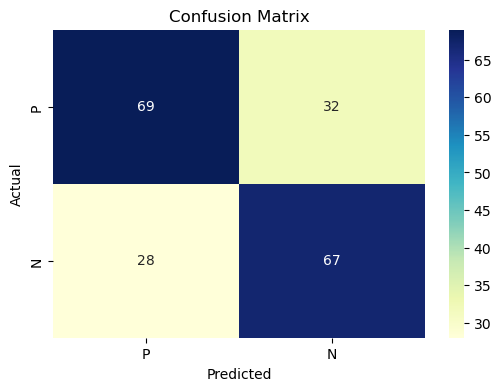


MLP Classifier Performance:
Test Size = 0.15 and Layers = 500
Accuracy: 69.39 %
              precision    recall  f1-score   support

           N       0.71      0.68      0.70       101
           P       0.68      0.71      0.69        95

    accuracy                           0.69       196
   macro avg       0.69      0.69      0.69       196
weighted avg       0.69      0.69      0.69       196



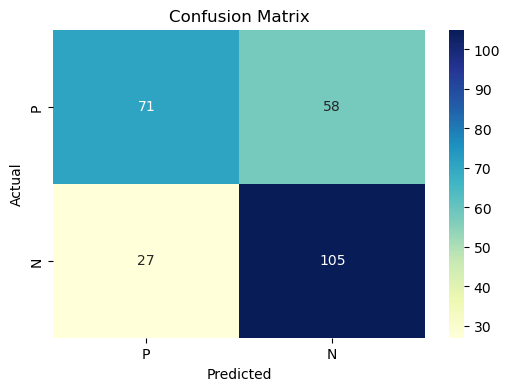


MLP Classifier Performance:
Test Size = 0.2 and Layers = 10
Accuracy: 67.43 %
              precision    recall  f1-score   support

           N       0.72      0.55      0.63       129
           P       0.64      0.80      0.71       132

    accuracy                           0.67       261
   macro avg       0.68      0.67      0.67       261
weighted avg       0.68      0.67      0.67       261



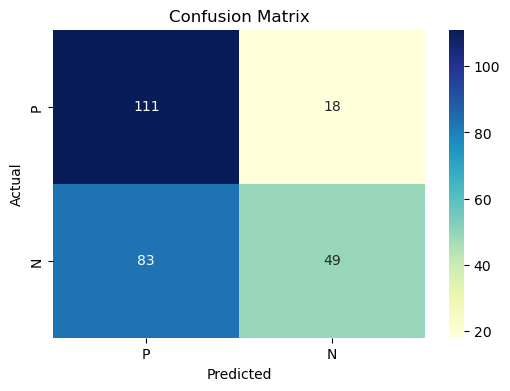


MLP Classifier Performance:
Test Size = 0.2 and Layers = 20
Accuracy: 61.3 %
              precision    recall  f1-score   support

           N       0.57      0.86      0.69       129
           P       0.73      0.37      0.49       132

    accuracy                           0.61       261
   macro avg       0.65      0.62      0.59       261
weighted avg       0.65      0.61      0.59       261



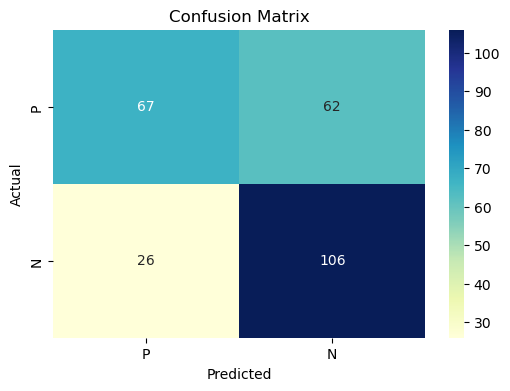


MLP Classifier Performance:
Test Size = 0.2 and Layers = 30
Accuracy: 66.28 %
              precision    recall  f1-score   support

           N       0.72      0.52      0.60       129
           P       0.63      0.80      0.71       132

    accuracy                           0.66       261
   macro avg       0.68      0.66      0.66       261
weighted avg       0.68      0.66      0.66       261



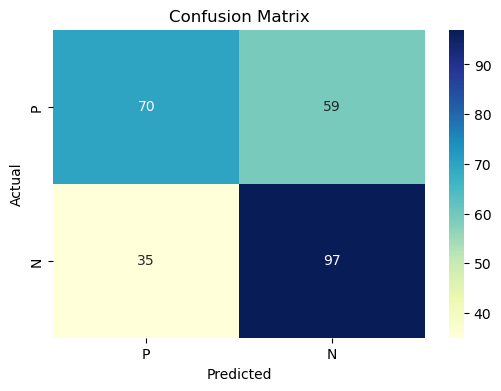


MLP Classifier Performance:
Test Size = 0.2 and Layers = 50
Accuracy: 63.98 %
              precision    recall  f1-score   support

           N       0.67      0.54      0.60       129
           P       0.62      0.73      0.67       132

    accuracy                           0.64       261
   macro avg       0.64      0.64      0.64       261
weighted avg       0.64      0.64      0.64       261



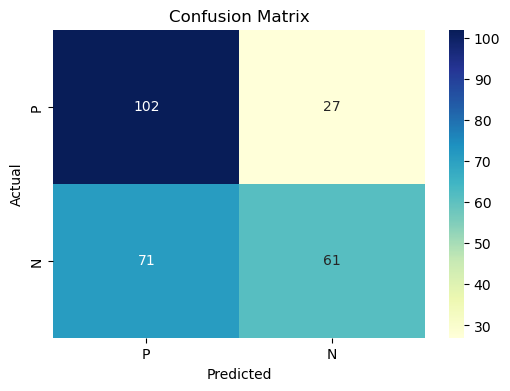


MLP Classifier Performance:
Test Size = 0.2 and Layers = 100
Accuracy: 62.45 %
              precision    recall  f1-score   support

           N       0.59      0.79      0.68       129
           P       0.69      0.46      0.55       132

    accuracy                           0.62       261
   macro avg       0.64      0.63      0.62       261
weighted avg       0.64      0.62      0.61       261



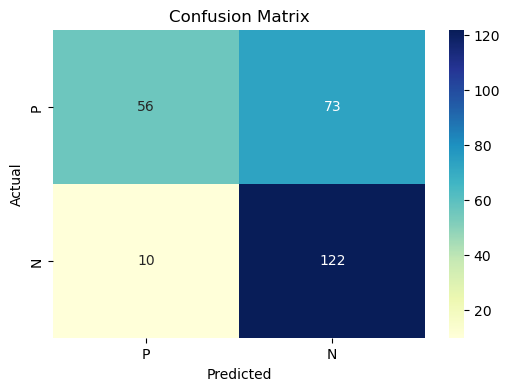


MLP Classifier Performance:
Test Size = 0.2 and Layers = 200
Accuracy: 68.2 %
              precision    recall  f1-score   support

           N       0.85      0.43      0.57       129
           P       0.63      0.92      0.75       132

    accuracy                           0.68       261
   macro avg       0.74      0.68      0.66       261
weighted avg       0.74      0.68      0.66       261



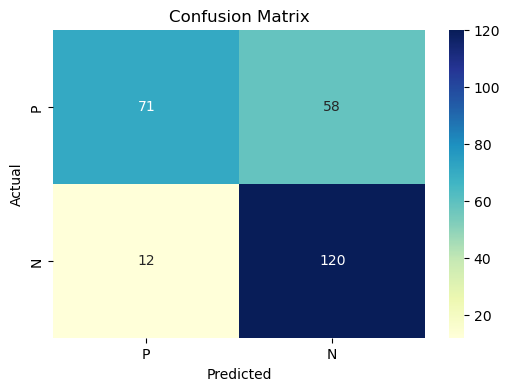


MLP Classifier Performance:
Test Size = 0.2 and Layers = 500
Accuracy: 73.18 %
              precision    recall  f1-score   support

           N       0.86      0.55      0.67       129
           P       0.67      0.91      0.77       132

    accuracy                           0.73       261
   macro avg       0.76      0.73      0.72       261
weighted avg       0.76      0.73      0.72       261



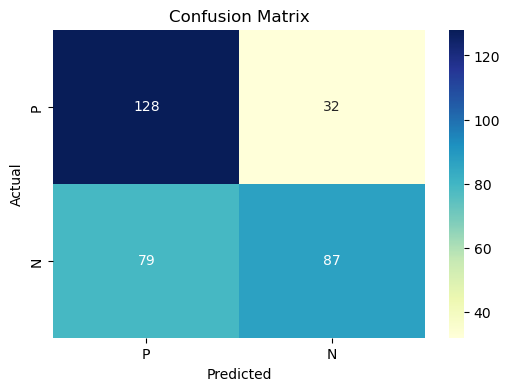


MLP Classifier Performance:
Test Size = 0.25 and Layers = 10
Accuracy: 65.95 %
              precision    recall  f1-score   support

           N       0.62      0.80      0.70       160
           P       0.73      0.52      0.61       166

    accuracy                           0.66       326
   macro avg       0.67      0.66      0.65       326
weighted avg       0.68      0.66      0.65       326



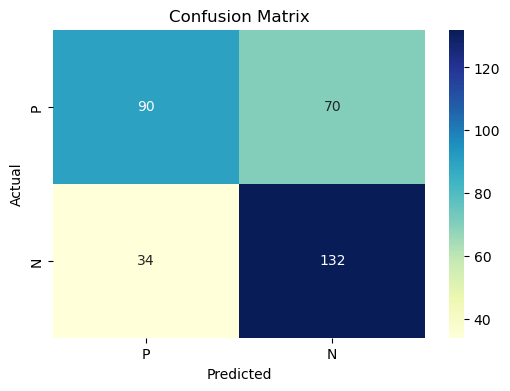


MLP Classifier Performance:
Test Size = 0.25 and Layers = 20
Accuracy: 68.1 %
              precision    recall  f1-score   support

           N       0.73      0.56      0.63       160
           P       0.65      0.80      0.72       166

    accuracy                           0.68       326
   macro avg       0.69      0.68      0.68       326
weighted avg       0.69      0.68      0.68       326



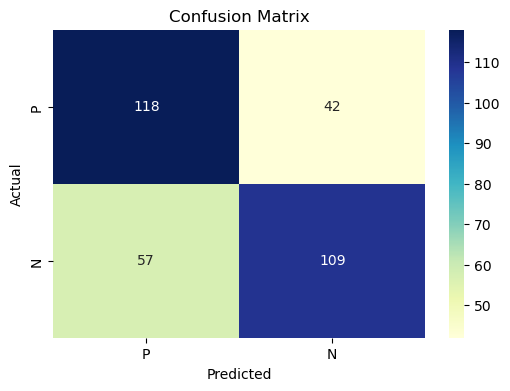


MLP Classifier Performance:
Test Size = 0.25 and Layers = 30
Accuracy: 69.63 %
              precision    recall  f1-score   support

           N       0.67      0.74      0.70       160
           P       0.72      0.66      0.69       166

    accuracy                           0.70       326
   macro avg       0.70      0.70      0.70       326
weighted avg       0.70      0.70      0.70       326



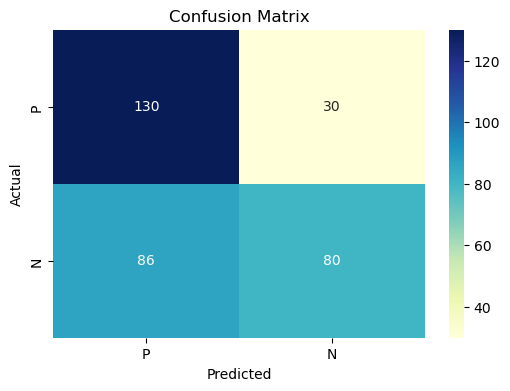


MLP Classifier Performance:
Test Size = 0.25 and Layers = 50
Accuracy: 64.42 %
              precision    recall  f1-score   support

           N       0.60      0.81      0.69       160
           P       0.73      0.48      0.58       166

    accuracy                           0.64       326
   macro avg       0.66      0.65      0.64       326
weighted avg       0.67      0.64      0.63       326



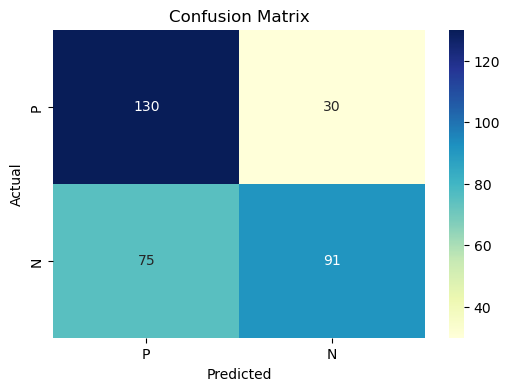


MLP Classifier Performance:
Test Size = 0.25 and Layers = 100
Accuracy: 67.79 %
              precision    recall  f1-score   support

           N       0.63      0.81      0.71       160
           P       0.75      0.55      0.63       166

    accuracy                           0.68       326
   macro avg       0.69      0.68      0.67       326
weighted avg       0.69      0.68      0.67       326



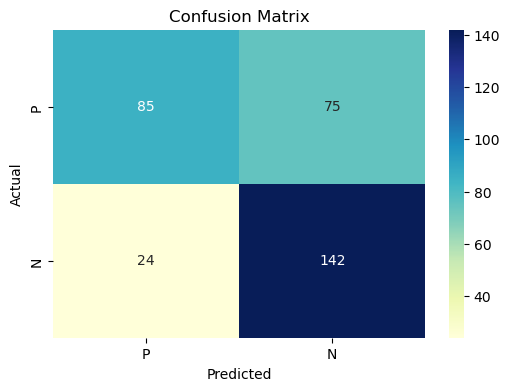


MLP Classifier Performance:
Test Size = 0.25 and Layers = 200
Accuracy: 69.63 %
              precision    recall  f1-score   support

           N       0.78      0.53      0.63       160
           P       0.65      0.86      0.74       166

    accuracy                           0.70       326
   macro avg       0.72      0.69      0.69       326
weighted avg       0.72      0.70      0.69       326



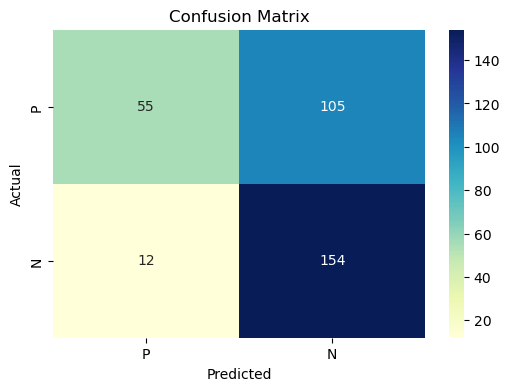


MLP Classifier Performance:
Test Size = 0.25 and Layers = 500
Accuracy: 64.11 %
              precision    recall  f1-score   support

           N       0.82      0.34      0.48       160
           P       0.59      0.93      0.72       166

    accuracy                           0.64       326
   macro avg       0.71      0.64      0.60       326
weighted avg       0.71      0.64      0.61       326



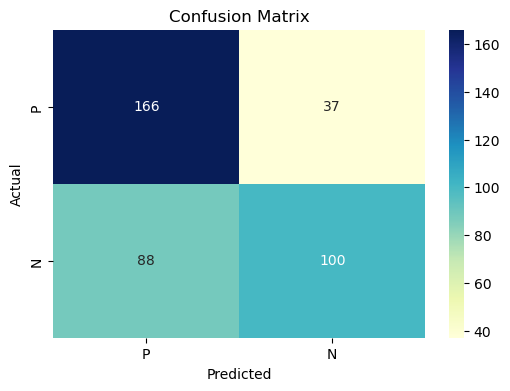


MLP Classifier Performance:
Test Size = 0.3 and Layers = 10
Accuracy: 68.03 %
              precision    recall  f1-score   support

           N       0.65      0.82      0.73       203
           P       0.73      0.53      0.62       188

    accuracy                           0.68       391
   macro avg       0.69      0.67      0.67       391
weighted avg       0.69      0.68      0.67       391



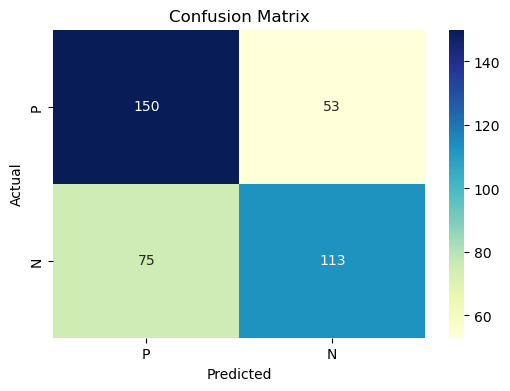


MLP Classifier Performance:
Test Size = 0.3 and Layers = 20
Accuracy: 67.26 %
              precision    recall  f1-score   support

           N       0.67      0.74      0.70       203
           P       0.68      0.60      0.64       188

    accuracy                           0.67       391
   macro avg       0.67      0.67      0.67       391
weighted avg       0.67      0.67      0.67       391



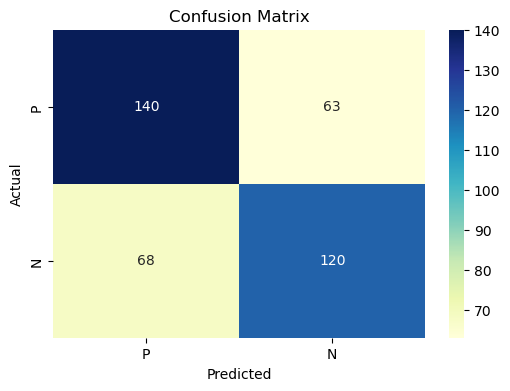


MLP Classifier Performance:
Test Size = 0.3 and Layers = 30
Accuracy: 66.5 %
              precision    recall  f1-score   support

           N       0.67      0.69      0.68       203
           P       0.66      0.64      0.65       188

    accuracy                           0.66       391
   macro avg       0.66      0.66      0.66       391
weighted avg       0.66      0.66      0.66       391



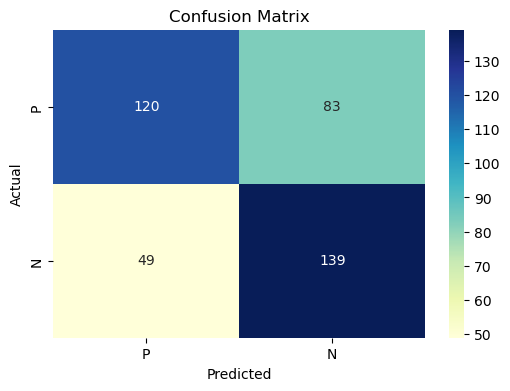


MLP Classifier Performance:
Test Size = 0.3 and Layers = 50
Accuracy: 66.24 %
              precision    recall  f1-score   support

           N       0.71      0.59      0.65       203
           P       0.63      0.74      0.68       188

    accuracy                           0.66       391
   macro avg       0.67      0.67      0.66       391
weighted avg       0.67      0.66      0.66       391



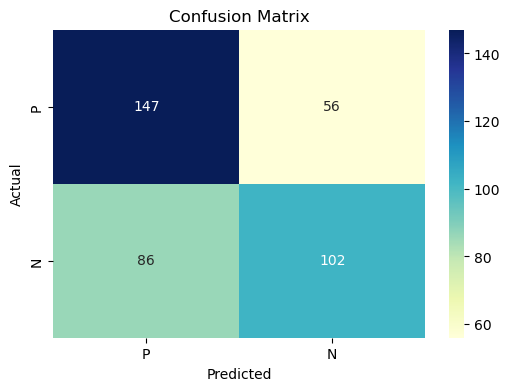


MLP Classifier Performance:
Test Size = 0.3 and Layers = 100
Accuracy: 63.68 %
              precision    recall  f1-score   support

           N       0.63      0.72      0.67       203
           P       0.65      0.54      0.59       188

    accuracy                           0.64       391
   macro avg       0.64      0.63      0.63       391
weighted avg       0.64      0.64      0.63       391



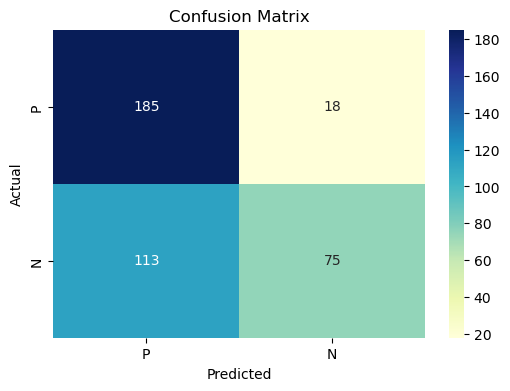


MLP Classifier Performance:
Test Size = 0.3 and Layers = 200
Accuracy: 66.5 %
              precision    recall  f1-score   support

           N       0.62      0.91      0.74       203
           P       0.81      0.40      0.53       188

    accuracy                           0.66       391
   macro avg       0.71      0.66      0.64       391
weighted avg       0.71      0.66      0.64       391



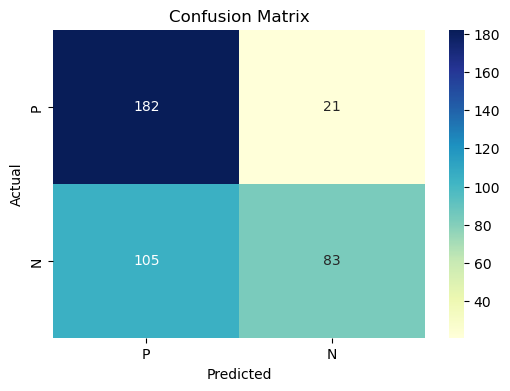


MLP Classifier Performance:
Test Size = 0.3 and Layers = 500
Accuracy: 67.77 %
              precision    recall  f1-score   support

           N       0.63      0.90      0.74       203
           P       0.80      0.44      0.57       188

    accuracy                           0.68       391
   macro avg       0.72      0.67      0.66       391
weighted avg       0.71      0.68      0.66       391


Best Results:
{'test_size': 0.2, 'layers': 500, 'accuracy': 0.7318007662835249, 'precision': 0.763747745729139, 'recall': 0.7318007662835249, 'f1_score': 0.722602332430863}


In [82]:
## age = value to be predicted = y
## the rest of the dataset = X

# df_copy = numeric_df.copy()

X = new_df.drop(['binaryClass'], axis = 1)
y = new_df['binaryClass']

test_size = [0.1, 0.15, 0.2, 0.25, 0.3]
layers = [10, 20, 30, 50, 100, 200, 500]

best_results = {
                'test_size': None,
                'layers': None,
                'accuracy': 0,
                'precision': 0,
                'recall': 0,
                'f1_score': 0
                }


for s in test_size:
    for l in layers:

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = s, random_state = 17)
        
        scaler = MinMaxScaler()
        scaler.fit(X_train)

        X_train_scaled = scaler.transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialize the MLP classifier
        mlp_classifier = MLPClassifier(hidden_layer_sizes = (l, ), max_iter = 1000, random_state = 17)

        # Fit the classifier on the training data
        mlp_classifier.fit(X_train, y_train)

        # Make predictions on the test data
        y_pred = mlp_classifier.predict(X_test)

        # Evaluate the performance
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred, output_dict = True)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Save results if it's the best so far
        if classification_rep['weighted avg']['f1-score'] > best_results['f1_score']:
            best_results['test_size'] = s
            best_results['layers'] = n
            best_results['accuracy'] = accuracy
            best_results['precision'] = classification_rep['weighted avg']['precision']
            best_results['recall'] = classification_rep['weighted avg']['recall']
            best_results['f1_score'] = classification_rep['weighted avg']['f1-score']


        # Print Confusion Matrix
        plt.figure(figsize = (6, 4))
        sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'YlGnBu', xticklabels = y.unique(), yticklabels = y.unique())
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        print("\nMLP Classifier Performance:")
        print(f"Test Size = {s} and Layers = {l}")
        print(f"Accuracy: {round(100 *(accuracy), 2)} %")
        print(classification_report(y_test, y_pred))
        
# Print the best results
print("\nBest Results:")
print(best_results)